## Final Project (Midterm)

## Name: Kathryn Lee

## Link to your github repo: https://github.com/nowyouleeme/data1030-final-project

Make sure you are in the DATA1030 environment:

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Intro slide
The intro slide should explain:

**Q1** What is the problem you want to solve? Based on this problem, are you dealing with iid or non-iid data? 

The primary problem I aim to solve is predicting complications following a myocardial infarction (MI), or heart attack, using patient data 24 hours after admission to the hospital. Based on this problem, I am dealing with iid data. Thus, there is no group or time-series aspect to the data by nature of focusing on one specific time point that the data was taken at and because patients do not appear more than once in the dataset. 

**Q2** Why is this important?

Myocardial infarction (MI) presents one of the most complex challenges in modern medicine due to the significant variability in its manifestations among patients. Each year, over a million people in the United States are affected by MI, with 200,000 to 300,000 dying before even reaching the hospital. Alarmingly, someone experiences an MI every 29 seconds, and one patient dies every minute [1].\
MI can occur with or without complications, and these complications can significantly impact long-term prognosis. While some have minimal effects, others can exacerbate the condition and even lead to death. This variability complicates the ability of experienced specialists to predict complications reliably and promptly.\
Therefore, accurately predicting MI complications is essential for enabling early intervention and implementing effective preventive measures.

**Q3** Is this a regression or classification problem?

This is a classification problem, as we are predicting categorical outcomes (complications). The complications, listed in columns 113-124, represent specific, discrete outcomes—whether or not a particular complication is present. This aligns with the nature of classification problems, where the objective is to assign categories or labels to the input data.  
There are multiple target variables that can be considered, but my project will only focus on the lethal outcomes (`LET_IS`).

**Q4** Where did you get the data from?

I obtained this dataset from the UC Irvine Machine Learning Respository in the "Health and Medicine" subject area.

**Q5** How was data the collected?

The dataset was collected at the Krasnoyarsk Interdistrict Clinical Hospital in Russia between 1992 and 1995. It includes data from 1700 separate patients who were admitted for MI, with detailed medical records and information about complications following the event.

**Q6** How does this dataset qualify for the final project?

It contains a lot of missing data, fulfilling the "at least one difficulty" requirement.

### Read in the data

The dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Myocardial infarction complications Database.csv')
display(df)

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1  77.0    1       2.0        1.0        1.0       2.0       NaN   
1        2  55.0    1       1.0        0.0        0.0       0.0       0.0   
2        3  52.0    1       0.0        0.0        0.0       2.0       NaN   
3        4  68.0    0       0.0        0.0        0.0       2.0       NaN   
4        5  60.0    1       0.0        0.0        0.0       2.0       NaN   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0     3.0         0.0  ...          0           0         0          0   
1     0.0         0.0  ...          0           0         0          0   
2     2.0         0.0  ...          0           0         0          0   
3     2.0         0.0  ...          0           0         0          0   
4     3.0         0.0  ...          0           0         0          0   
...   ...         ...  ...        ...         ...       ...        ...   
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 124 columns]

**Input Data:** Columns 2-112 represent patient information (medical history, test results, etc.) used for prediction. Different columns may be excluded at different time stages. \
**Output Data:** Columns 113-124 represent possible complications, which serve as the target variables for prediction.

# EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First, you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe (how many datapoints and features are there)?

In [3]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1700
Number of columns:  124


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [4]:
pd.set_option('display.max_rows', 124) # prevent truncation
print('Data types of features:')
print(df.dtypes)

Data types of features:
ID                 int64
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K

**Q3** What is the breakdown of the different features?

According to the supplementary `Myocardial infarction complications Database description` file, I can use all input columns (2-112) except 94, 95, 101, 102, 104, and 105 for prediction since I am focusing on patient data collected at the end of the first day (24 hours after admission to the hospital). Thus, I have omitted R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n from below.

**Continuous variables:**
AGE (years), S_AD_KBRIG (mmHg), D_AD_KBRIG (mmHg), S_AD_ORIT (mmHg), D_AD_ORIT (mmHg), K_BLOOD (mmol/L), NA_BLOOD (mmol/L), ALT_BLOOD (IU/L), AST_BLOOD (IU/L), KFK_BLOOD (IU/L), L_BLOOD (billions per liter), ROE (mm)

**Categorical (binary):**
SEX, IBS_NASL, SIM_GIPERT, nr11, nr01, nr02, nr03, nr04, nr07, nr08, np01, np04, np05, np07, np08, np09, np10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, GIPER_NA, NA_KB, NOT_NA_KB, LID_KB, NITR_S, LID_S_n, B_BLOK_S_n, ANT_CA_S_n, GEPAR_S_n, ASP_S_n, TIKL_S_n, TRENT_S_n 

**Categorical (multi-class):**
IBS_POST, ant_im, lat_im, inf_im, post_im 

**Ordinal:**
INF_ANAM, STENOK_AN, FK_STENOK, GB, DLIT_AG, ZSN_A, TIME_B_S, R_AB_1_n, NA_R_1_n, NOT_NA_1_n  

Many of the categorical and ordinal features are represented as floats, which is a bit hard to catch unless you go through the dataset yourself/read the supplementary document. 

**Q4** Are there any imbalanced classes or missing values? Describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).

See Q5 and Q6 about the imbalanced classes. 

In [5]:
df.drop(df.columns[112:123], axis=1, inplace=True) # drop unused target variables, 11 removed
df.drop(columns=['ID', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], inplace=True) # drop unused features, 7 removed
display(df)

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1     55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2     52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3     68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4     60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0        4.0        2.0       1.0       NaN  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       NaN  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       NaN  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       NaN  2.0   
1699  63.0    1       2.0        NaN        NaN       NaN       NaN  2.0   

      SIM_GIPERT  DLIT_AG  ...  NA_R_1_n  NOT_NA_1_n  LID_S_n  B_BLOK_S_n  \
0            0.0      7.0  ...       0.0         0.0      1.0         0.0   
1            0.0      0.0  ...       0.0         1.0      1.0         0.0   
2            0.0      2.0  ...       1.0         3.0      1.0         1.0   
3            0.0      3.0  ...       0.0         0.0      0.0         0.0   
4            0.0      7.0  ...       0.0         0.0      0.0         0.0   
...          ...      ...  ...       ...         ...      ...         ...   
1695         0.0      7.0  ...       0.0         0.0      0.0         0.0   
1696         0.0      7.0  ...       0.0         0.0      1.0         0.0   
1697         0.0      0.0  ...       2.0         0.0      0.0         1.0   
1698         0.0      7.0  ...       2.0         1.0      1.0         0.0   
1699         0.0      NaN  ...       0.0         0.0      0.0         0.0   

      ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  LET_IS  
0            0.0        1.0      1.0       0.0        0.0       0  
1            1.0        1.0      1.0       0.0        1.0       0  
2            0.0        1.0      1.0       0.0        0.0       0  
3            1.0        1.0      1.0       0.0        0.0       0  
4            1.0        0.0      1.0       0.0        1.0       0  
...          ...        ...      ...       ...        ...     ...  
1695         0.0        0.0      0.0       0.0        0.0       3  
1696         0.0        0.0      0.0       0.0        0.0       1  
1697         0.0        1.0      1.0       0.0        0.0       6  
1698         1.0        1.0      1.0       0.0        0.0       1  
1699         0.0        0.0      0.0       0.0        0.0       1  

[1700 rows x 106 columns]

Dropped column `ID` because it does not contribute to the prediction power of the model. I also dropped the other categories that the dataset description advised that I drop because of data leakage issues. 

In [6]:
# missing values
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("\n")
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print("Missing values percentage per column:")
print(missing_percentage_sorted)
frac_missing = (df.isna().sum(axis=1) != 0).sum() / df.shape[0]
print("Percentage of points with at least one missing value:", 100*round(frac_missing, 4), "%")

Number of rows:  1700
Number of columns:  106


Missing values percentage per column:
LET_IS            0.000000
SEX               0.000000
IM_PG_P           0.058824
INF_ANAM          0.235294
NA_R_1_n          0.294118
zab_leg_06        0.411765
zab_leg_04        0.411765
zab_leg_03        0.411765
zab_leg_02        0.411765
zab_leg_01        0.411765
AGE               0.470588
SIM_GIPERT        0.470588
GB                0.529412
NITR_S            0.529412
NOT_NA_1_n        0.588235
endocr_03         0.588235
endocr_02         0.588235
LID_S_n           0.588235
fibr_ter_08       0.588235
fibr_ter_07       0.588235
fibr_ter_06       0.588235
fibr_ter_05       0.588235
fibr_ter_03       0.588235
fibr_ter_02       0.588235
fibr_ter_01       0.588235
B_BLOK_S_n        0.647059
endocr_01         0.647059
GT_POST           0.705882
SVT_POST          0.705882
O_L_POST          0.705882
FIB_G_POST        0.705882
ANT_CA_S_n        0.764706
MP_TP_POST        0.823529
K_SH_POST         0.882

All columns except for `SEX` and the target variable `LET_IS` contain missing values.  
Based on this information at first glance, I will drop features `IBS_NASL` (binary categorical) and `KFK_BLOOD` (continuous feature) since these columns have over 80% missing values. This threshold is set since, beyond this point, these columns lack enough information to be helpful in solving the problem.  
Features `NA_KB`, `LID_KB`, `NOT_NA_KB`, `D_AD_KBRIG`, and `S_AD_KBRIG` are a bit trickier since they do have a significant portion of data missing. I will have to further consider if their missingness is random or critical for analysis, so I won't drop them just yet.  
I will have to do imputation on essentially every point. 

In [7]:
df.drop(columns=['IBS_NASL', 'KFK_BLOOD'], inplace=True) # drop columns with over 80% missing values
display(df)

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
0     77.0    1       2.0        1.0        1.0       2.0  3.0         0.0   
1     55.0    1       1.0        0.0        0.0       0.0  0.0         0.0   
2     52.0    1       0.0        0.0        0.0       2.0  2.0         0.0   
3     68.0    0       0.0        0.0        0.0       2.0  2.0         0.0   
4     60.0    1       0.0        0.0        0.0       2.0  3.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
1695  77.0    0       0.0        4.0        2.0       1.0  2.0         0.0   
1696  70.0    0       0.0        6.0        2.0       1.0  2.0         0.0   
1697  55.0    1       3.0        6.0        2.0       2.0  0.0         0.0   
1698  79.0    0       2.0        2.0        2.0       1.0  2.0         0.0   
1699  63.0    1       2.0        NaN        NaN       NaN  2.0         0.0   

      DLIT_AG  ZSN_A  ...  NA_R_1_n  NOT_NA_1_n  LID_S_n  B_BLOK_S_n  \
0         7.0    0.0  ...       0.0         0.0      1.0         0.0   
1         0.0    0.0  ...       0.0         1.0      1.0         0.0   
2         2.0    0.0  ...       1.0         3.0      1.0         1.0   
3         3.0    1.0  ...       0.0         0.0      0.0         0.0   
4         7.0    0.0  ...       0.0         0.0      0.0         0.0   
...       ...    ...  ...       ...         ...      ...         ...   
1695      7.0    0.0  ...       0.0         0.0      0.0         0.0   
1696      7.0    0.0  ...       0.0         0.0      1.0         0.0   
1697      0.0    0.0  ...       2.0         0.0      0.0         1.0   
1698      7.0    NaN  ...       2.0         1.0      1.0         0.0   
1699      NaN    4.0  ...       0.0         0.0      0.0         0.0   

      ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  LET_IS  
0            0.0        1.0      1.0       0.0        0.0       0  
1            1.0        1.0      1.0       0.0        1.0       0  
2            0.0        1.0      1.0       0.0        0.0       0  
3            1.0        1.0      1.0       0.0        0.0       0  
4            1.0        0.0      1.0       0.0        1.0       0  
...          ...        ...      ...       ...        ...     ...  
1695         0.0        0.0      0.0       0.0        0.0       3  
1696         0.0        0.0      0.0       0.0        0.0       1  
1697         0.0        1.0      1.0       0.0        0.0       6  
1698         1.0        1.0      1.0       0.0        0.0       1  
1699         0.0        0.0      0.0       0.0        0.0       1  

[1700 rows x 104 columns]

**Q5** The ML target variable in this dataset is the lethal outcomes. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.
I am modifying the target variable to be a binary classification problem, as suggested by the authors: healthy (alive) or dead.

In [166]:
# Copy the original 'LET_IS' column
y_binary = df["LET_IS"].copy()

# Convert all values 1-7 into 1, leave 0 as is
y_binary = (y_binary != 0).astype(int)

print("Is the target variable continuous?")
print(y_binary .describe())
print("\n")
print("Is the target variable categorical?")
# .value_counts = insightful when data is categorical
print(y_binary.value_counts())

Is the target variable continuous?
count    1700.000000
mean        0.159412
std         0.366167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LET_IS, dtype: float64


Is the target variable categorical?
LET_IS
0    1429
1     271
Name: count, dtype: int64


This dataset includes multiple possible target variables (as stated by the authors themselves), ranging from atrial fibrillation and pulmonary edema to relapse of the myocardial infarction and the lethal outcome. While handling multiple target variables at once would be the most holistic approach, due to the limitations of supervised learning, I am going to focus on the target variable "lethal outcome (cause)," or "LET_IS" for its greater robustness relative to the other target variables. "LET_IS" is categorical, according to the dataset's description PDF provided, in which each data point is labeled with an integer ranging from 0-7 with an associated outcome: healthy/alive (0), cardiogenic shock (1), pulmonary edema (2), myocardial rupture (3), progress of congestive heart failure (4), thromboembolism (5), asystole (6), and ventricular fibrillation (7). The other target variables are also categorical but are all in the format of yes/no for a given condition, which is quite limiting. \
We can also check that this by using the .describe() and .value_counts() function, in which .value_counts() (which is best for represting categoriccal data) was the only function that gave us useful information in understanding the lethal outcome data (how many of each lethal outcome was recorded for the data points). On the other hand, the .describe() (which is best for continuous data) function did not give us any useful additional information about the data, in which the statistical calculations (mean, standard deviation, max, etc.) doesn't make it any easier to work with or represent the discrete categories of the "LET_IS" target variable. 

**Q6** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

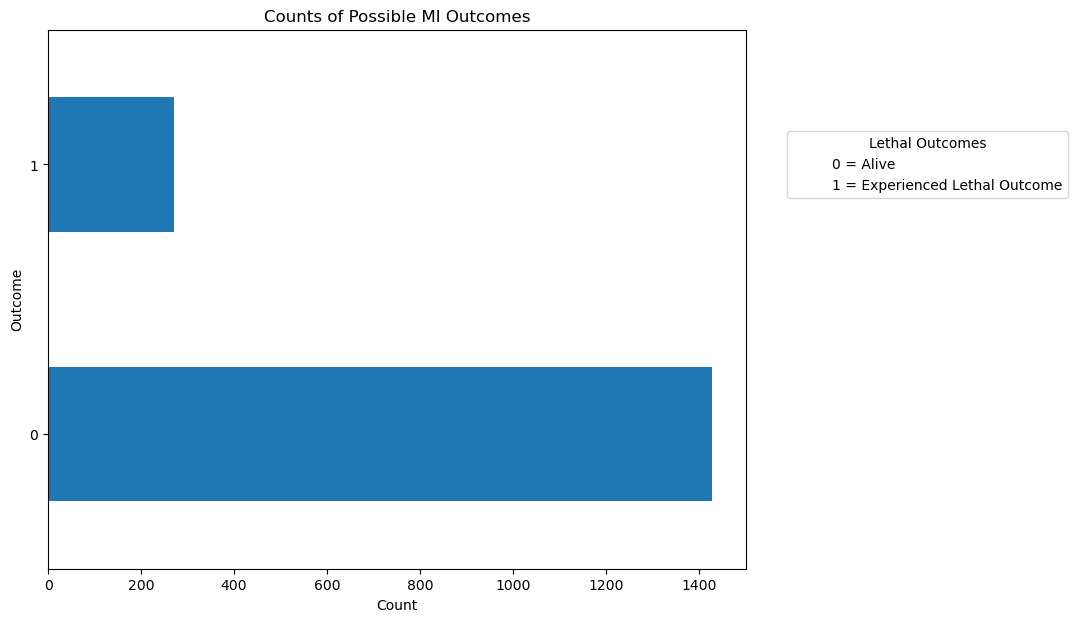

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,7))
y_binary.value_counts().plot.barh()
plt.title('Counts of Possible MI Outcomes')
plt.ylabel('Outcome')
plt.xlabel('Count')
# Manually add a legend without colors (remove color parts)
labels = ['0 = Alive', '1 = Experienced Lethal Outcome']
handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title= "Lethal Outcomes", handles=handles, labels=labels)

plt.savefig('figures/to use/count_lethal_outcome.png', dpi=300, bbox_inches='tight')

plt.show()

There is significant imbalance of classes, with 84.06% of points labeled as "alive/healthy" (0) and the remaining 15.94% falling into one of the 5 other possible categories.

**Q7** Create as many figures you can to better understand your dataset and calculate summary statistics as well. Then, select three figures that you want to show during the presentation. \
Explain why you chose the figures! Why are they interesting, unexpected, important?

First, I'd like to handle the missing values of the categorical and ordinal features. To impute these, I will just manually add another category/order that stands for missing/unknown outcomes. I will handle the continuous variables a bit later. 

(1700, 103)


CATEGORICAL FEATURES


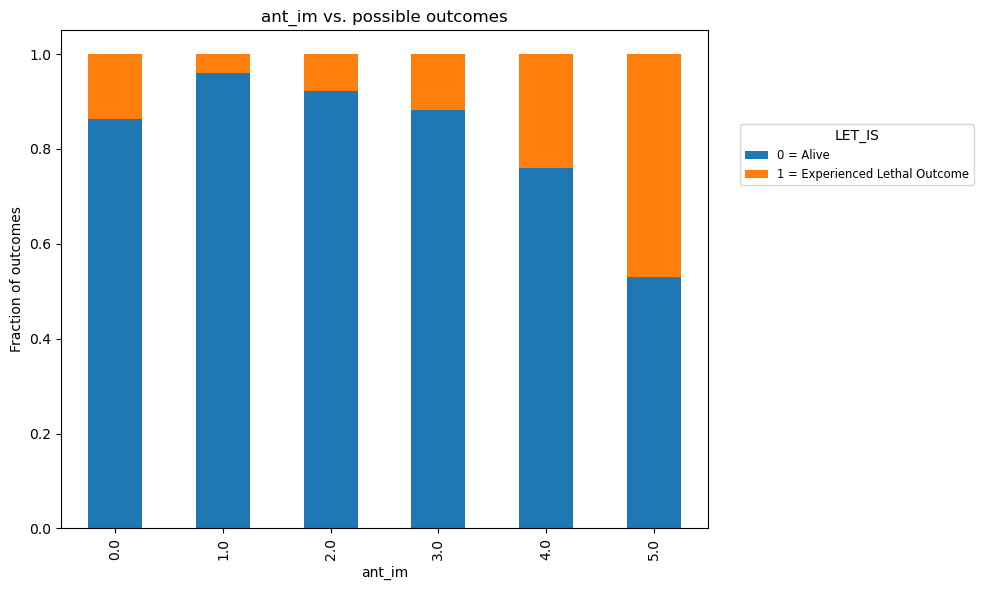

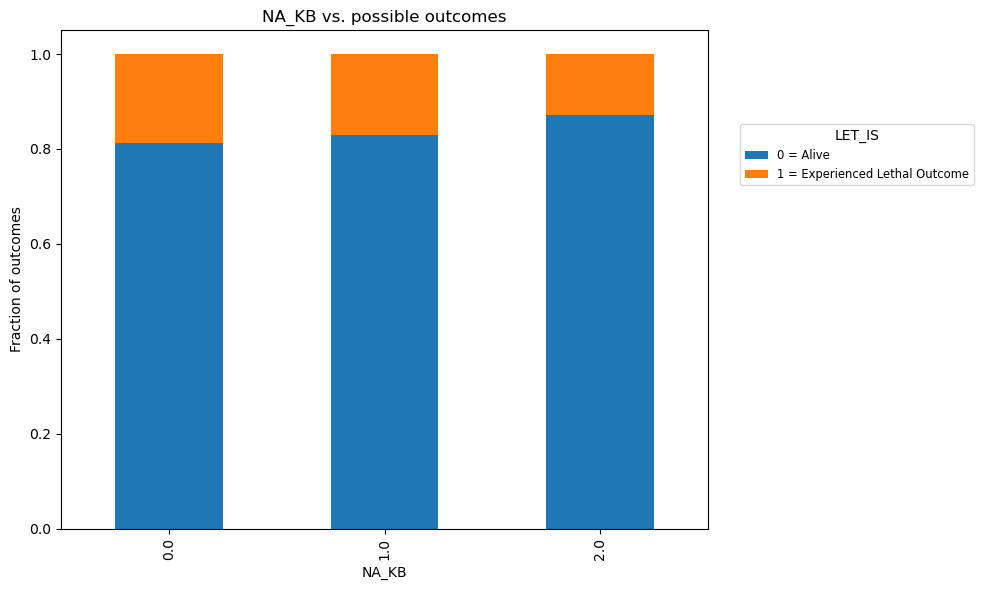

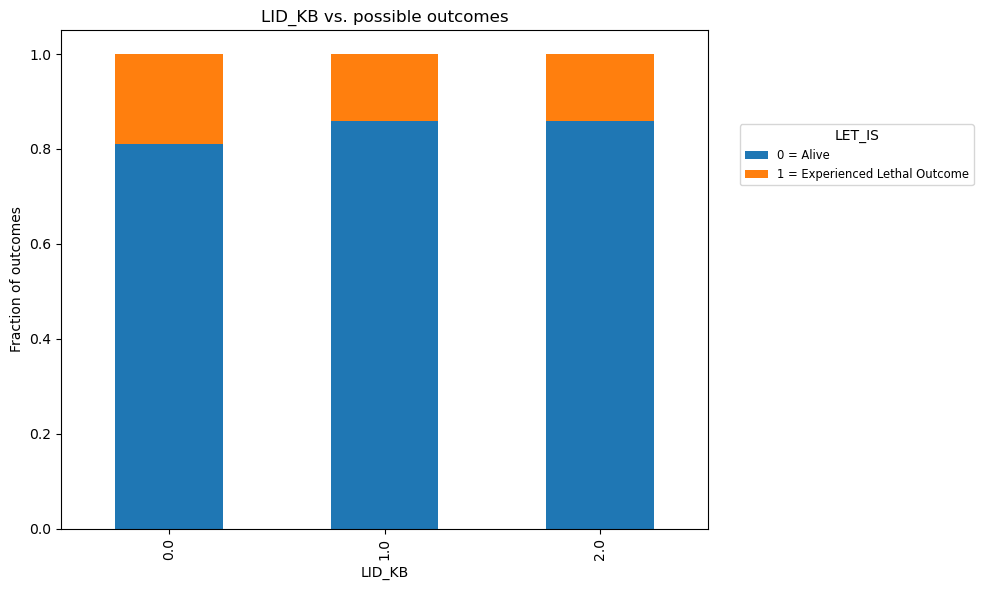

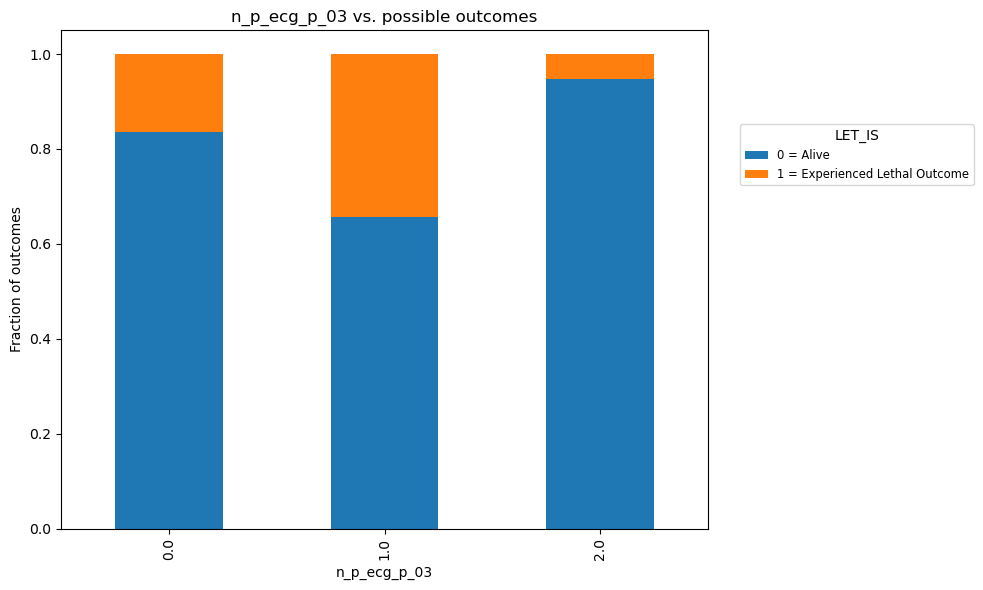

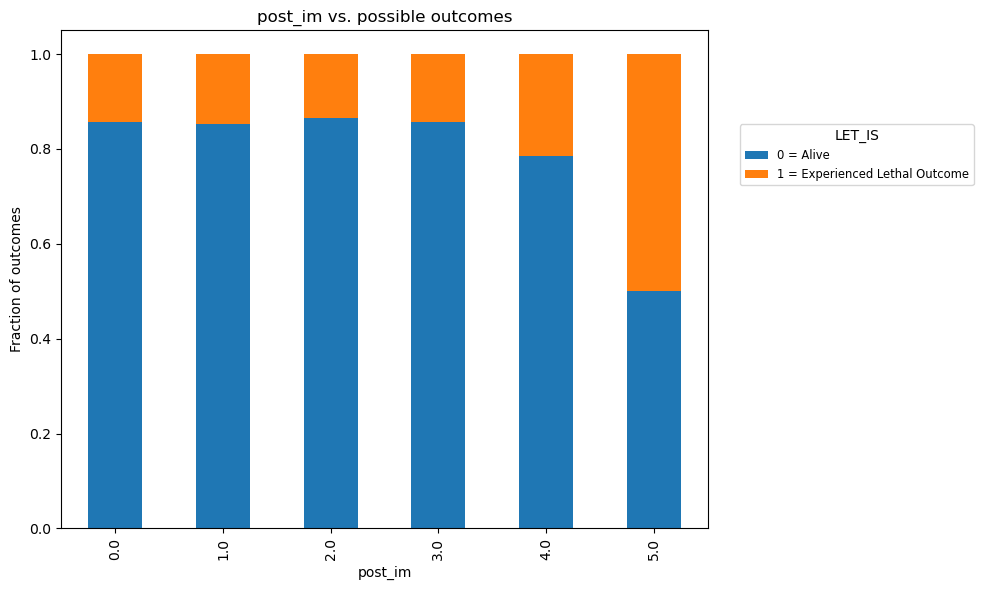

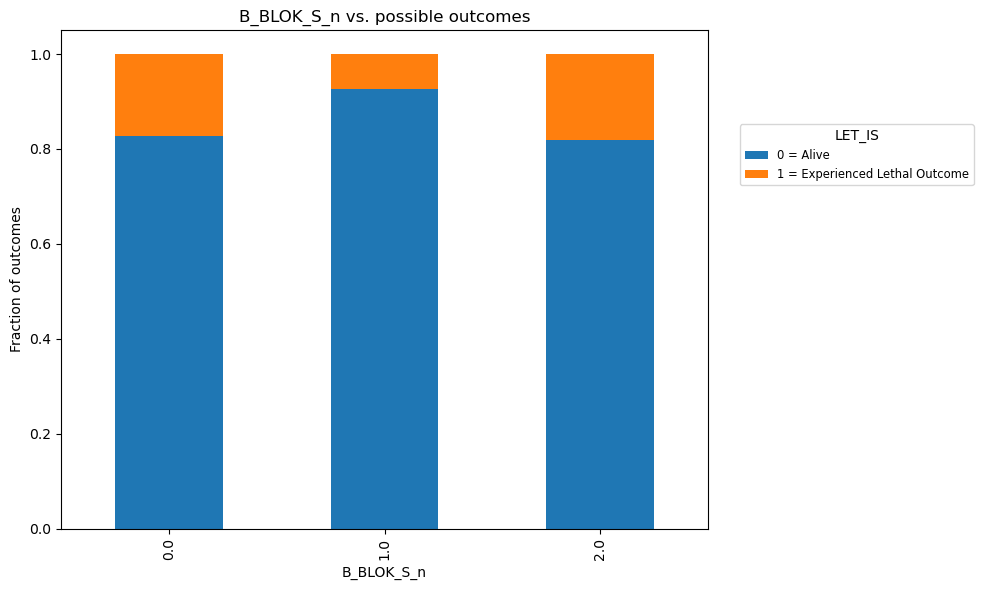

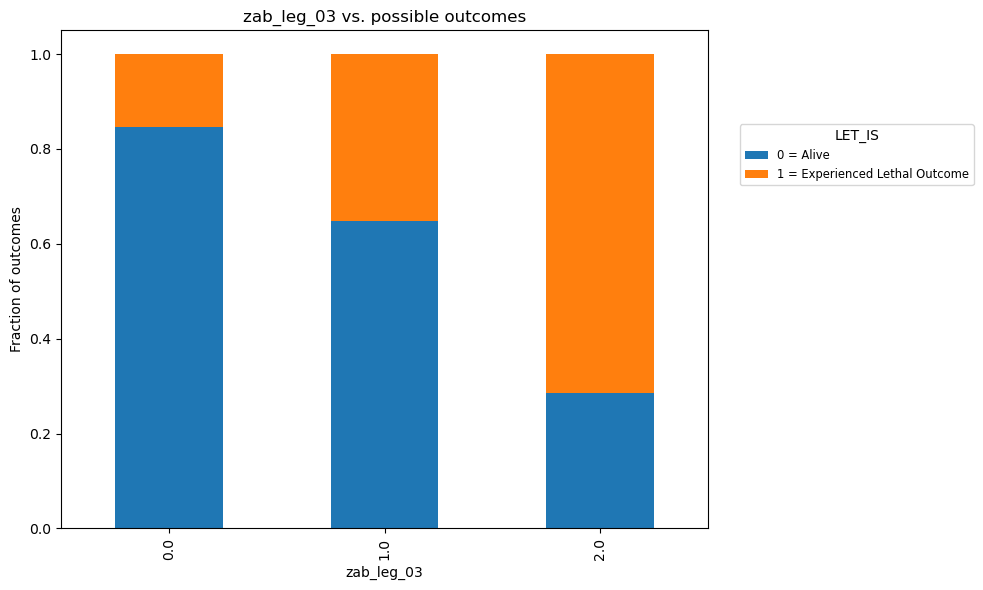

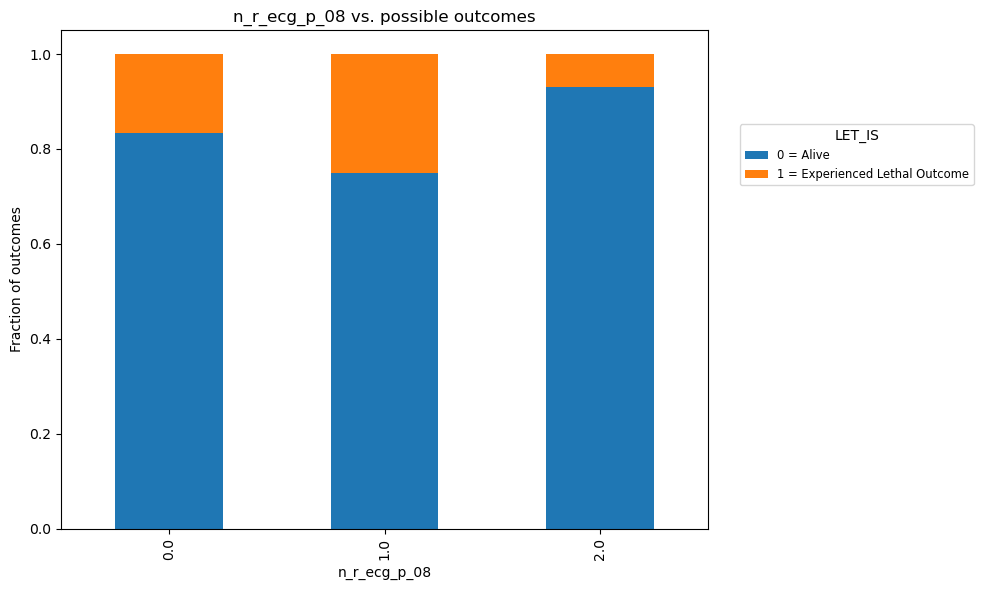

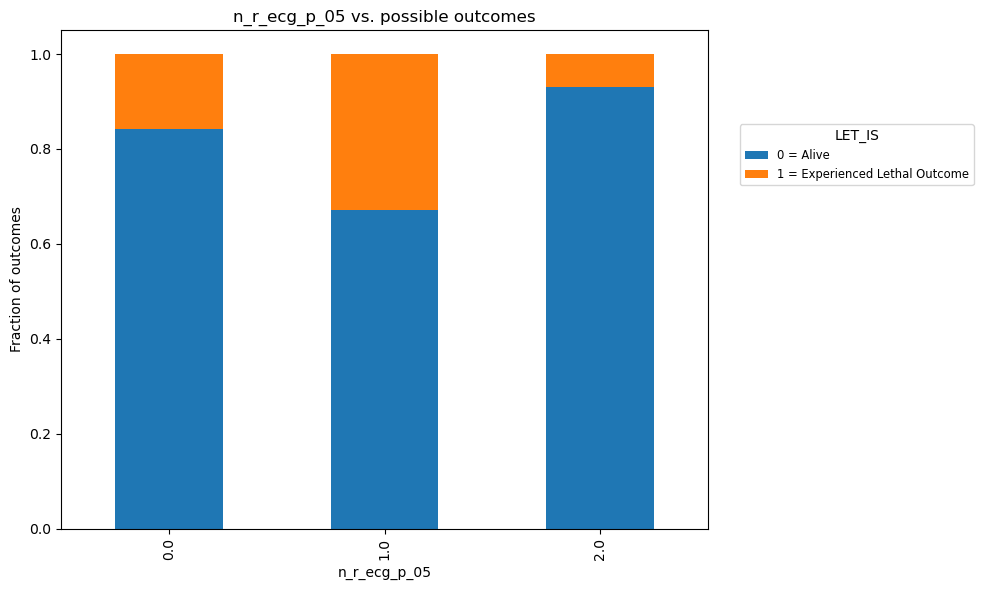

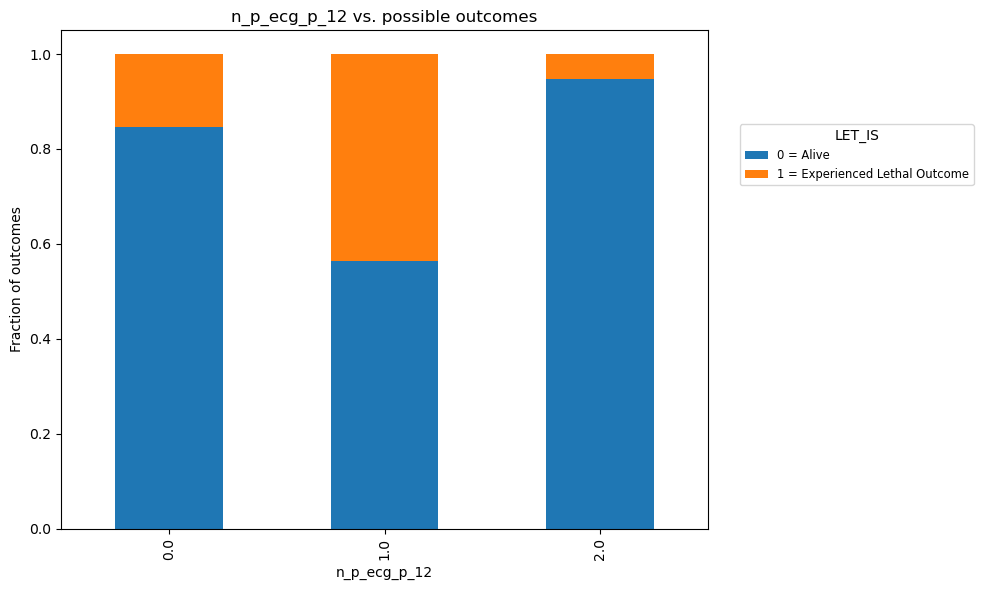

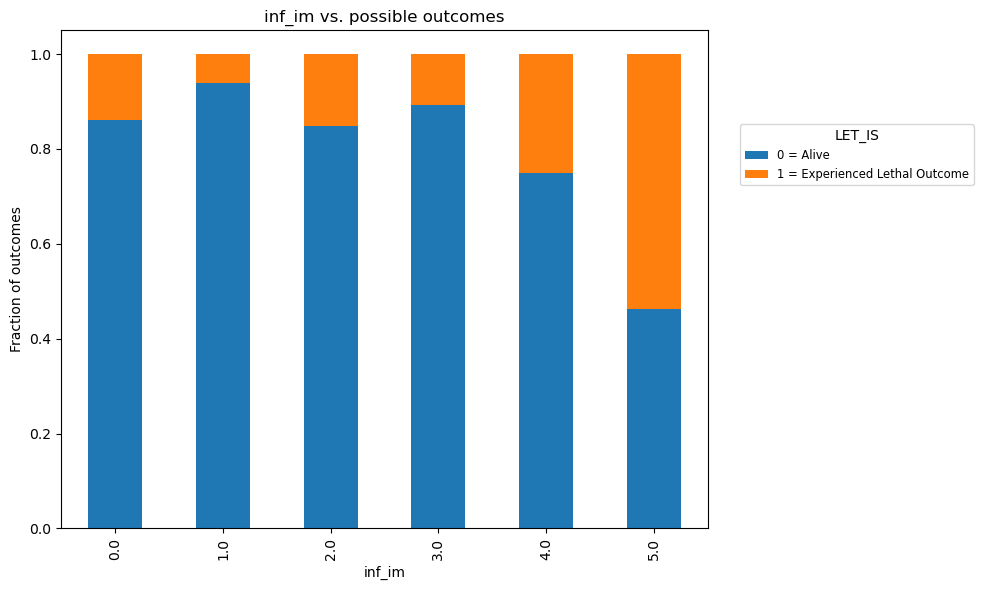

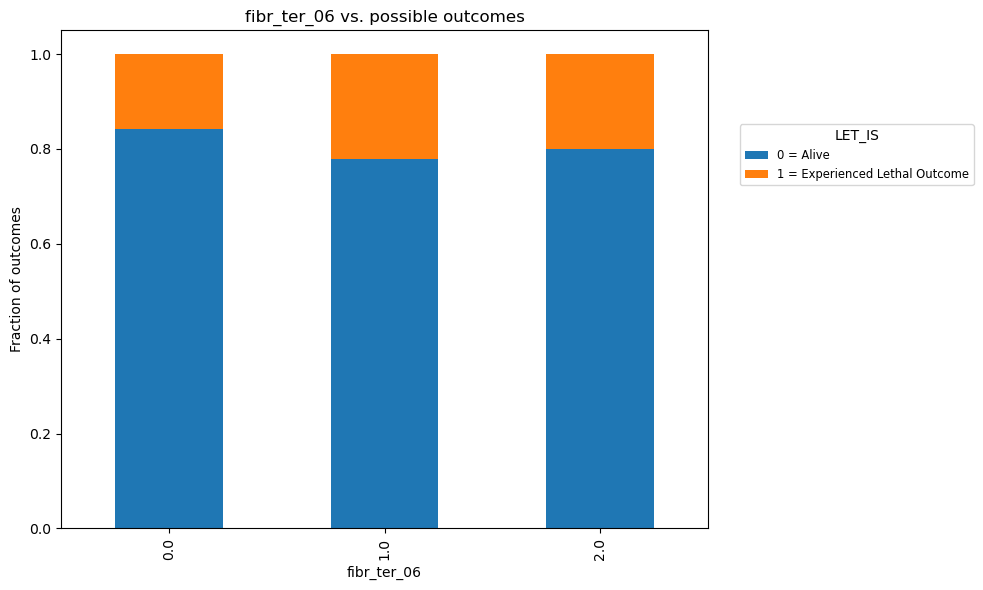

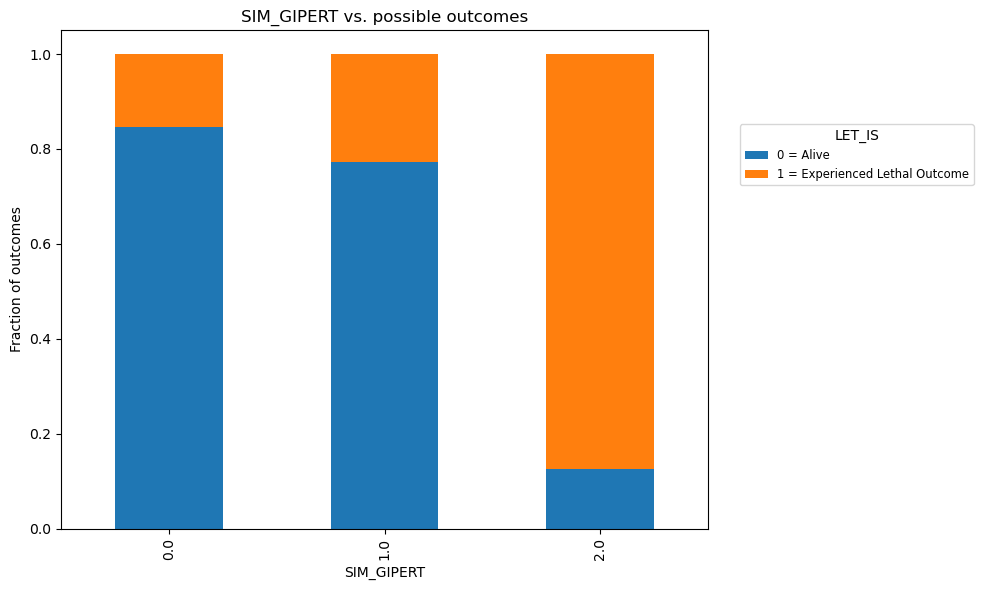

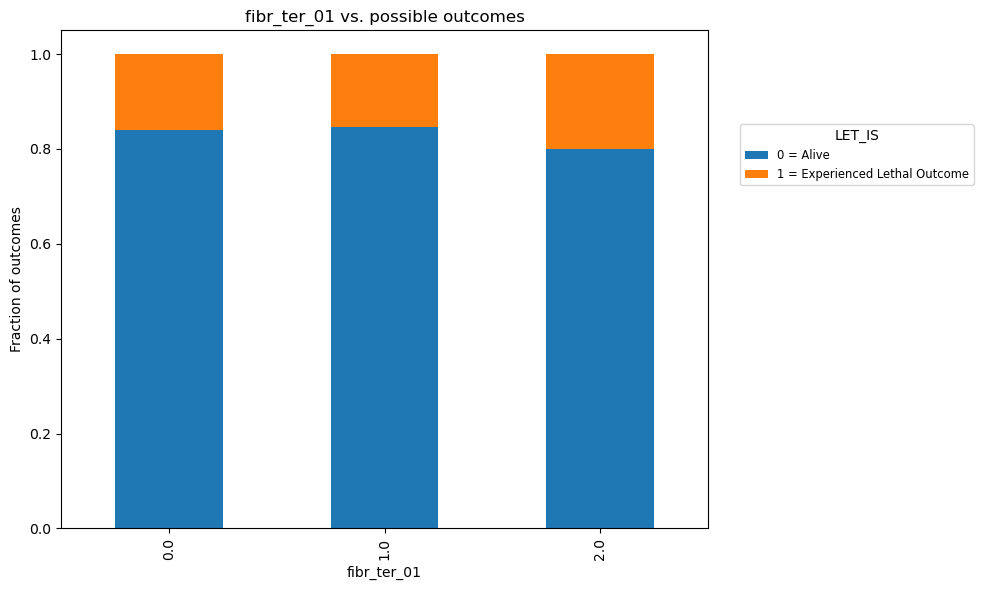

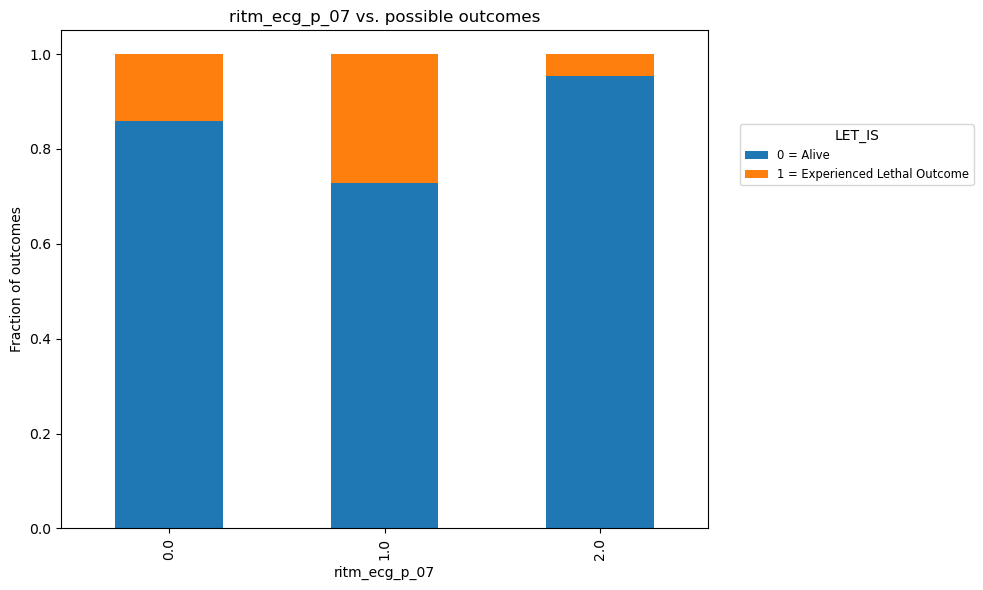

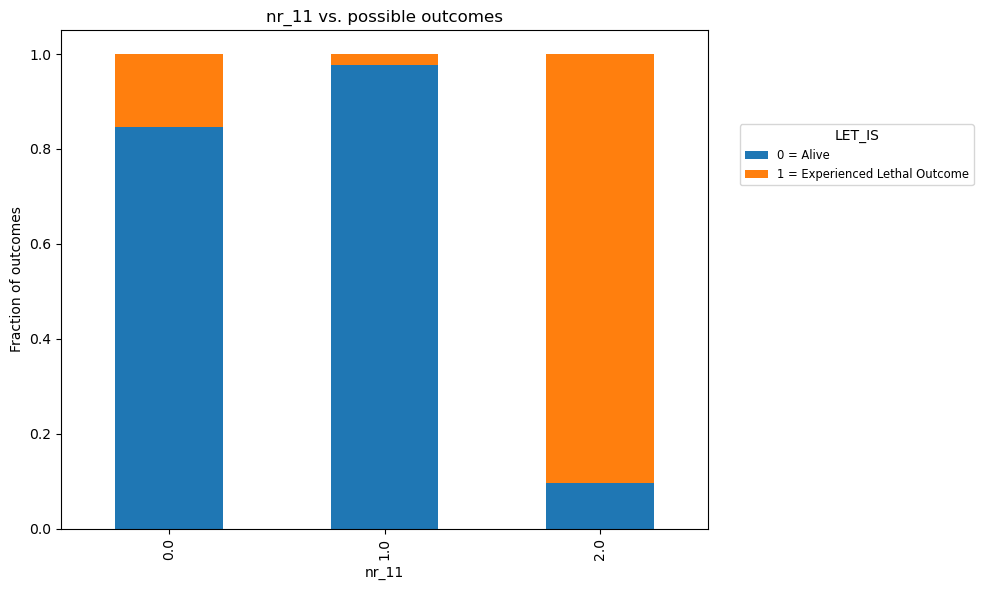

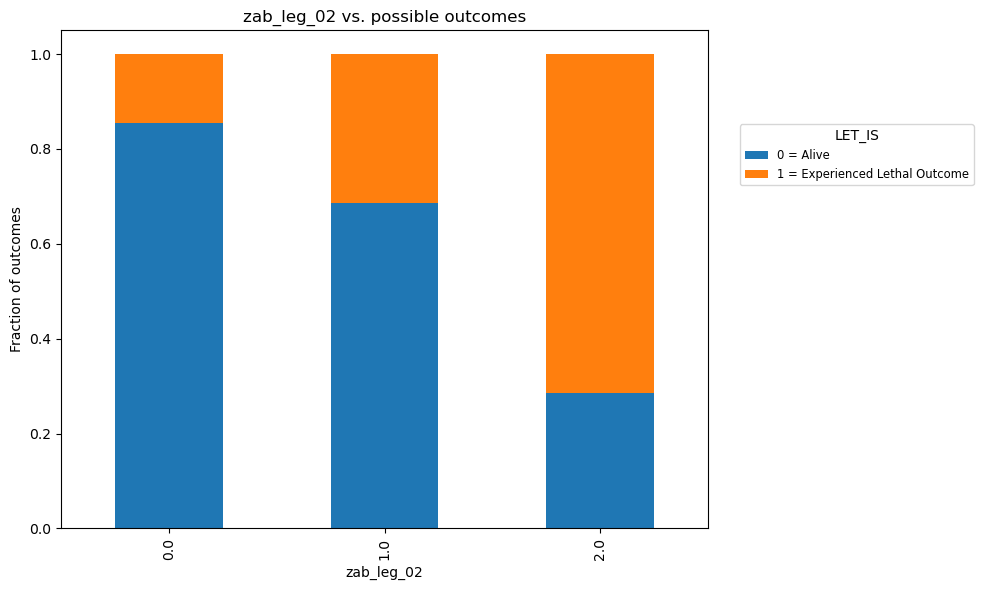

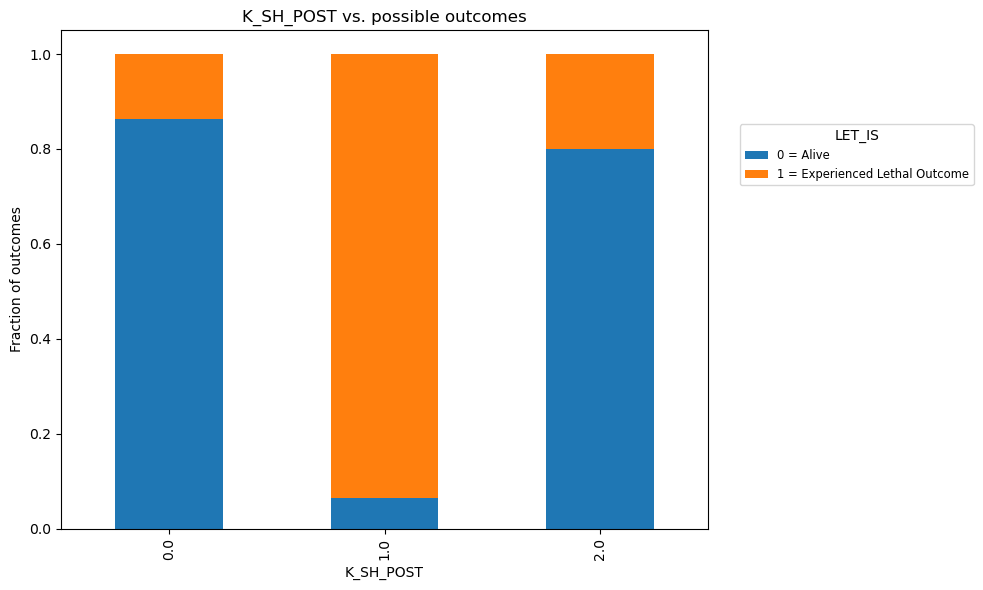

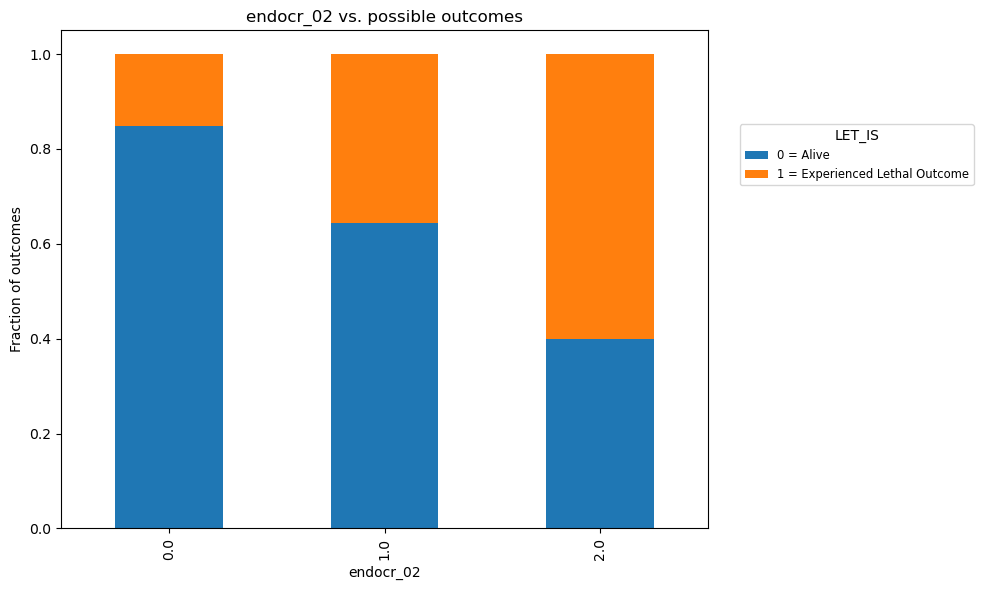

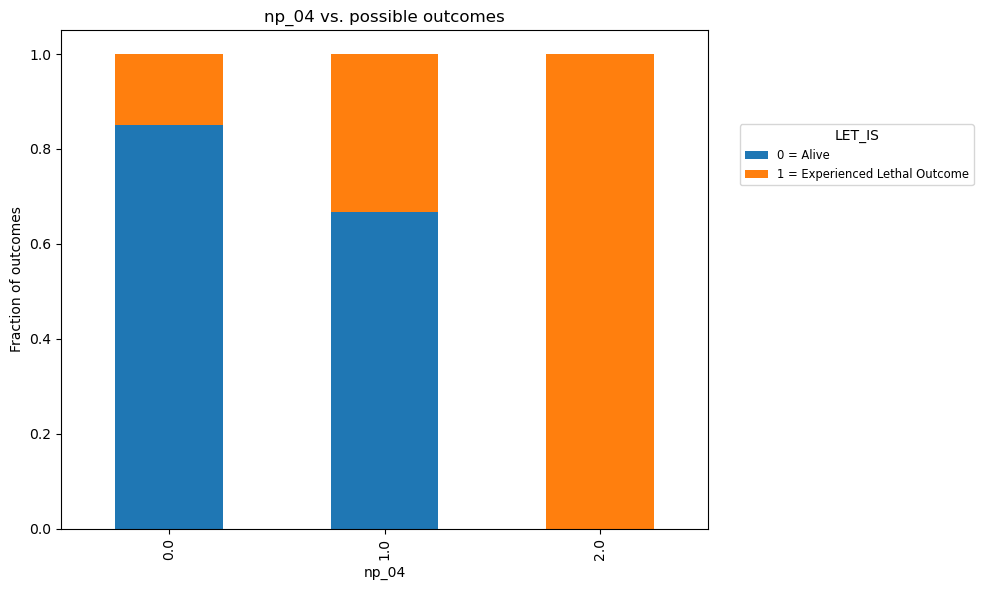

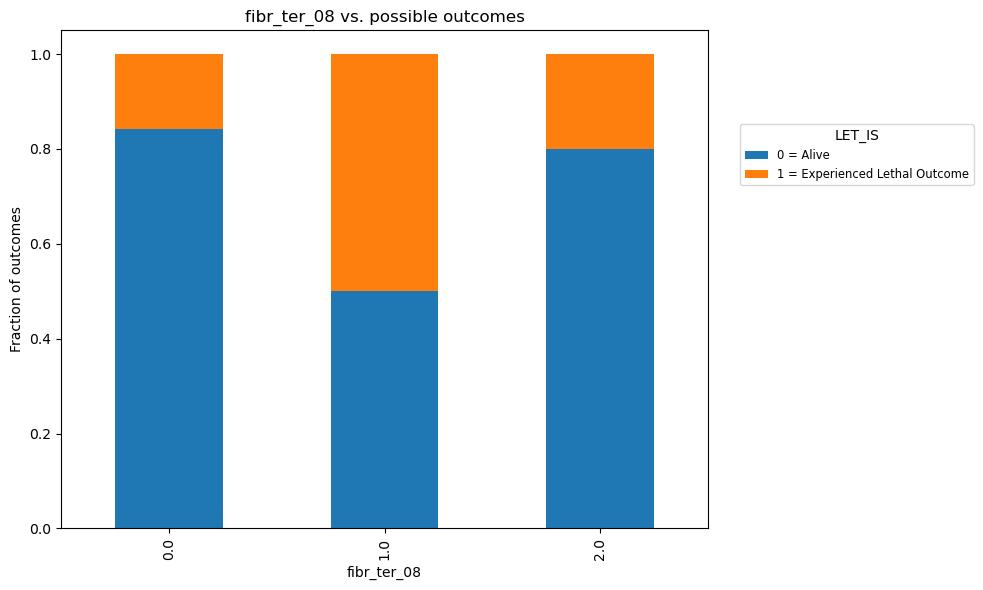

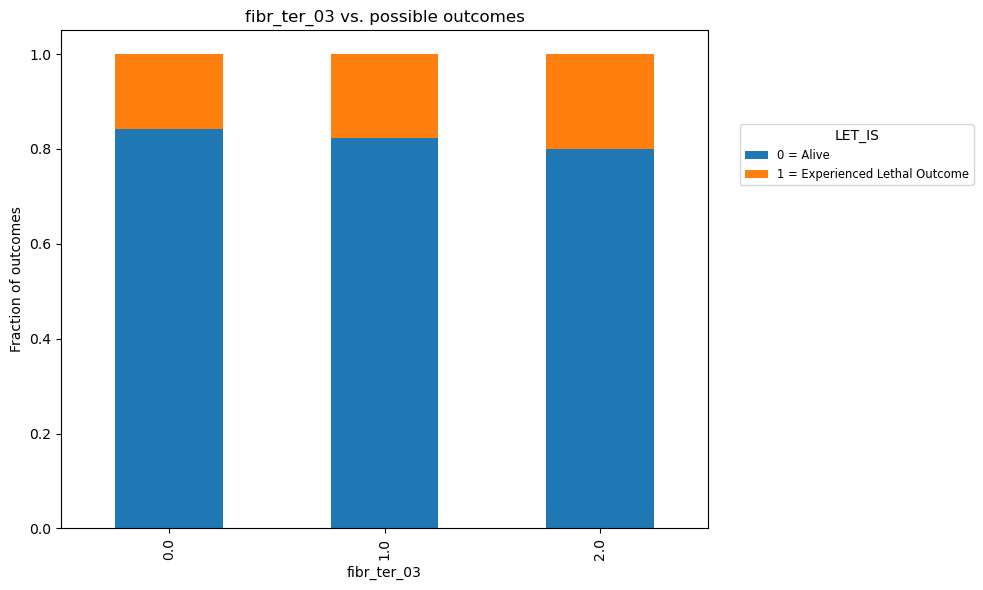

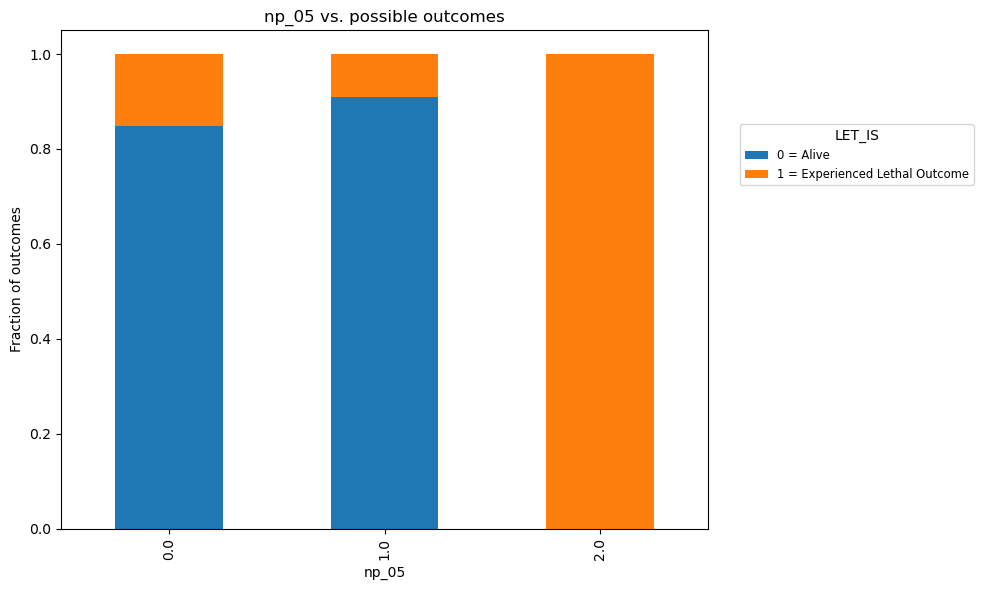

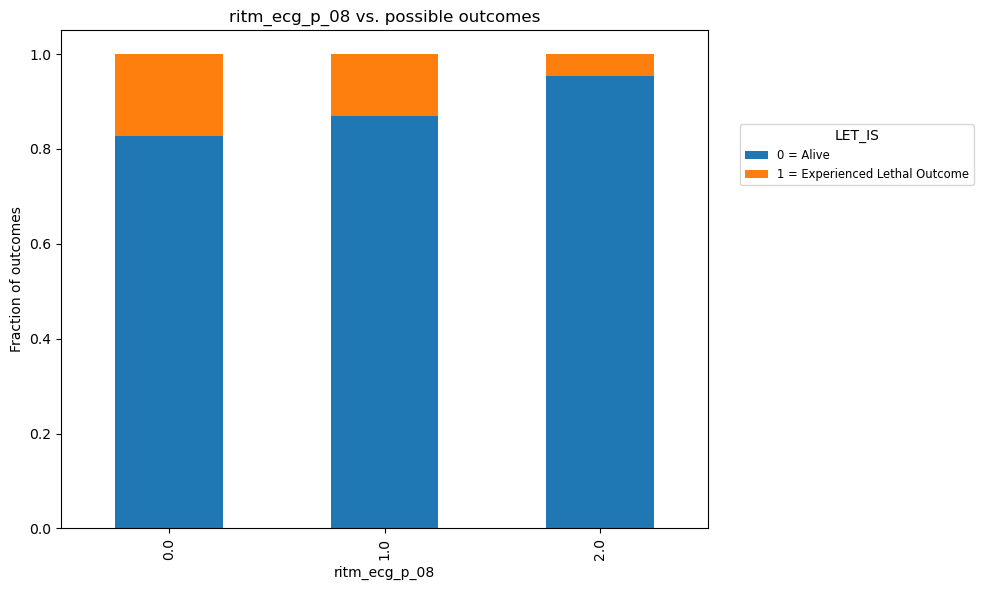

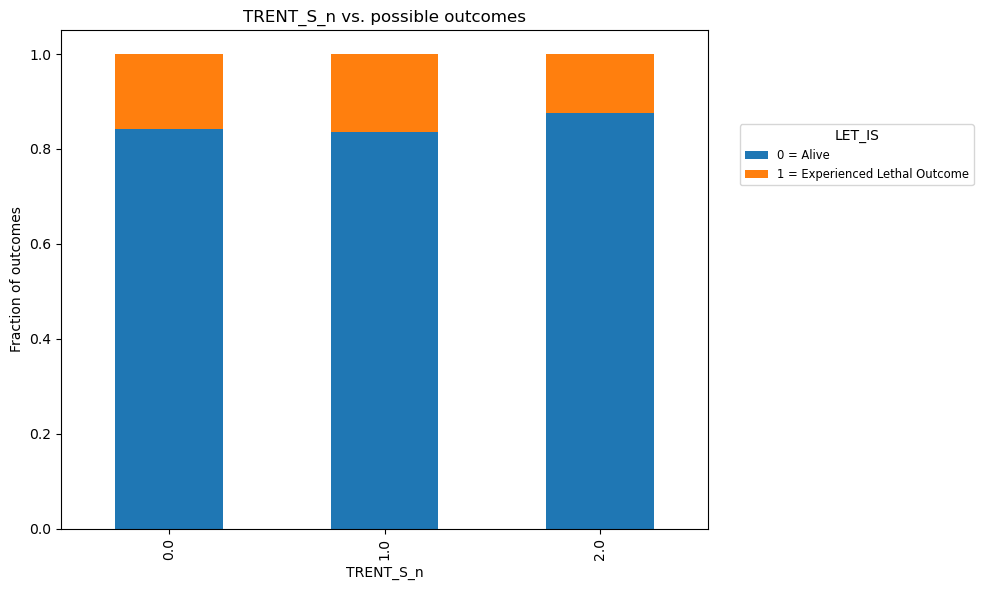

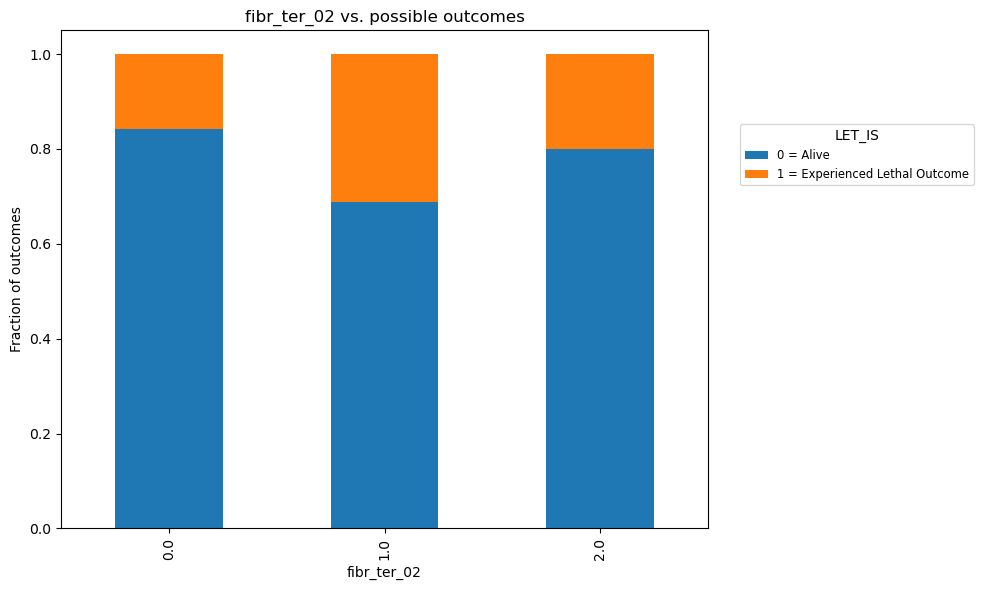

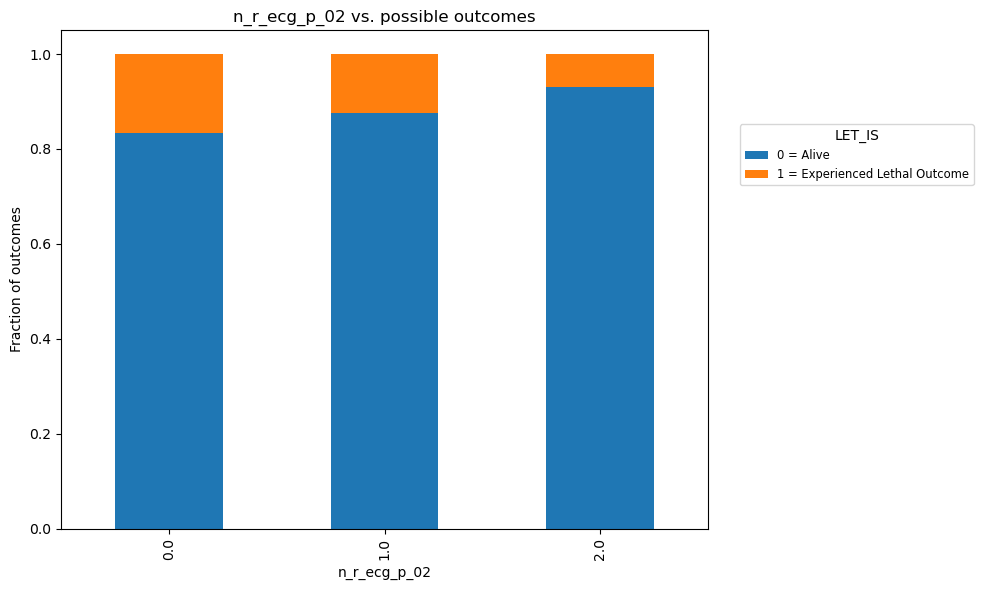

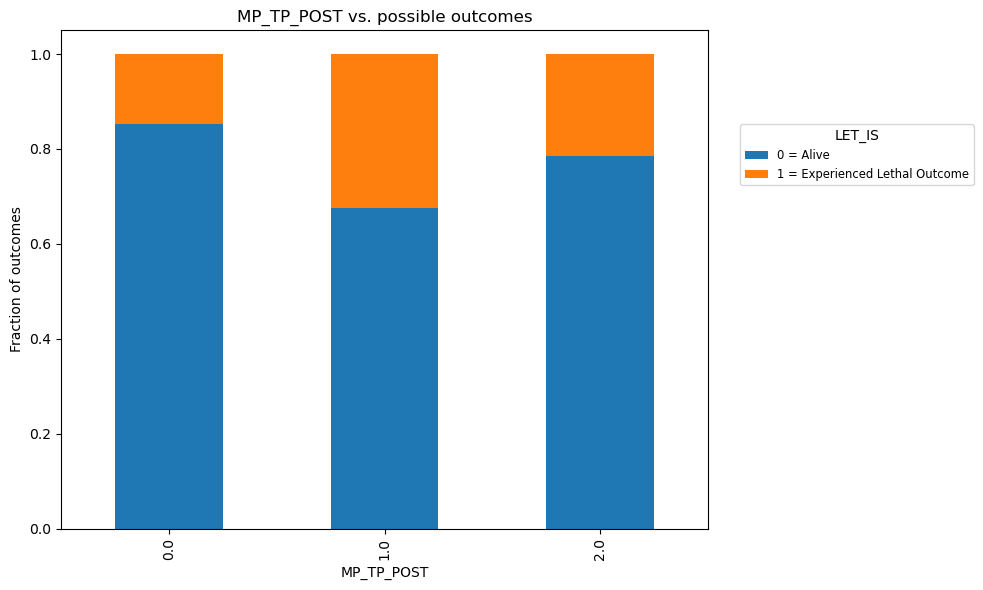

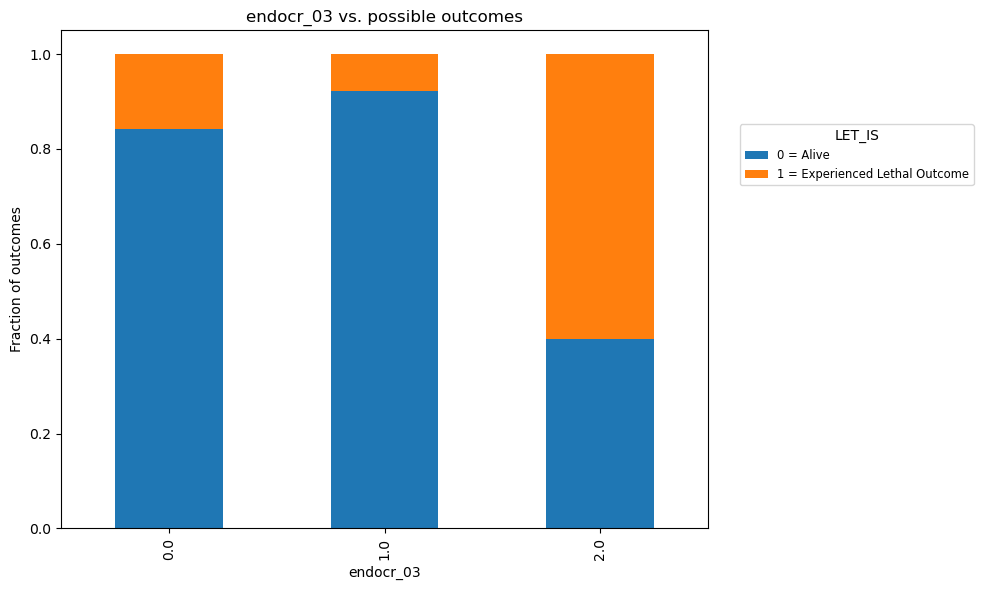

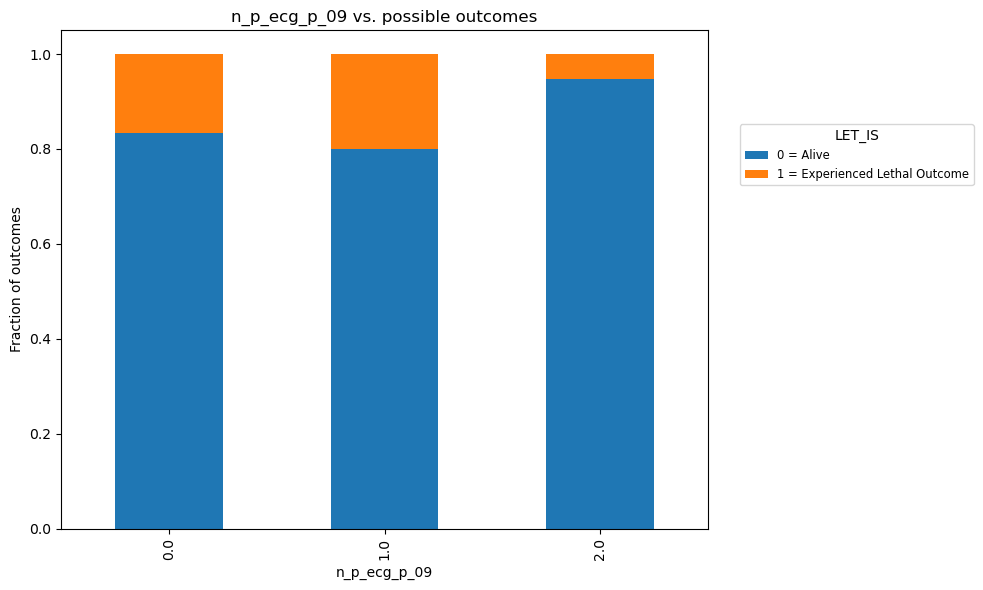

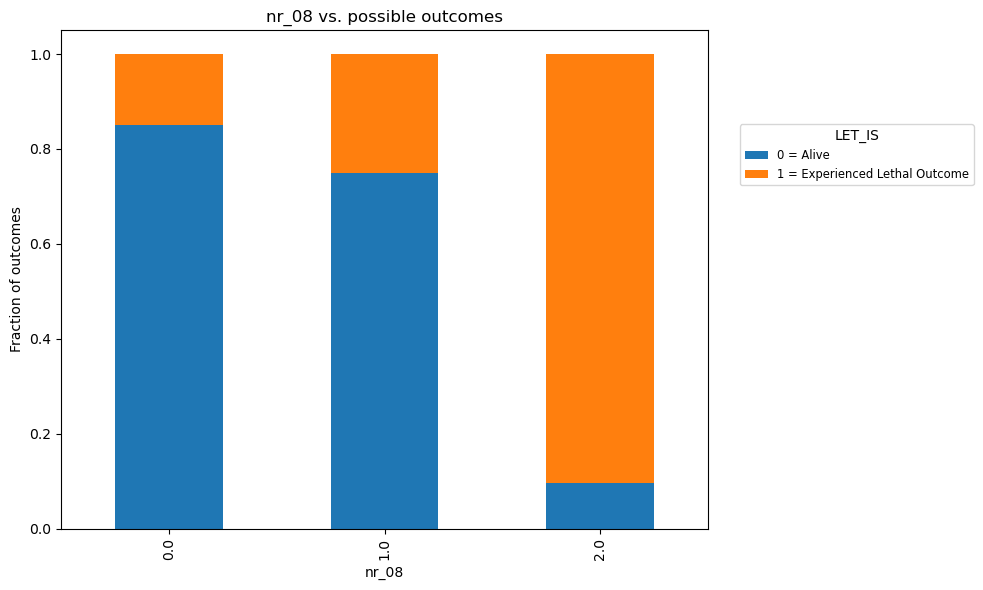

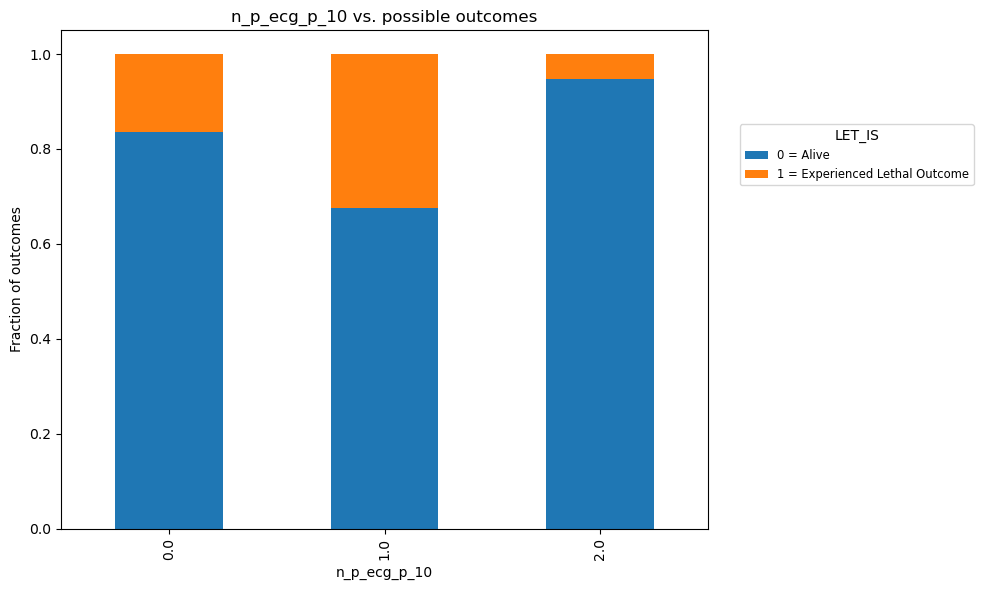

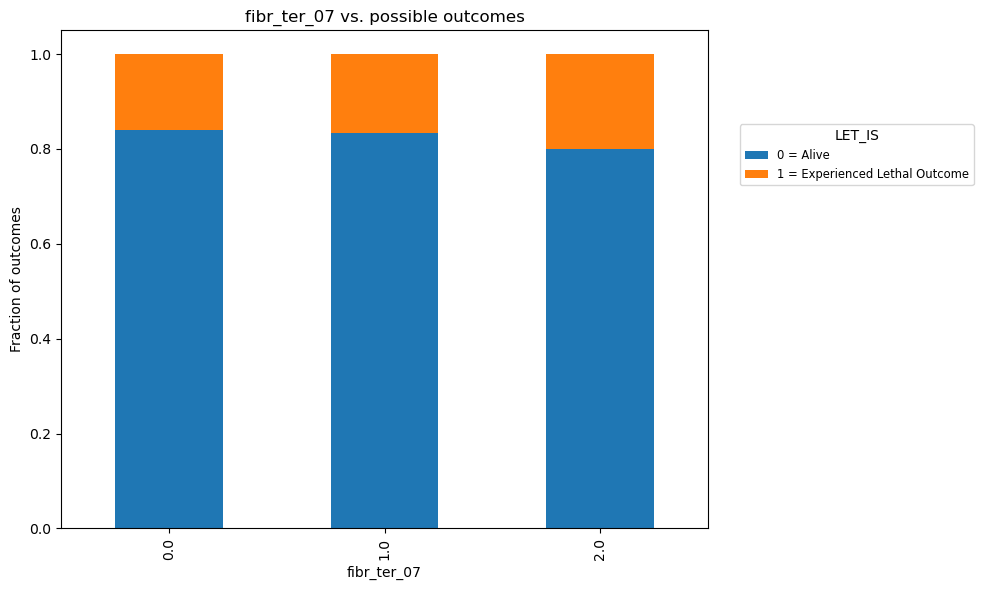

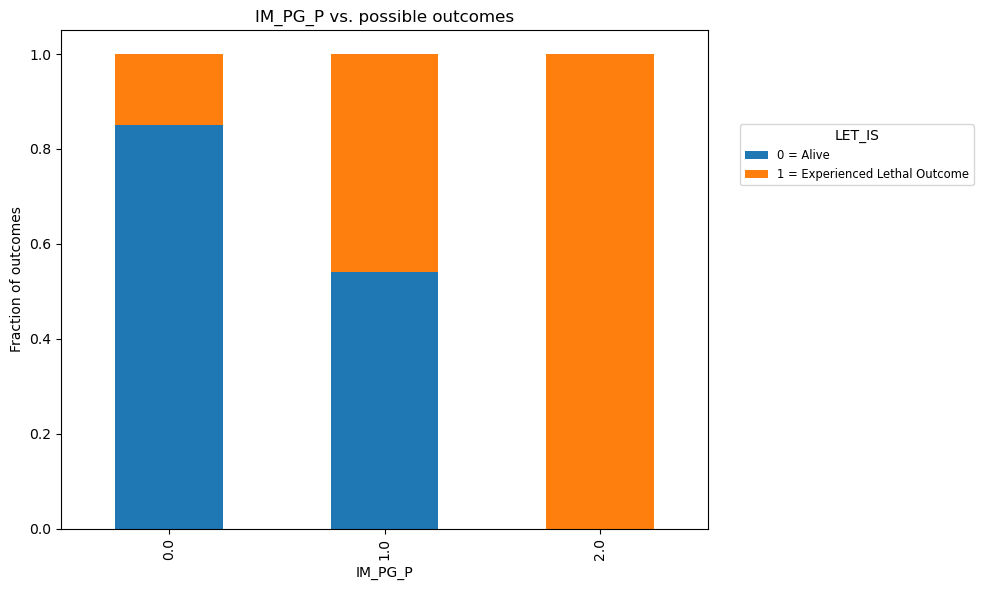

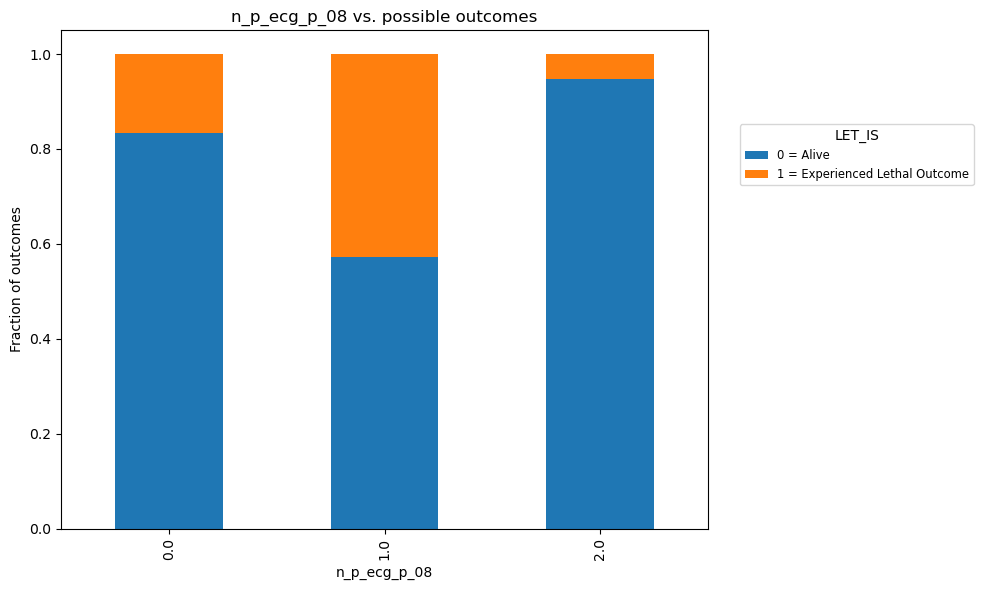

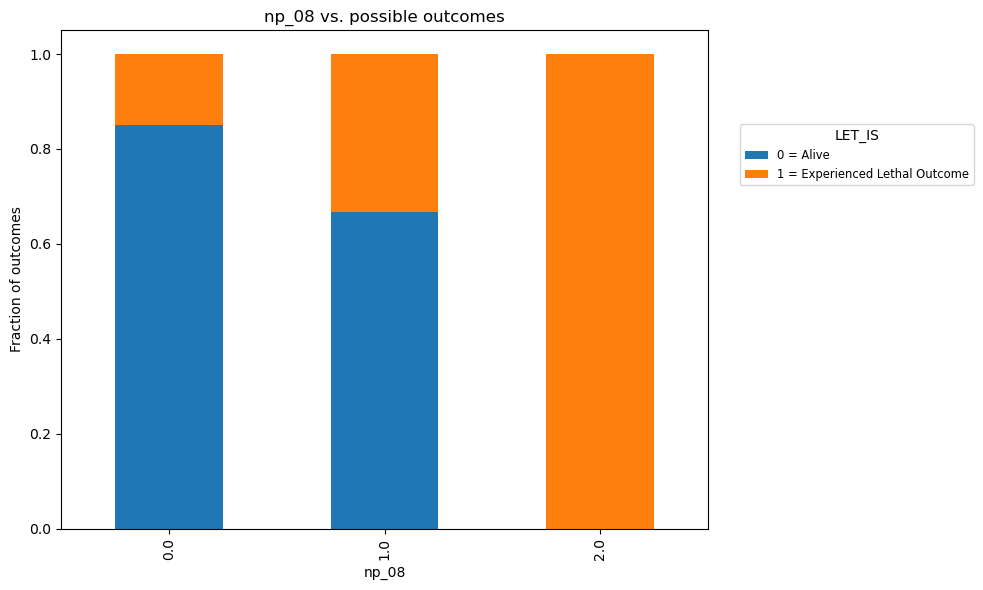

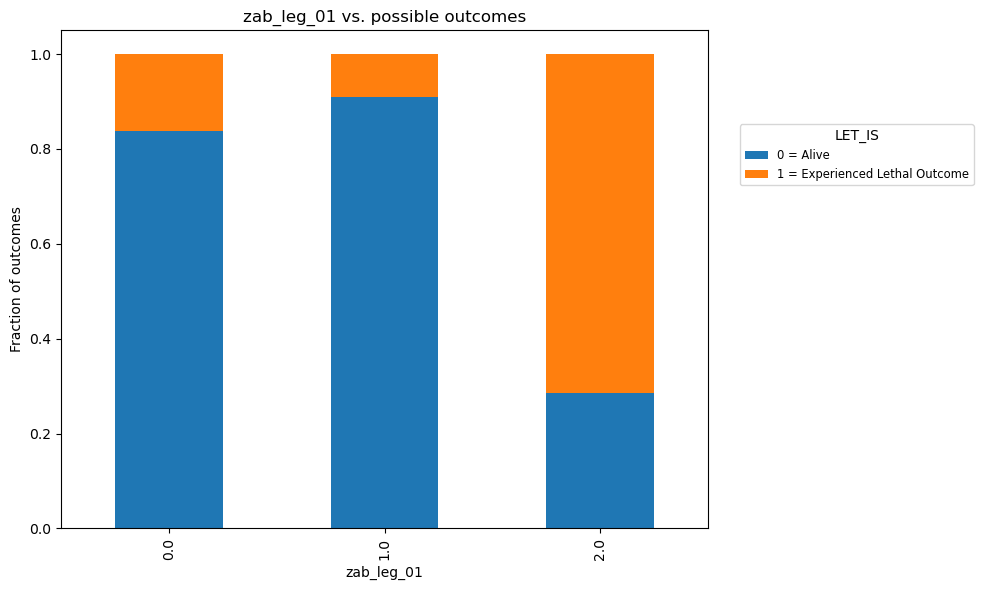

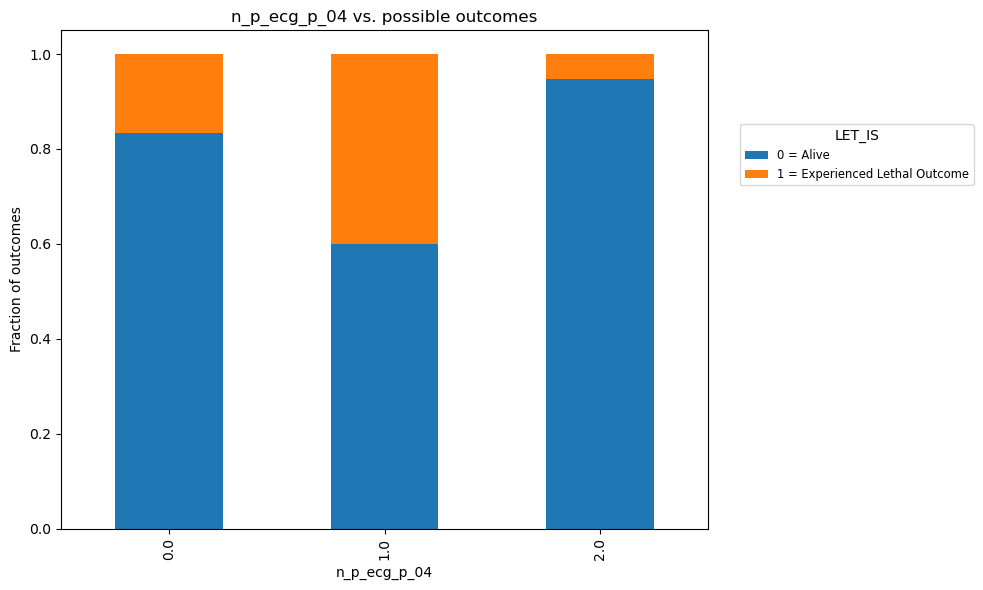

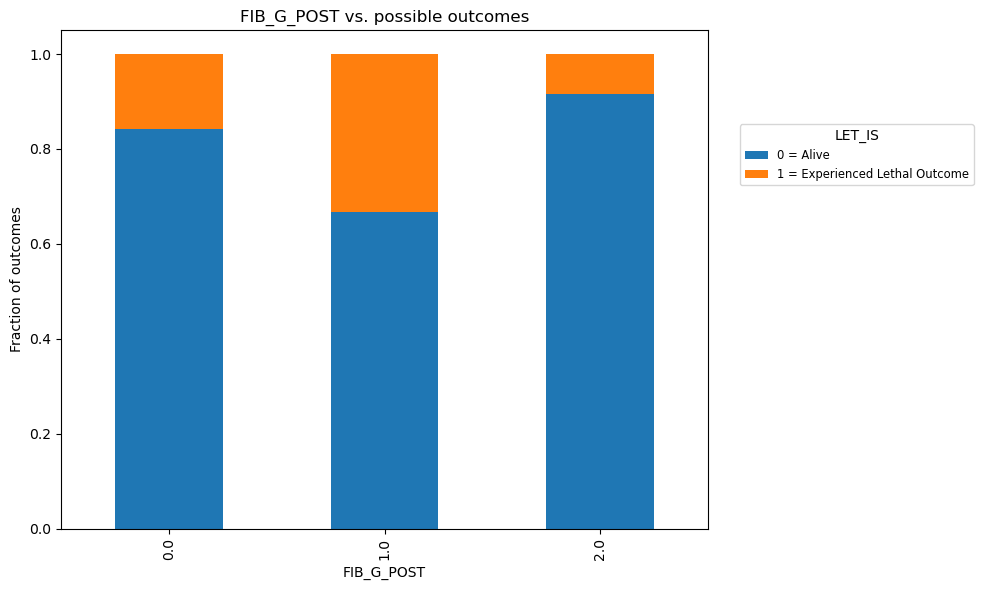

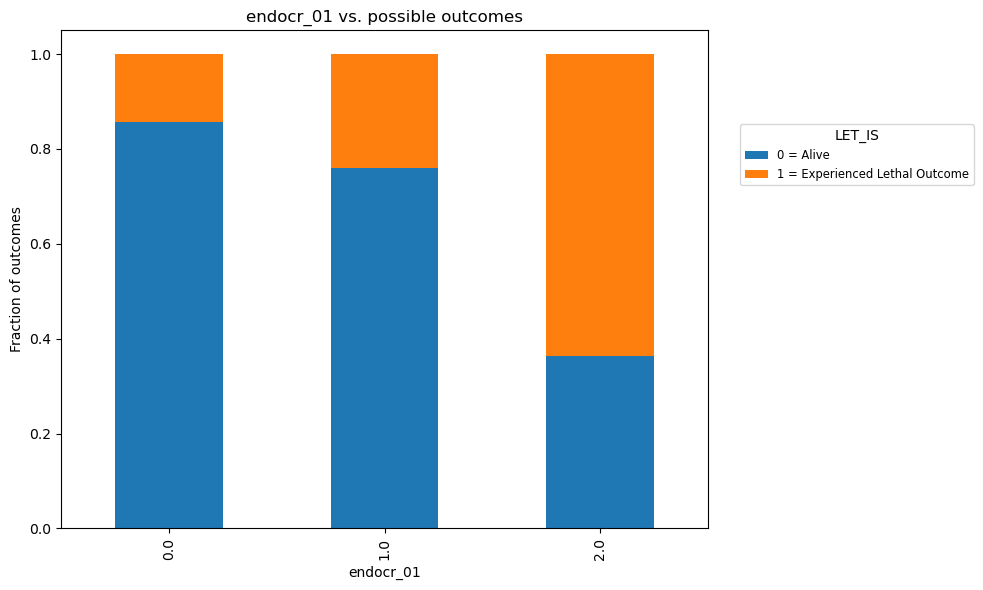

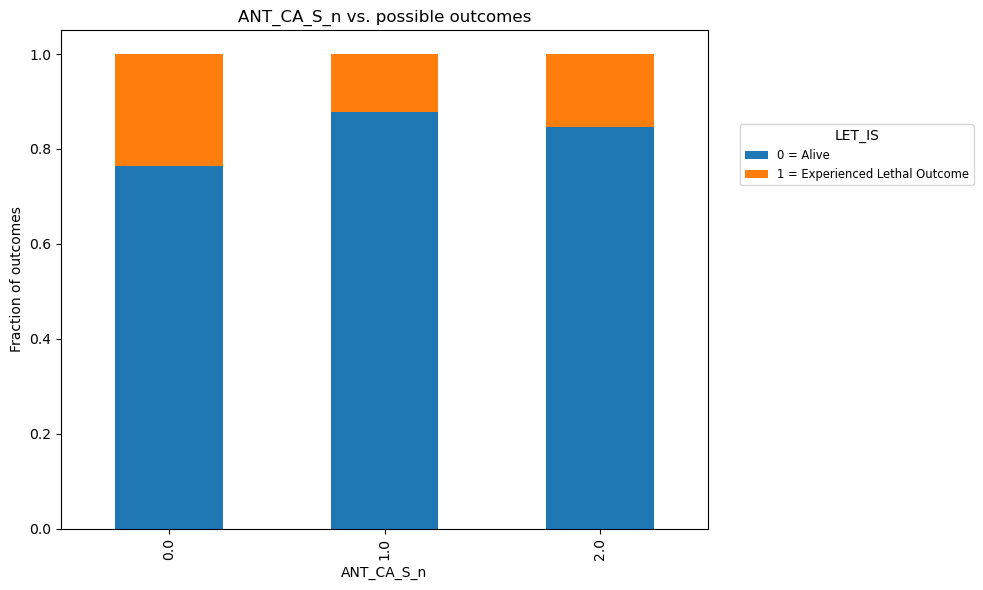

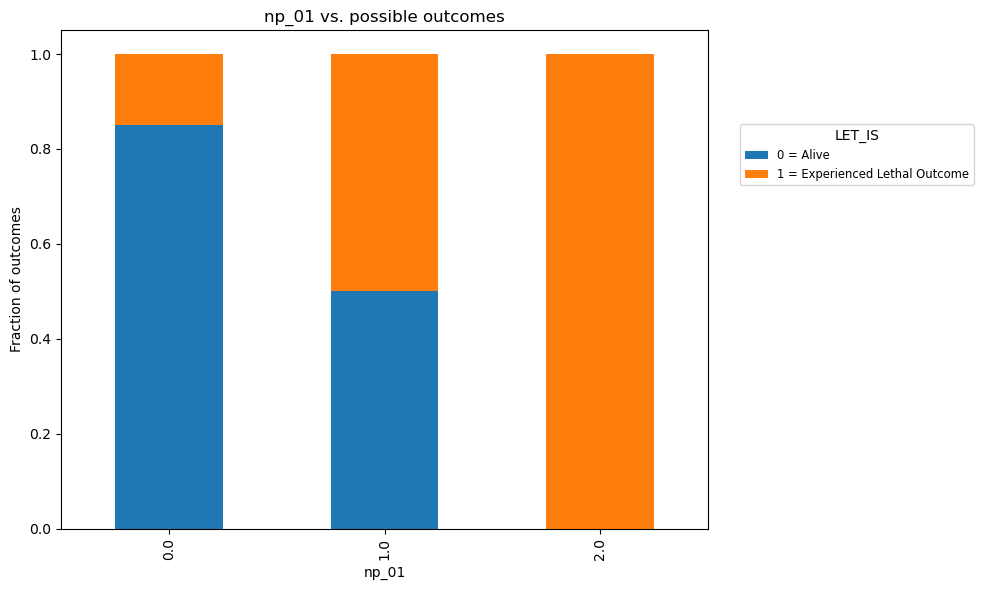

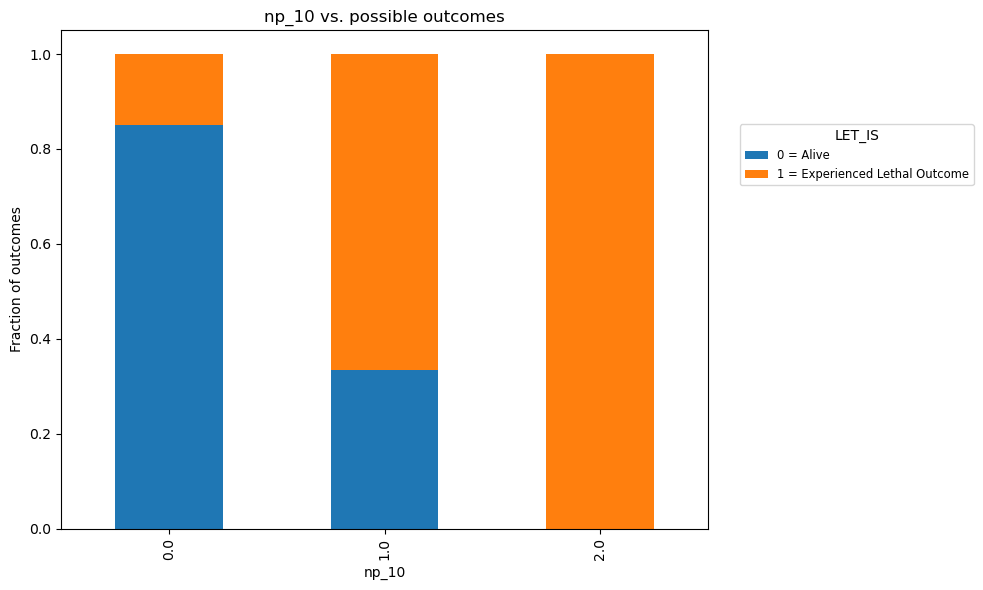

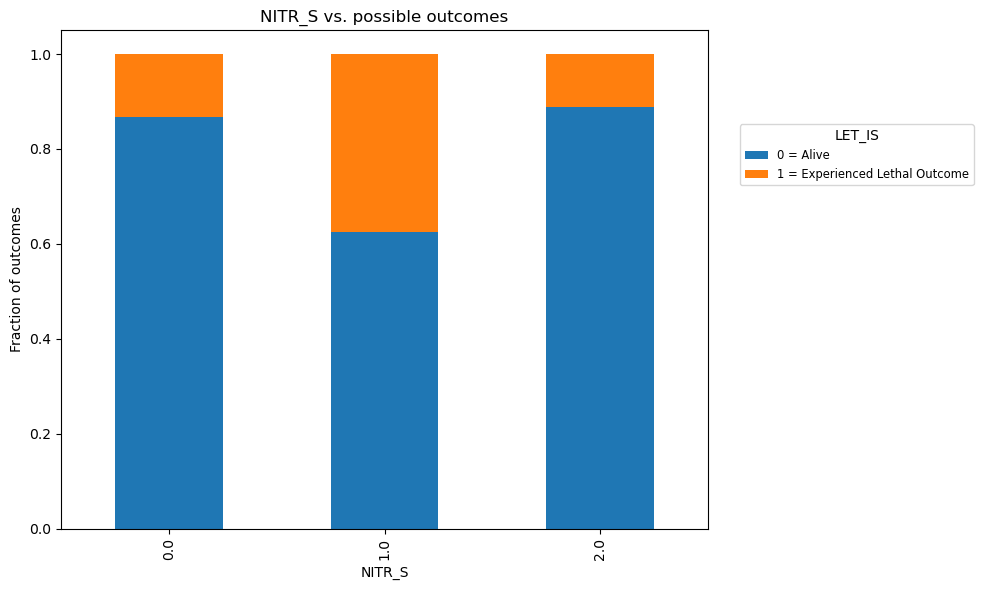

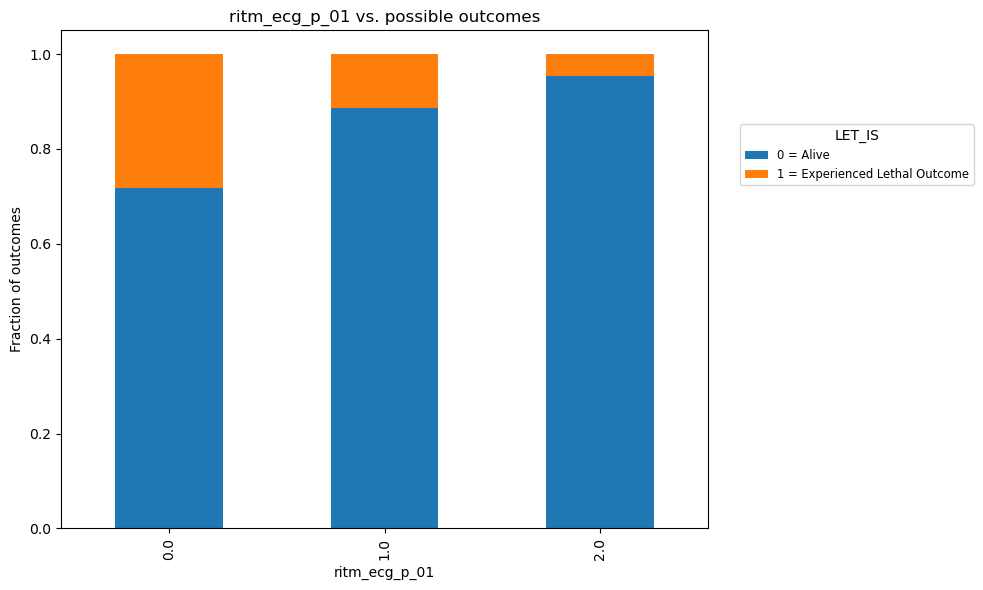

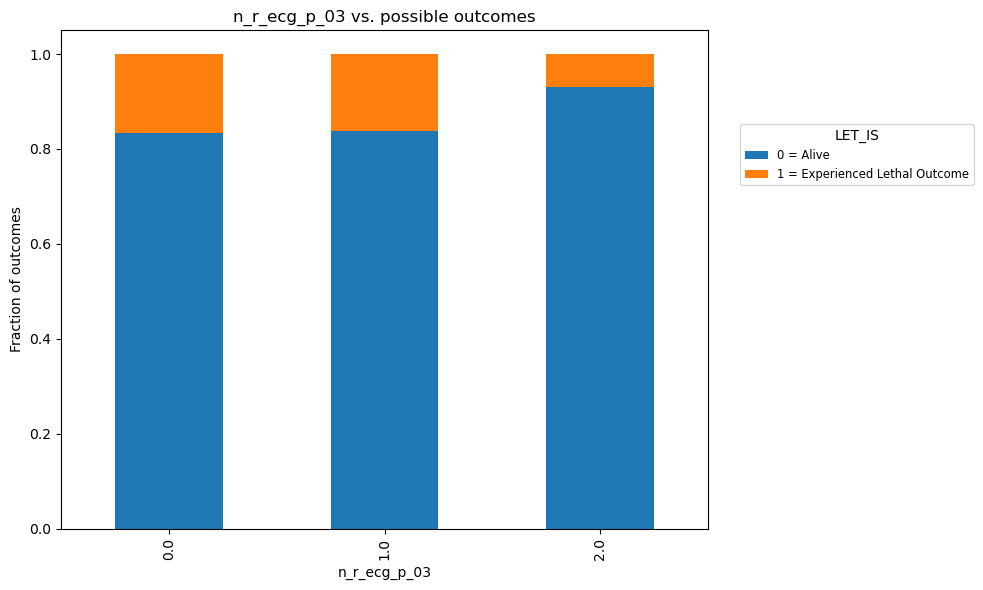

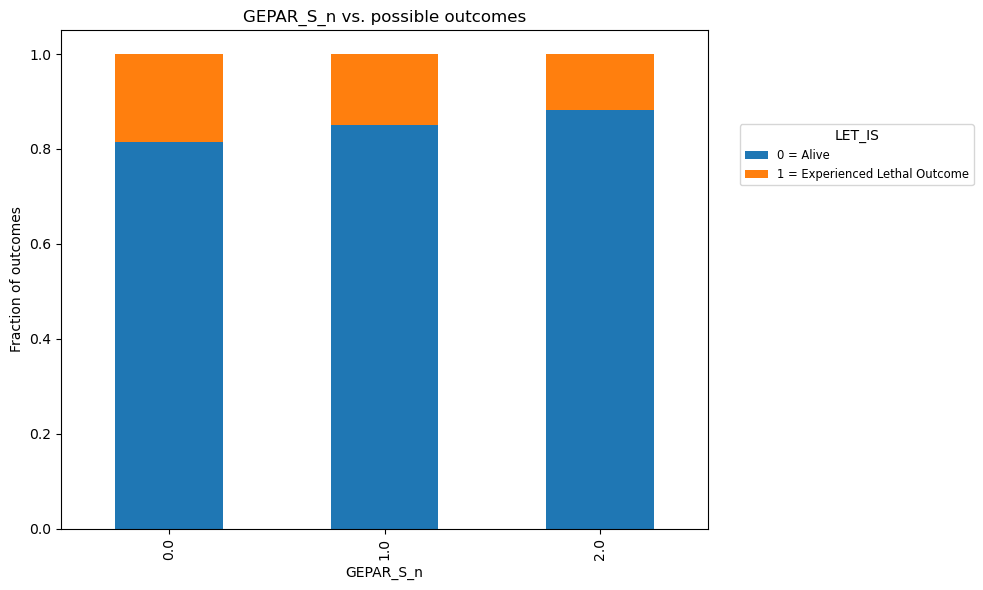

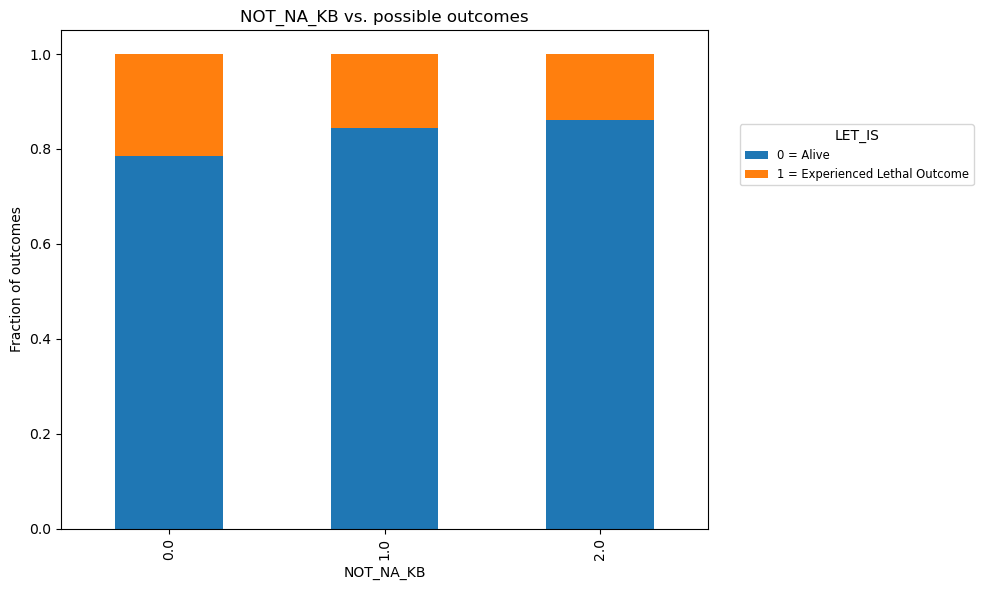

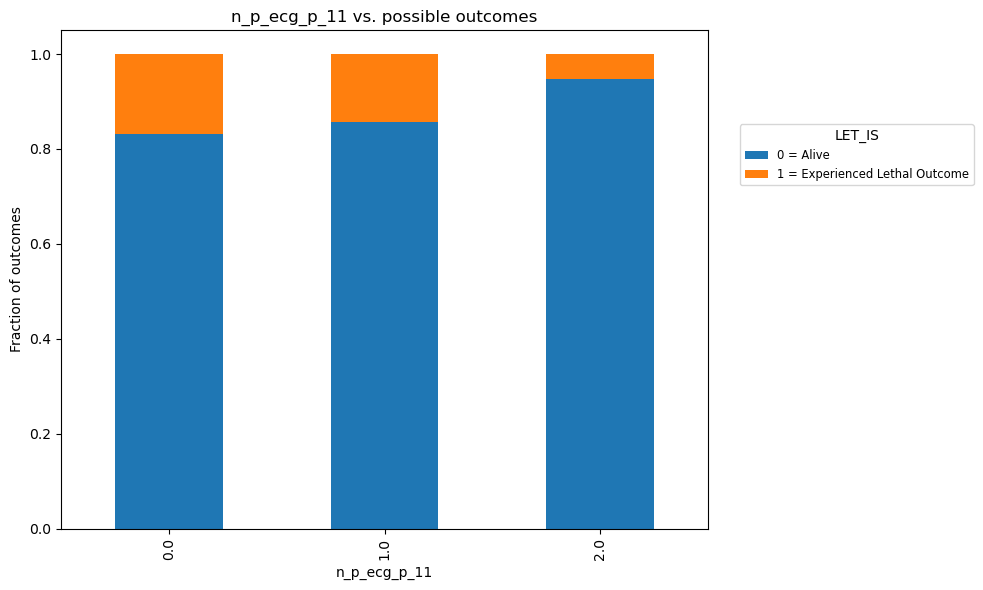

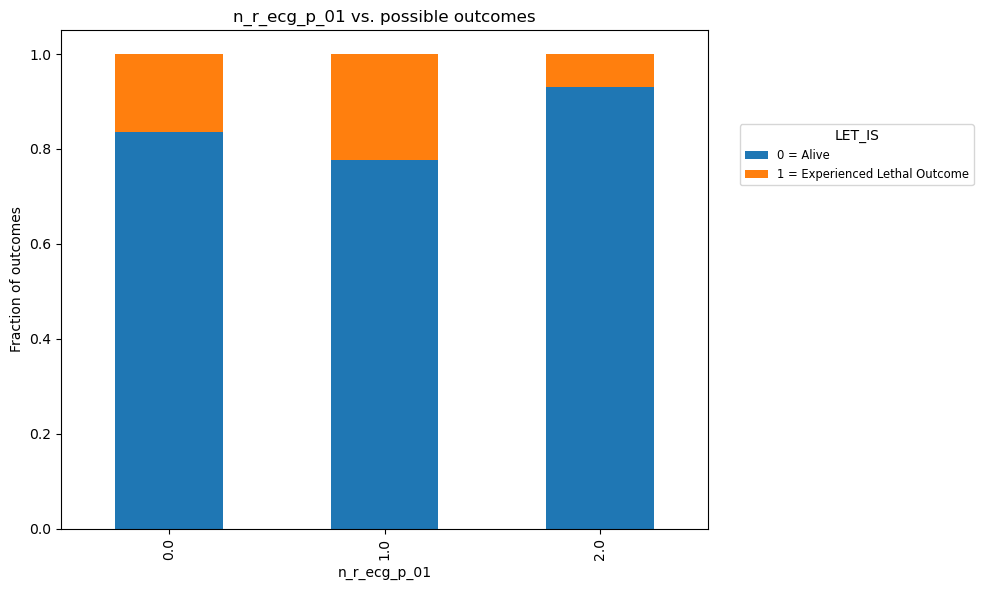

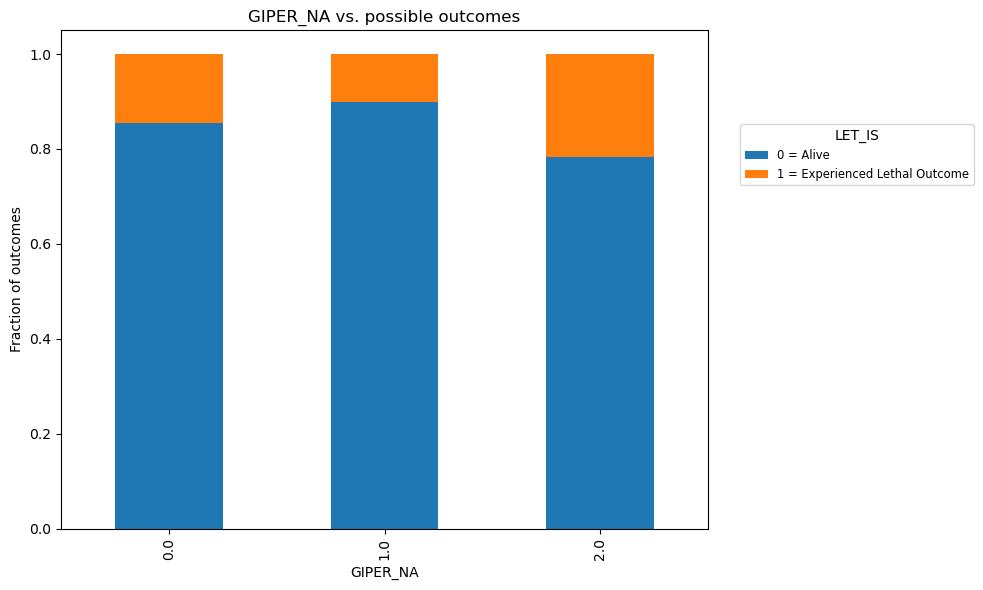

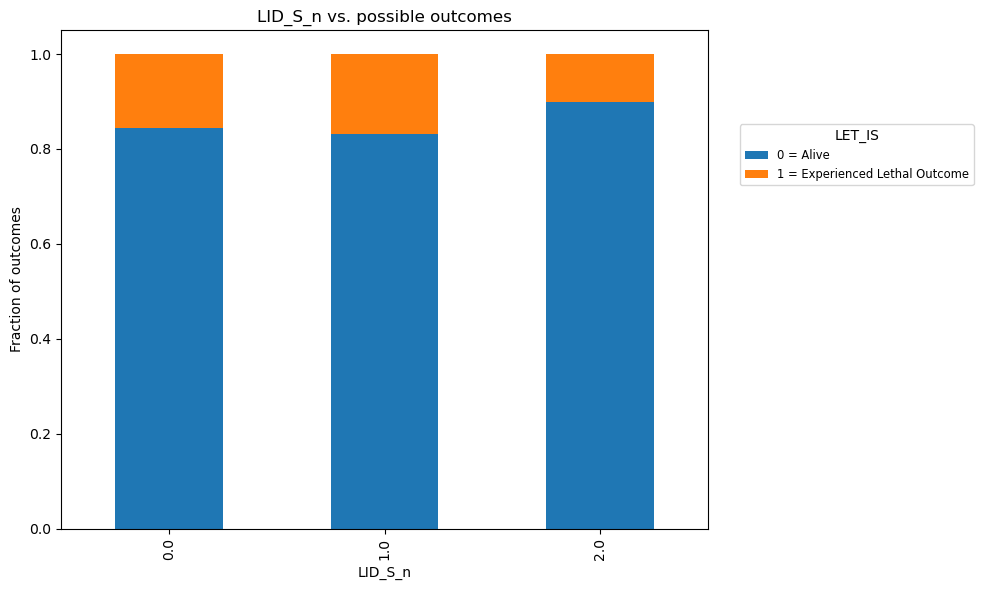

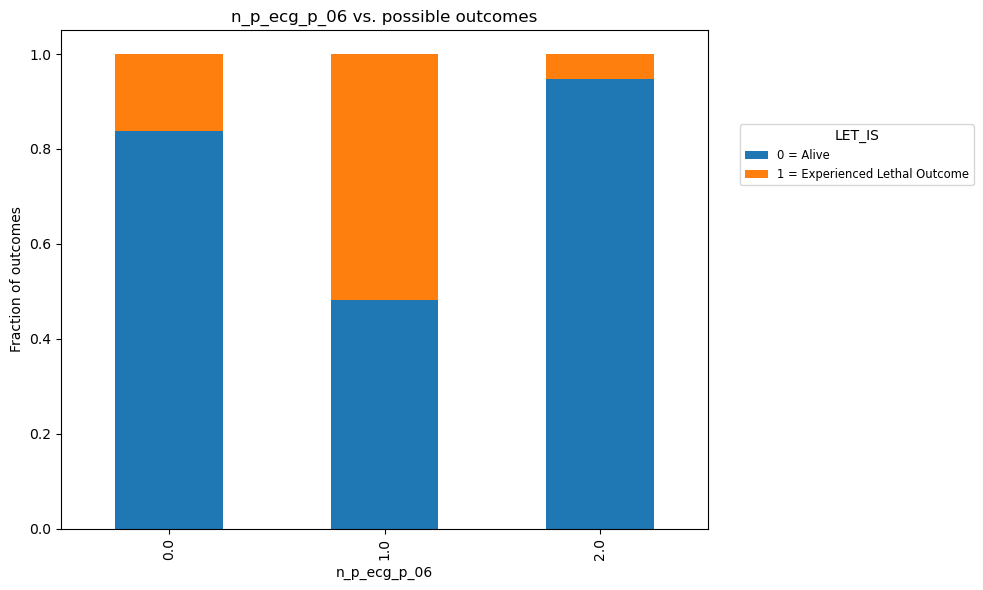

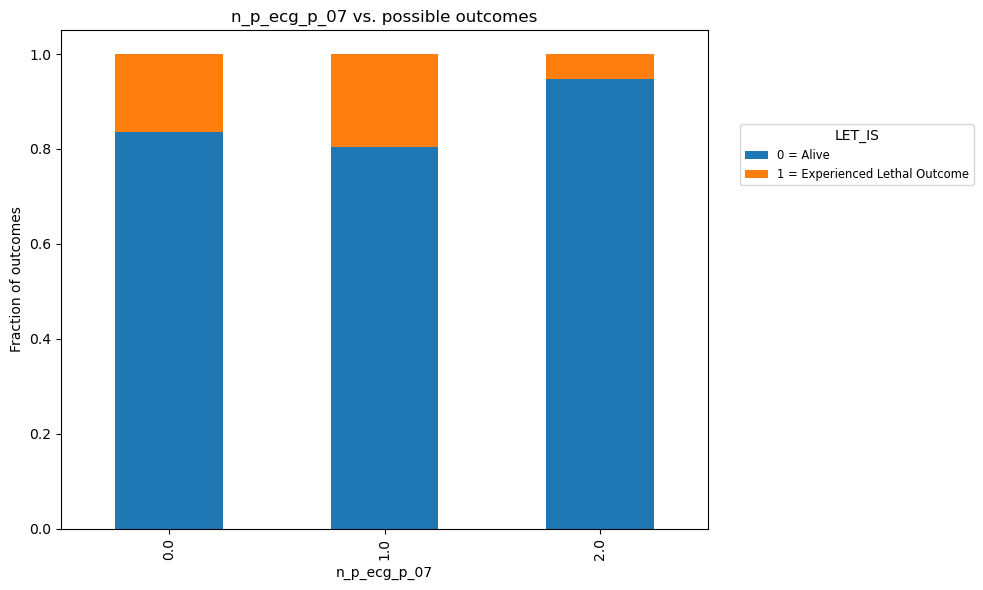

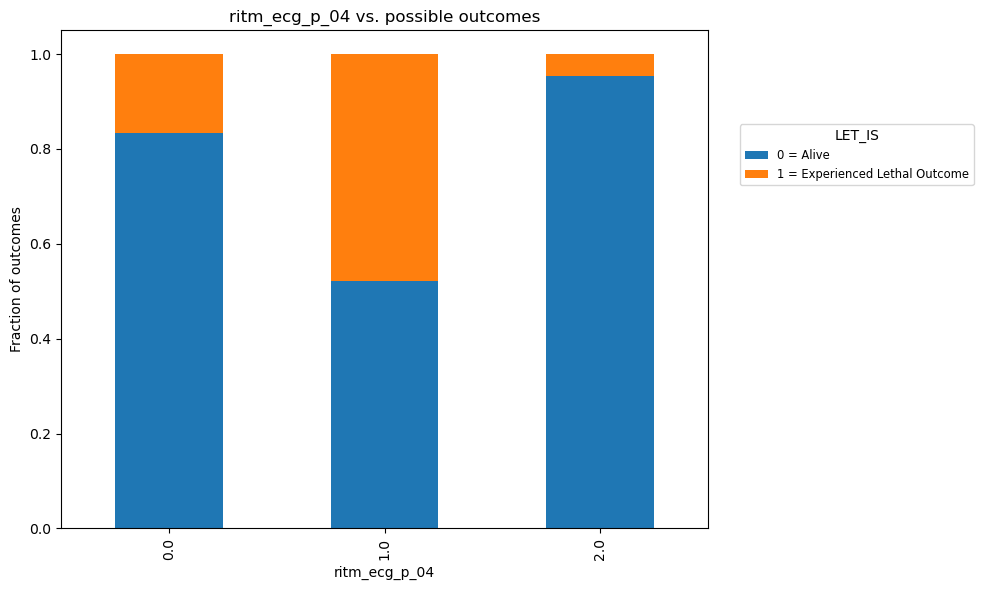

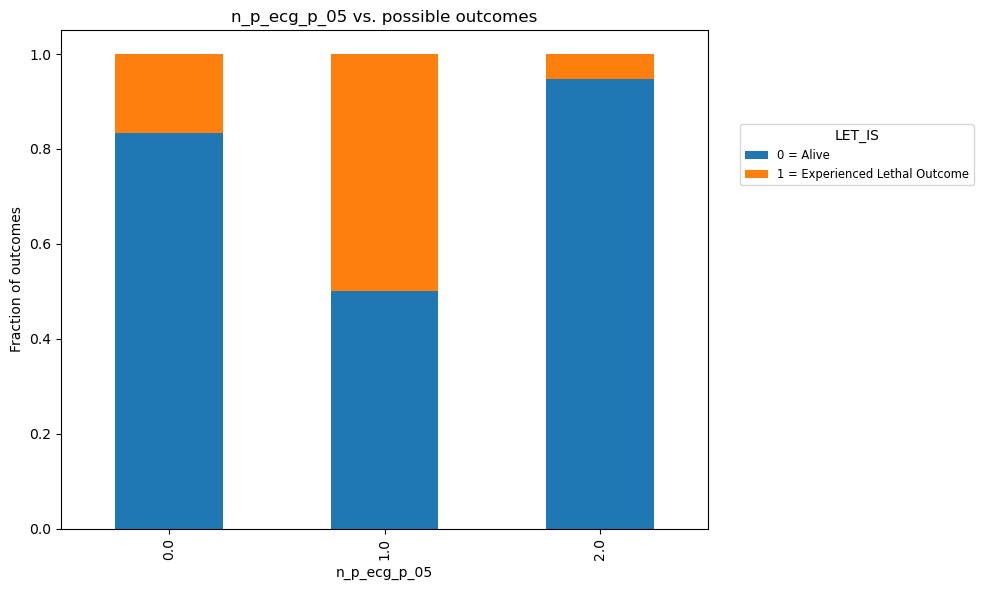

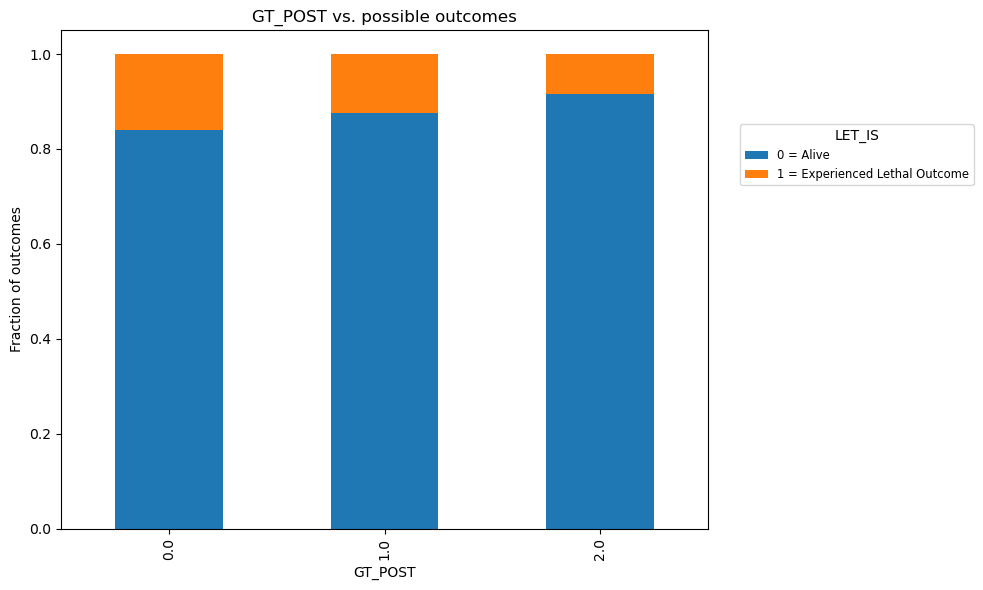

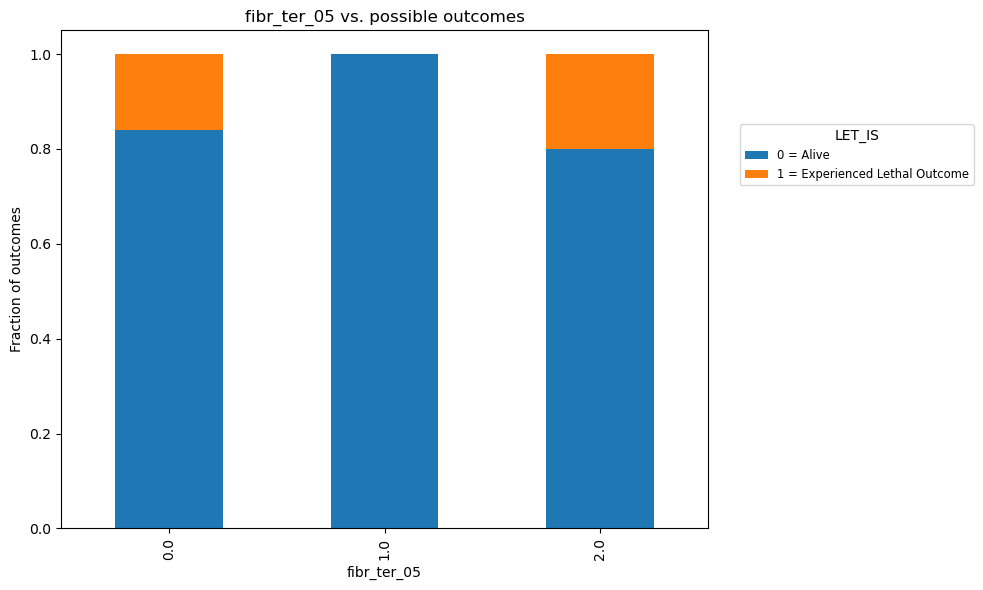

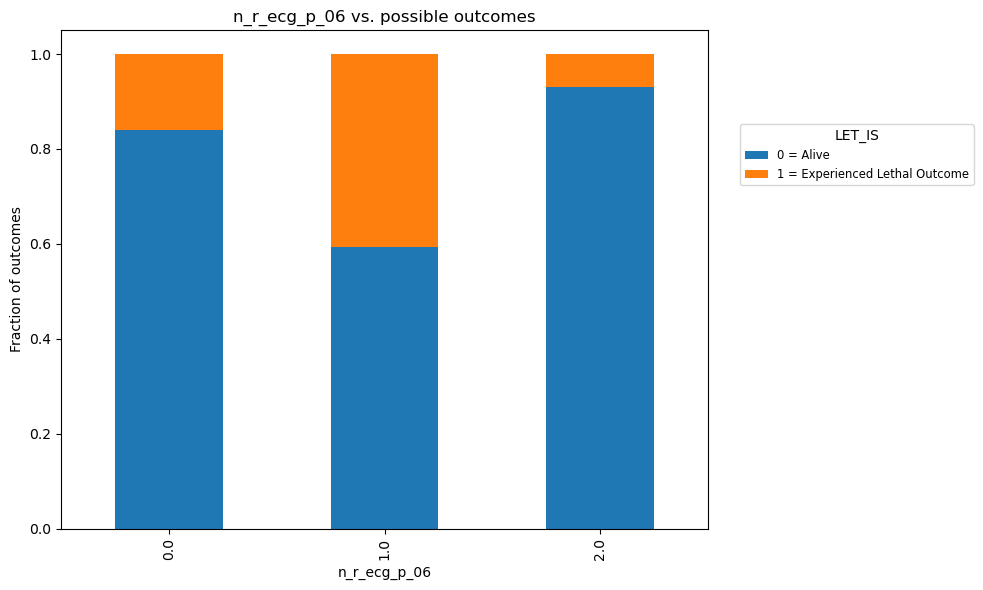

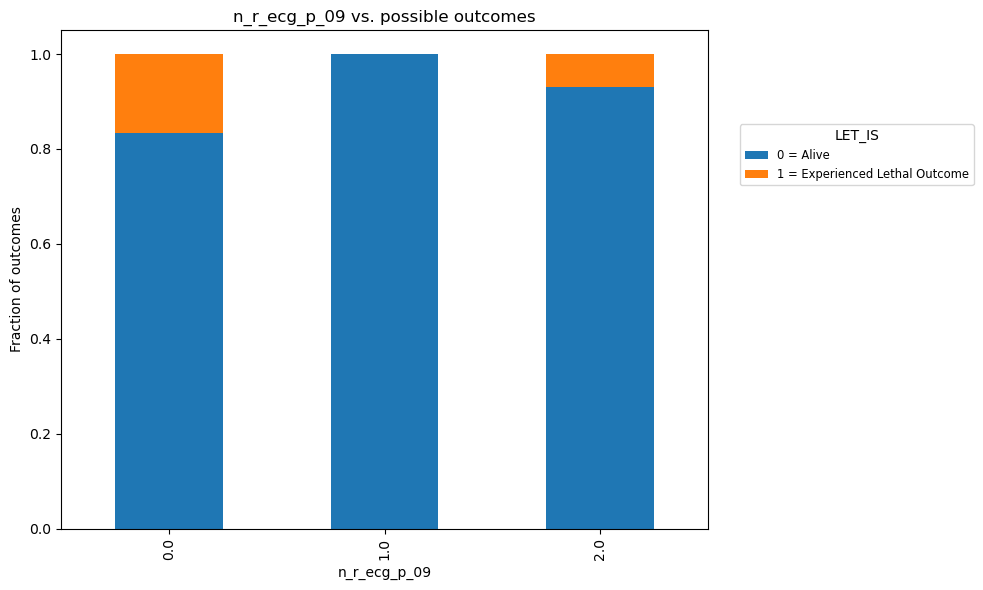

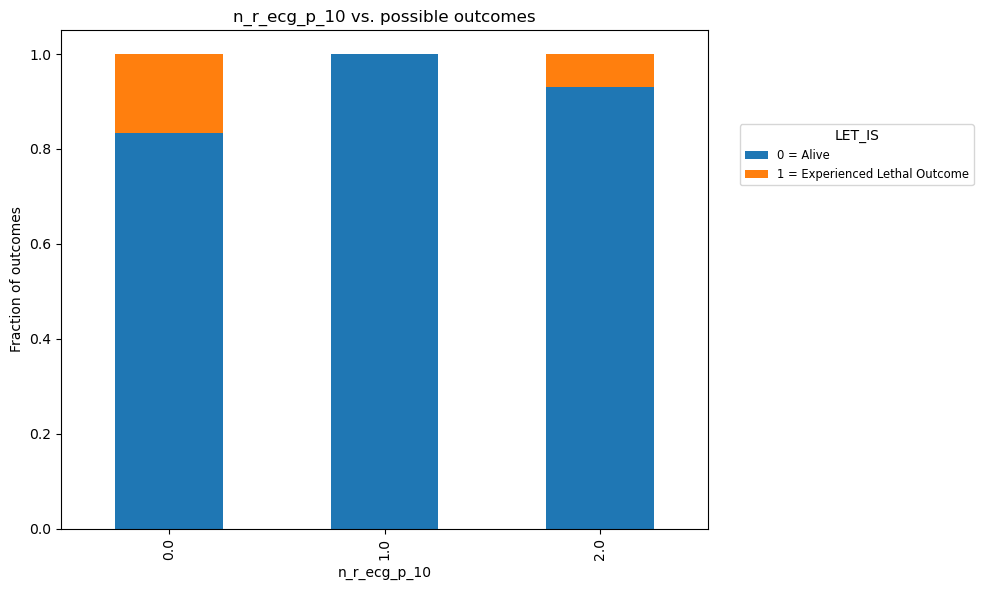

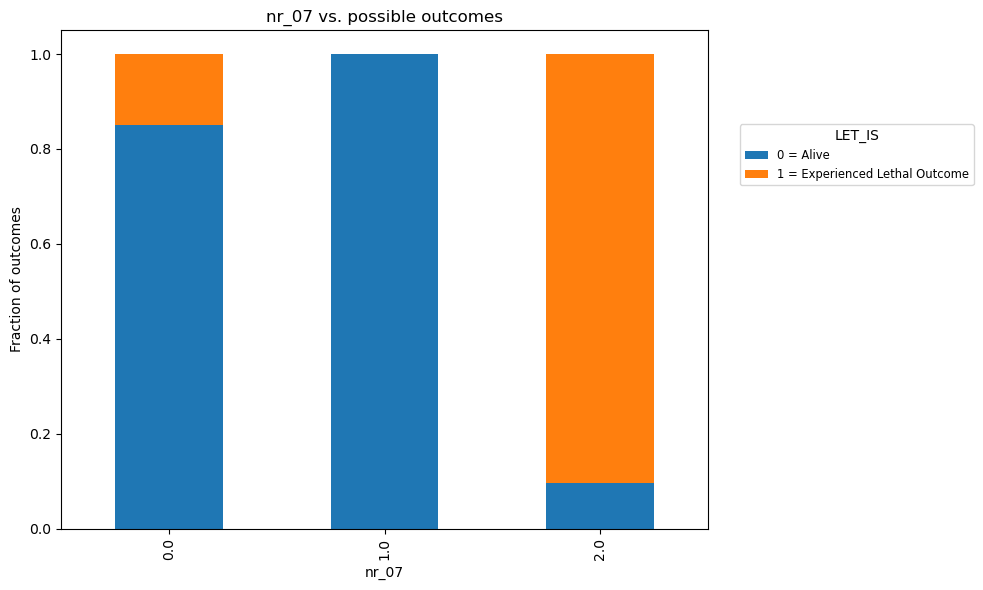

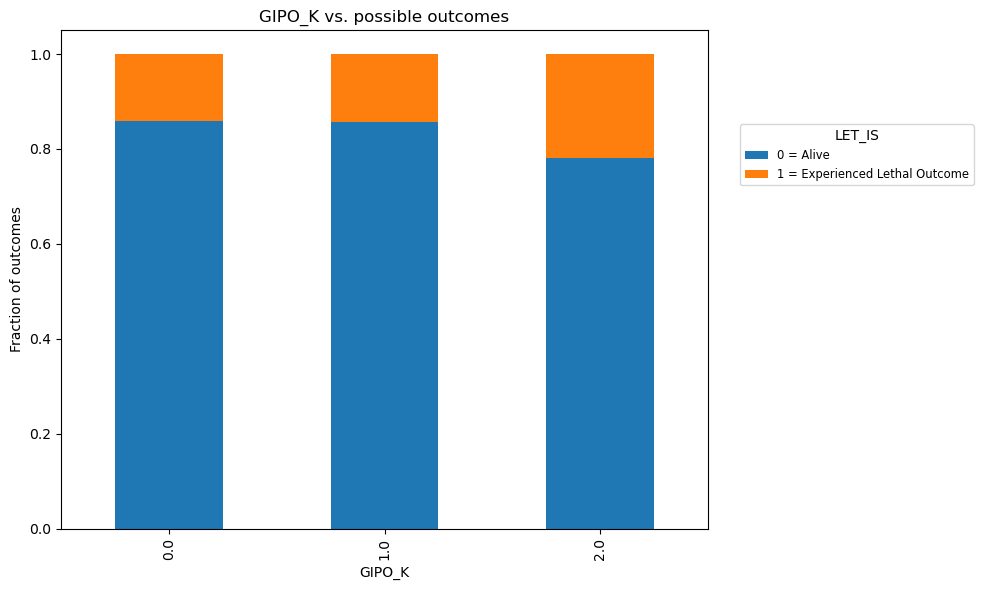

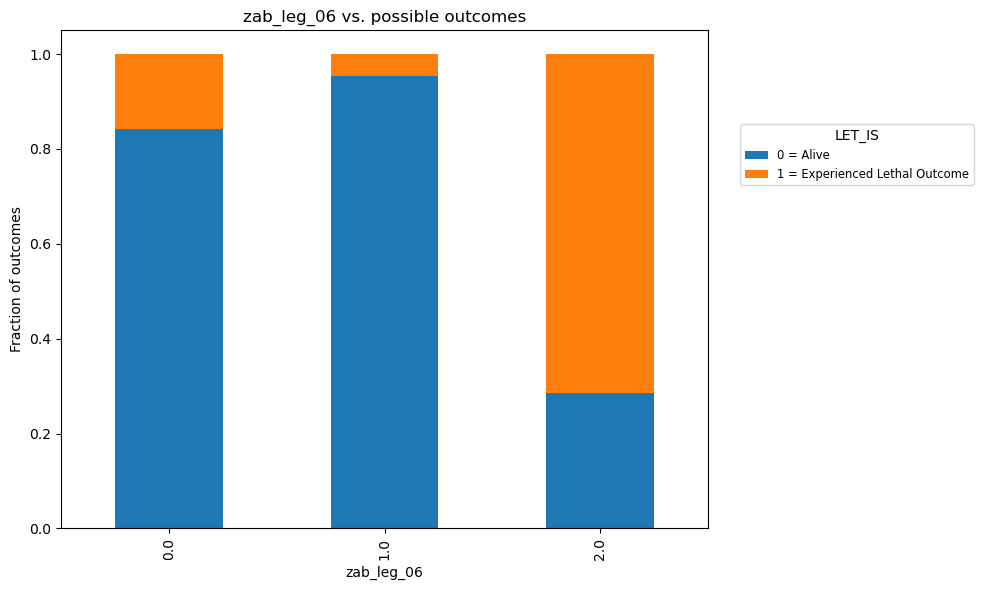

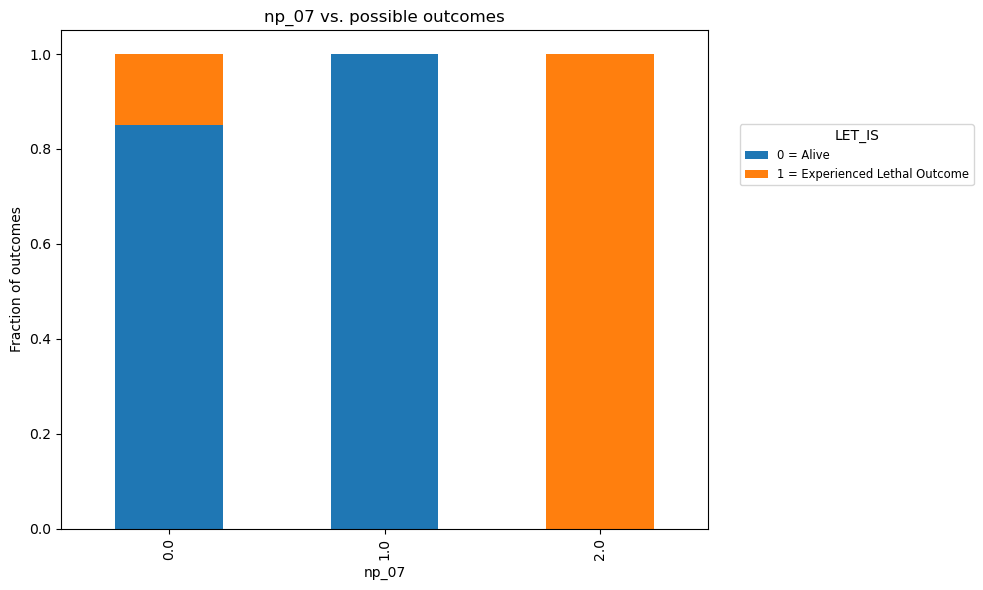

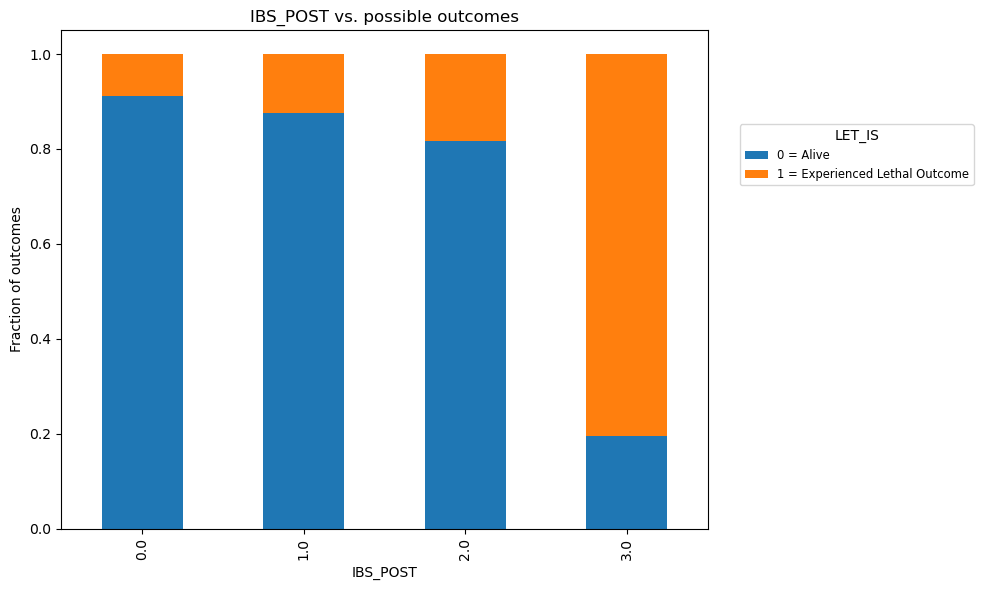

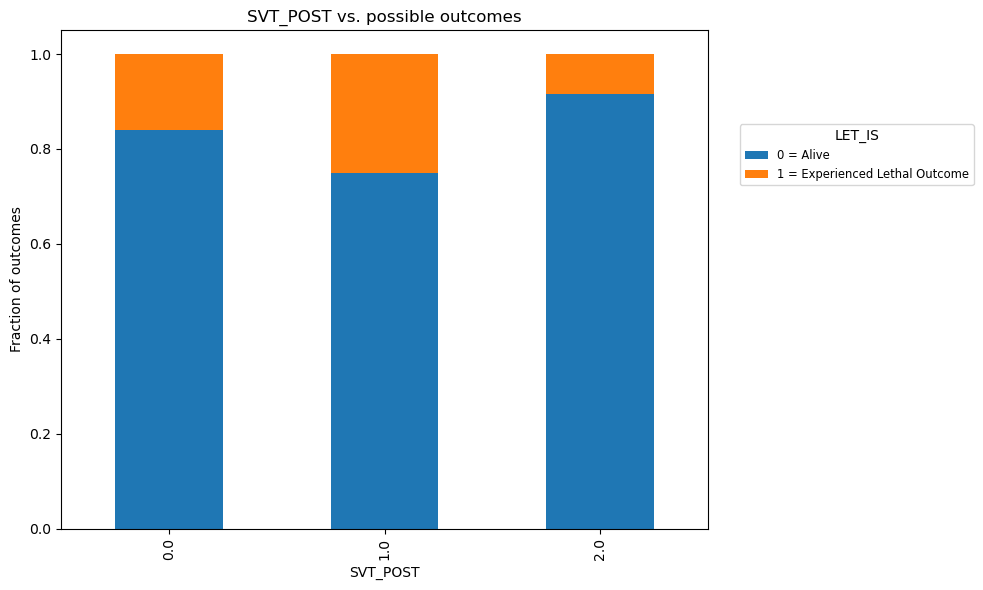

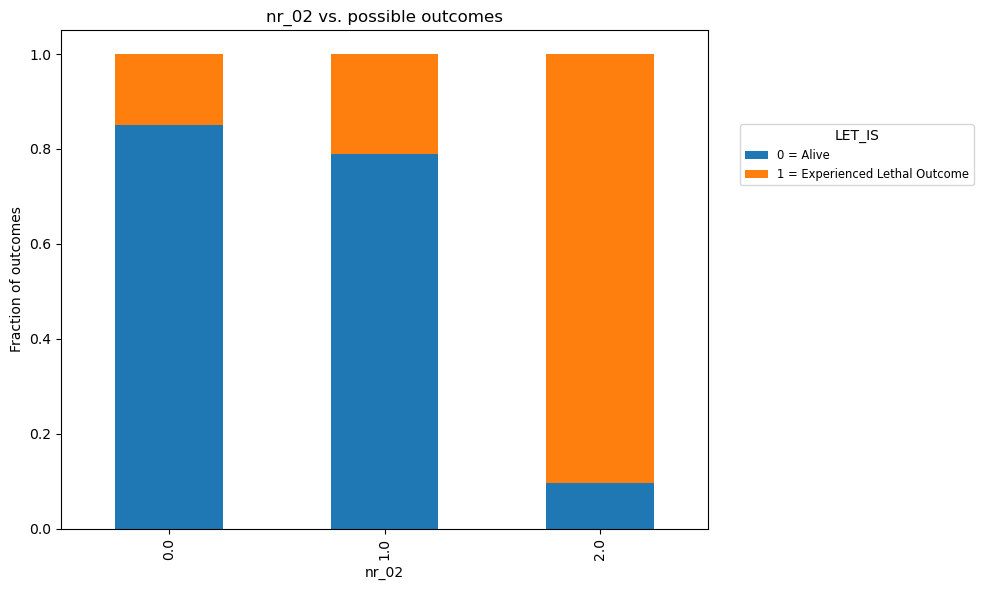

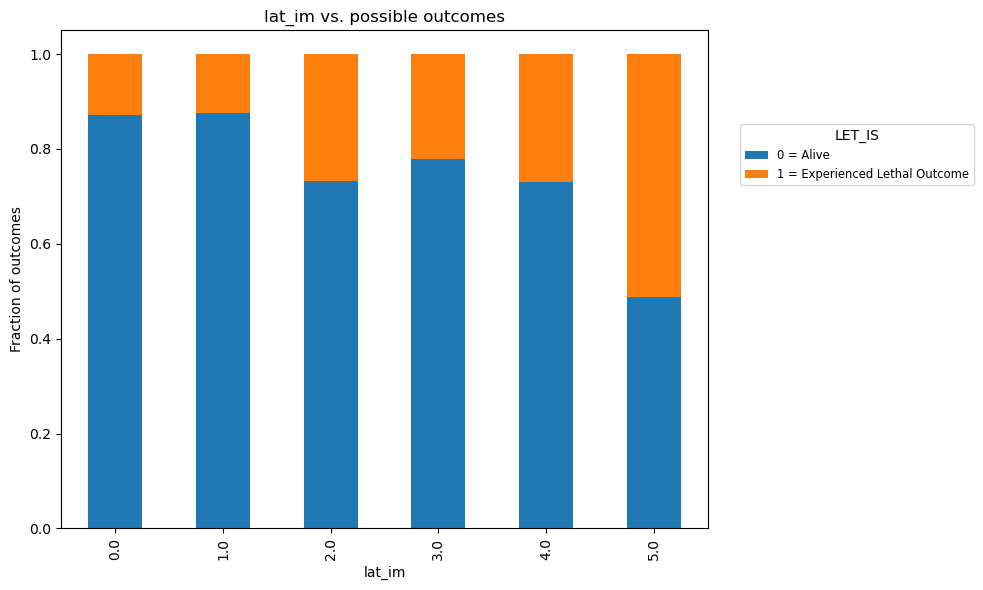

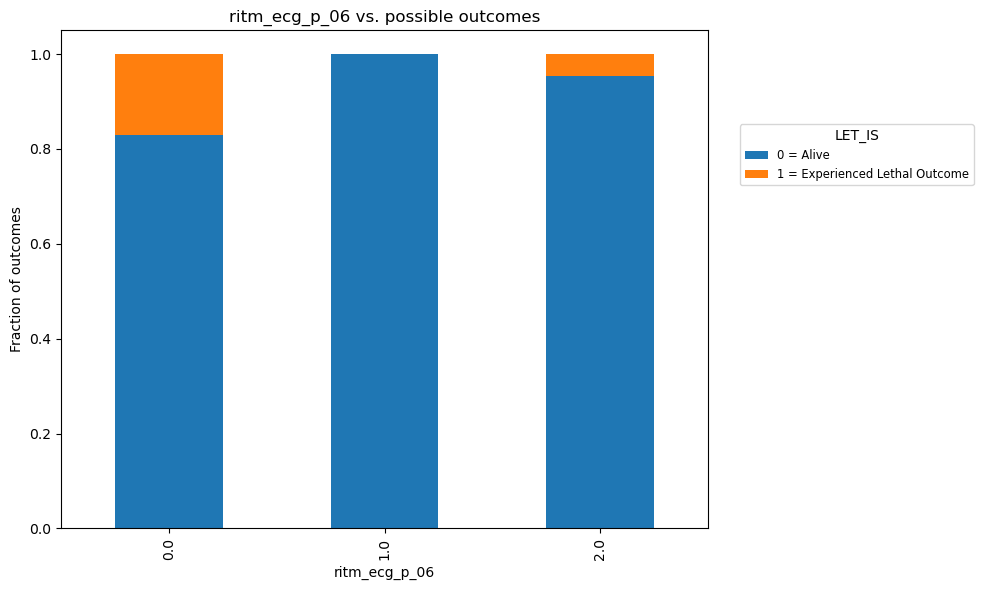

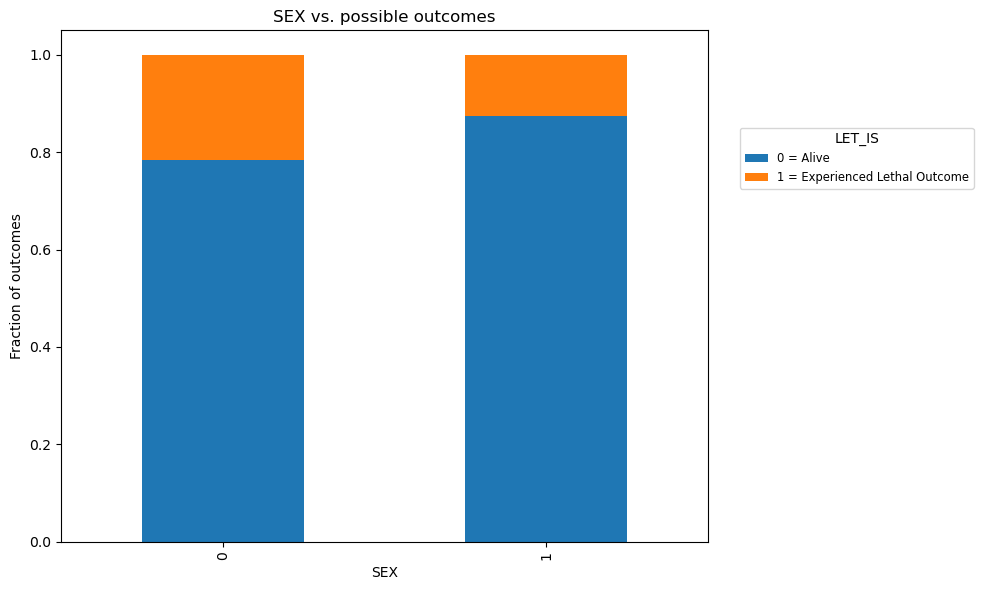

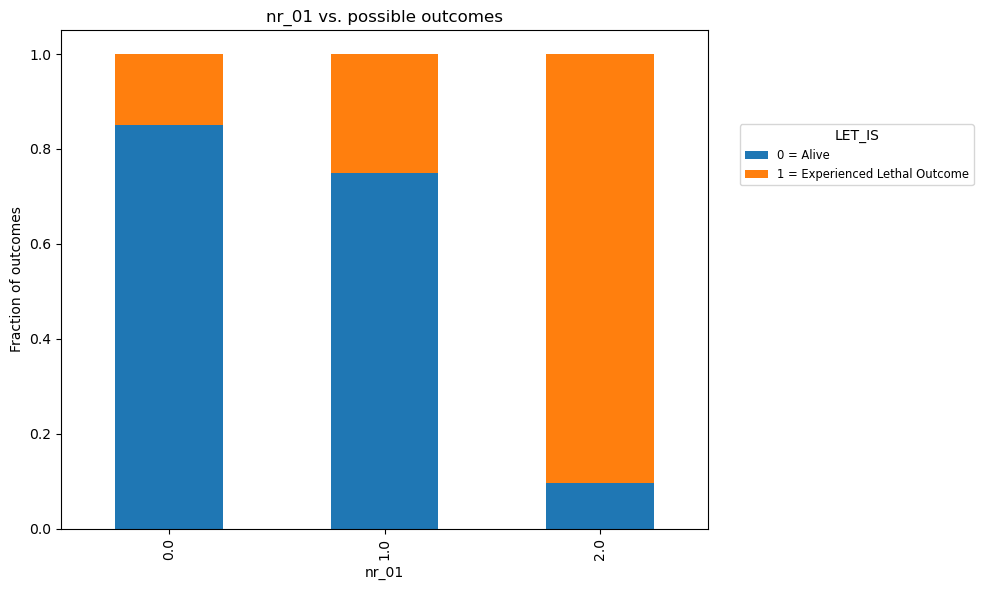

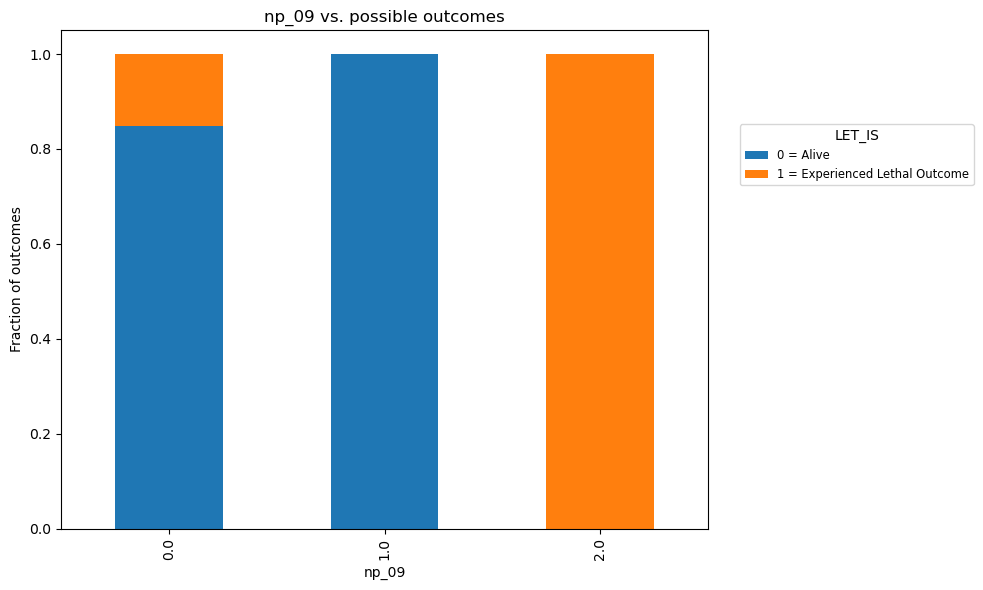

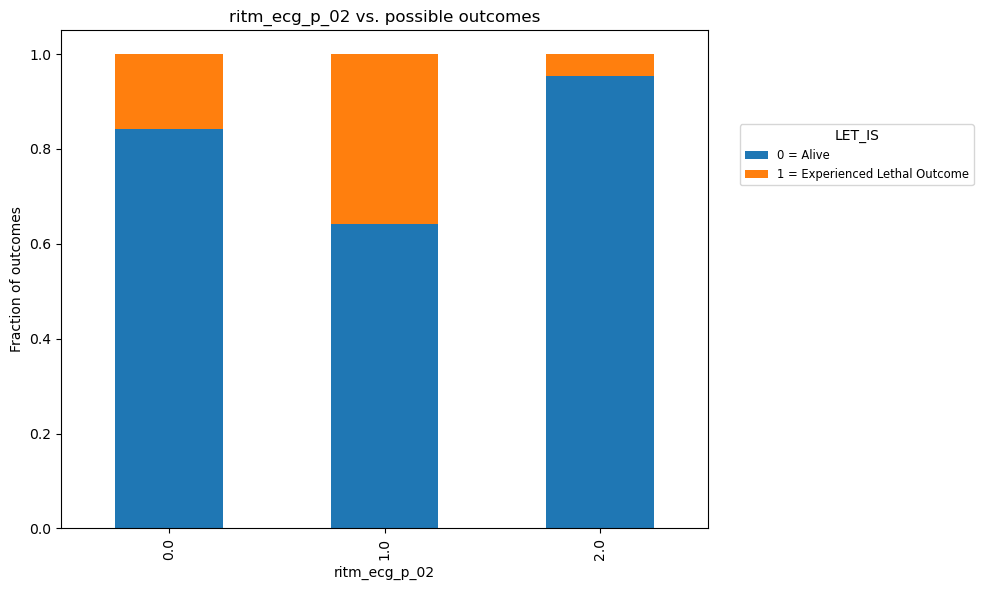

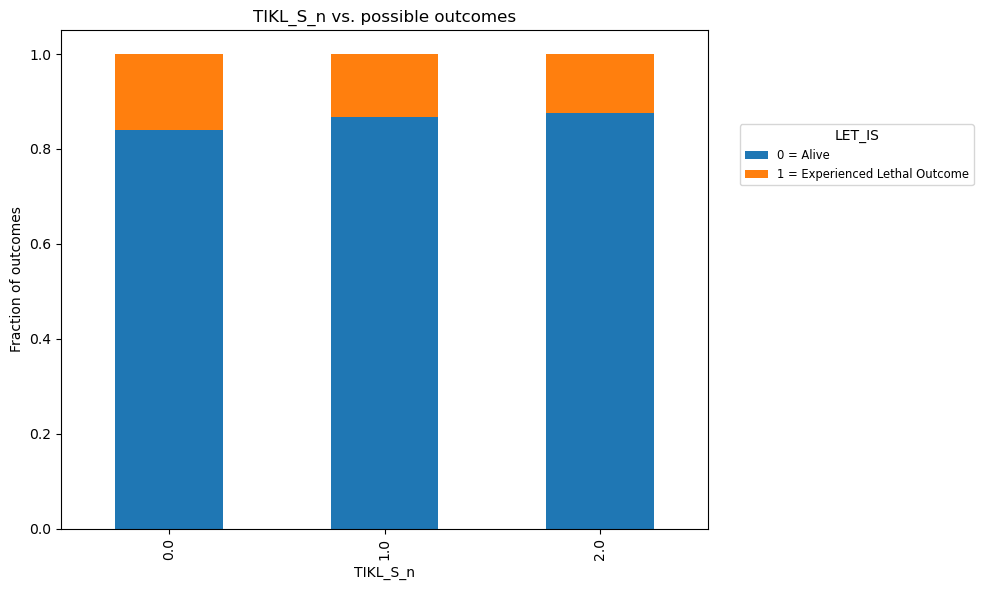

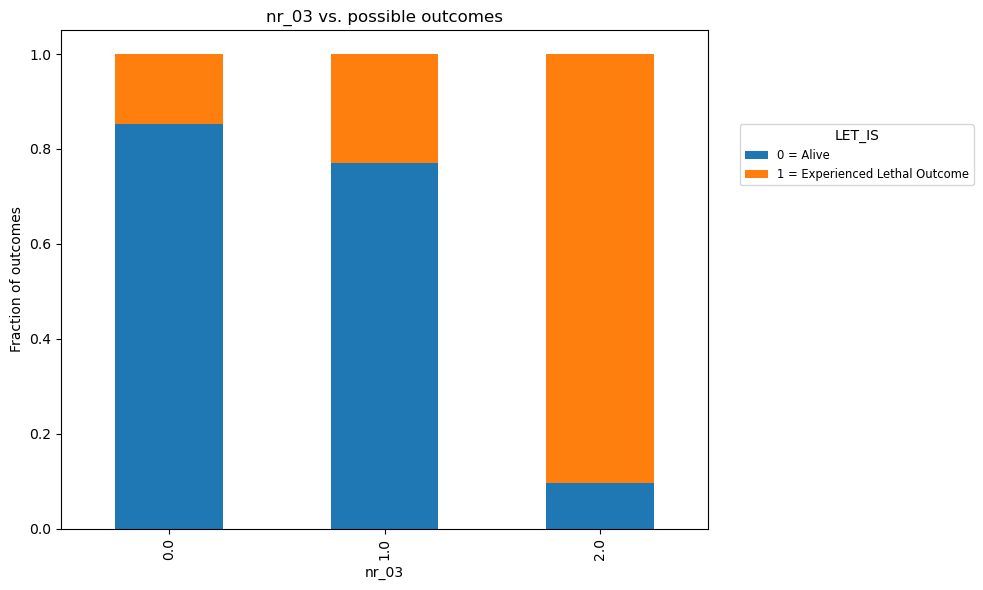

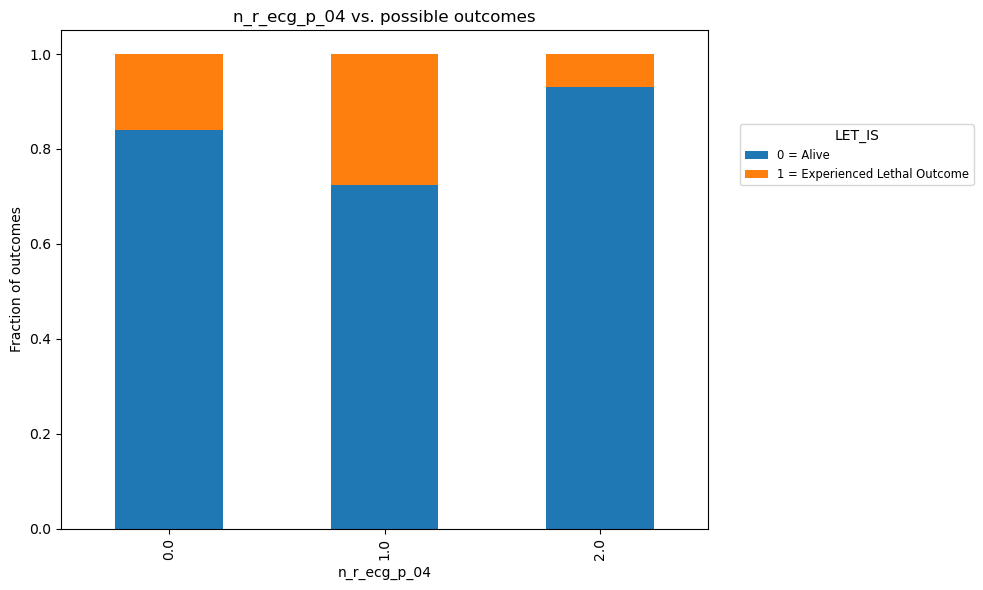

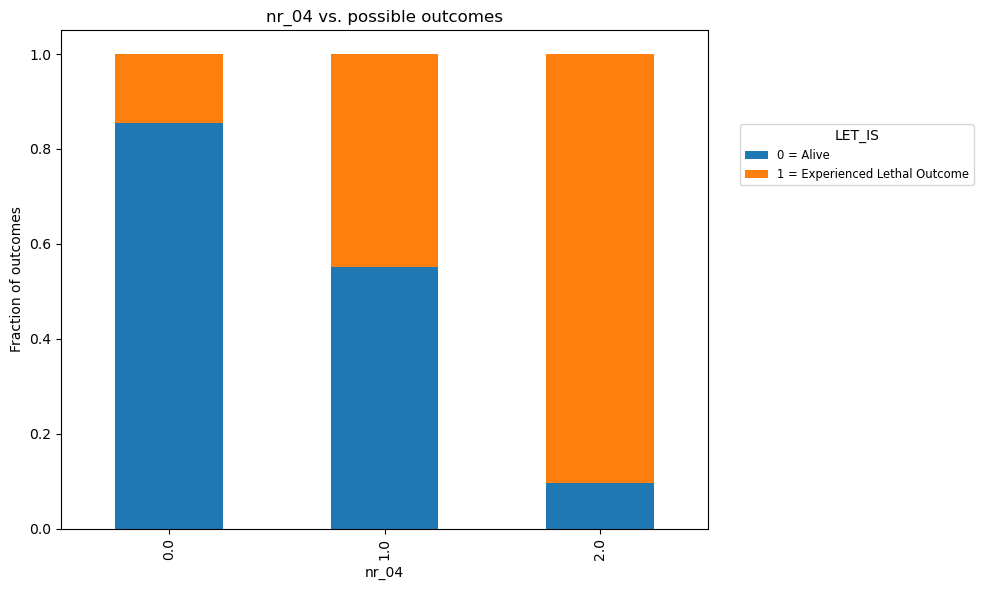

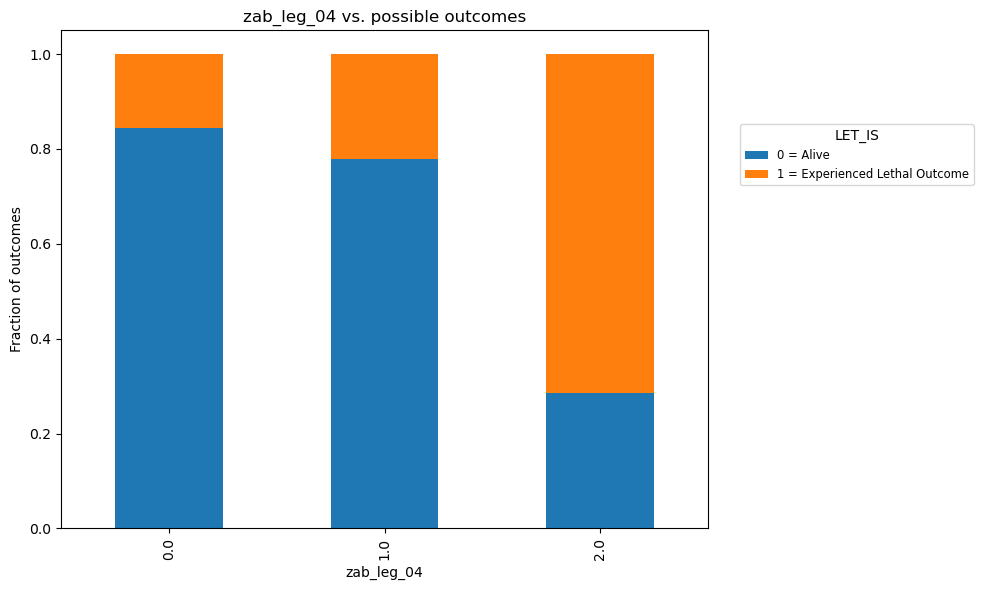

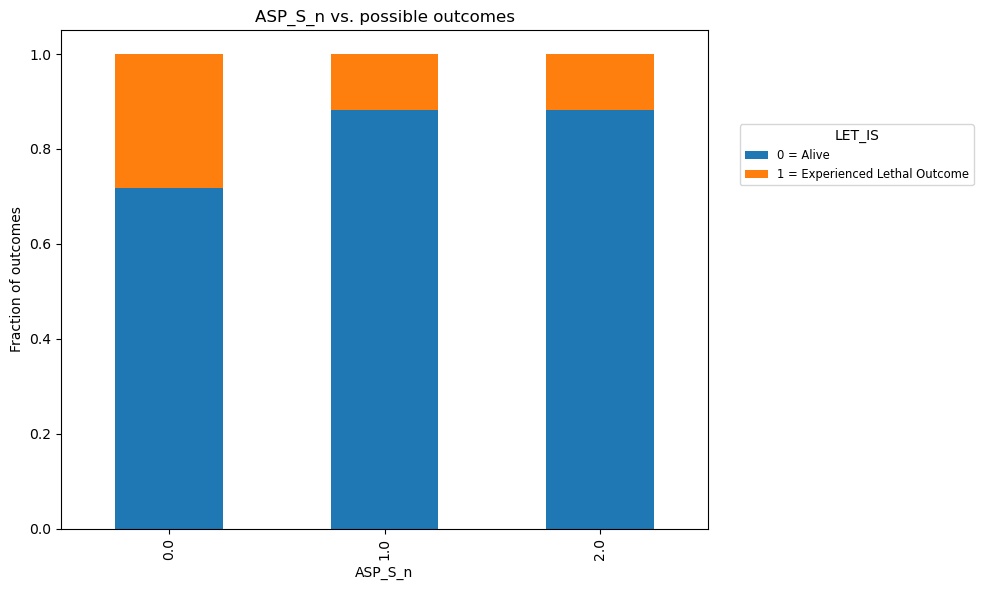

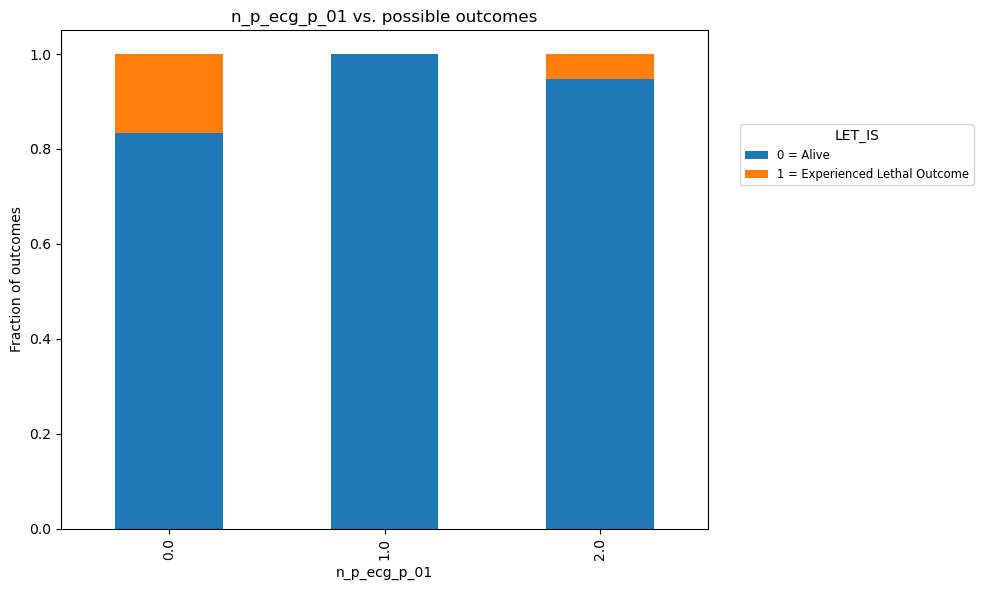

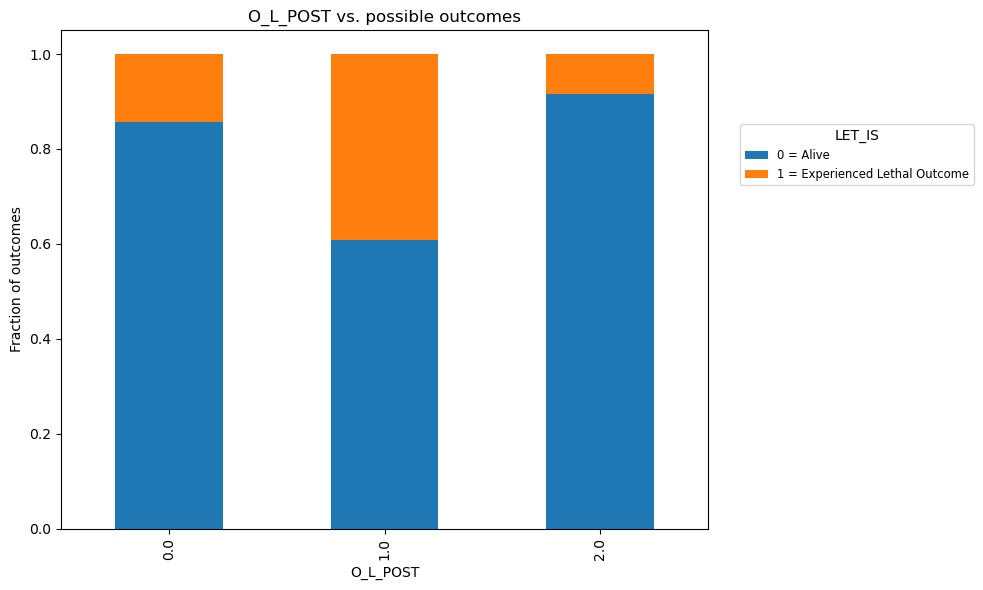



ORDINAL FEATURES


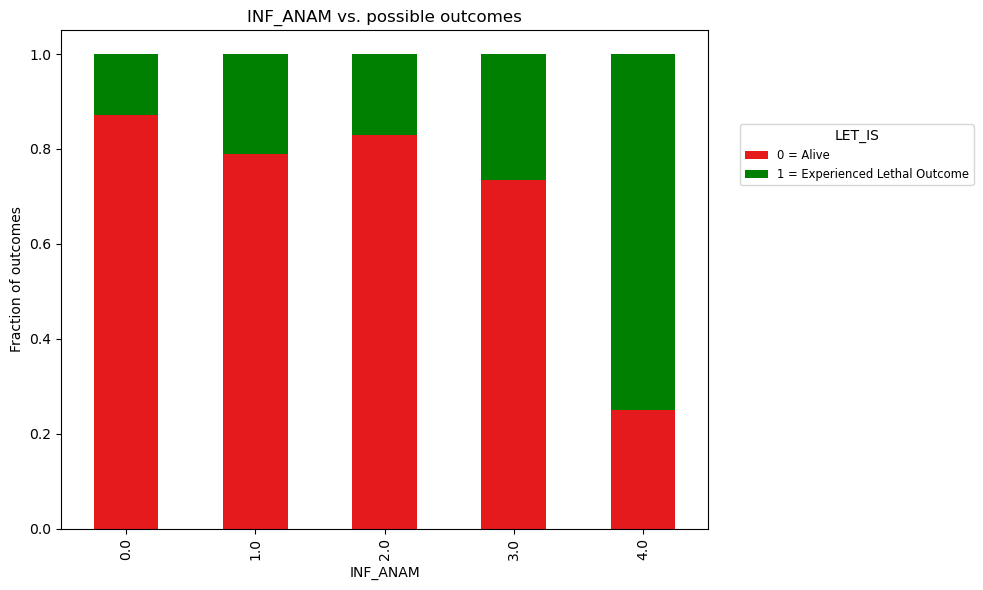

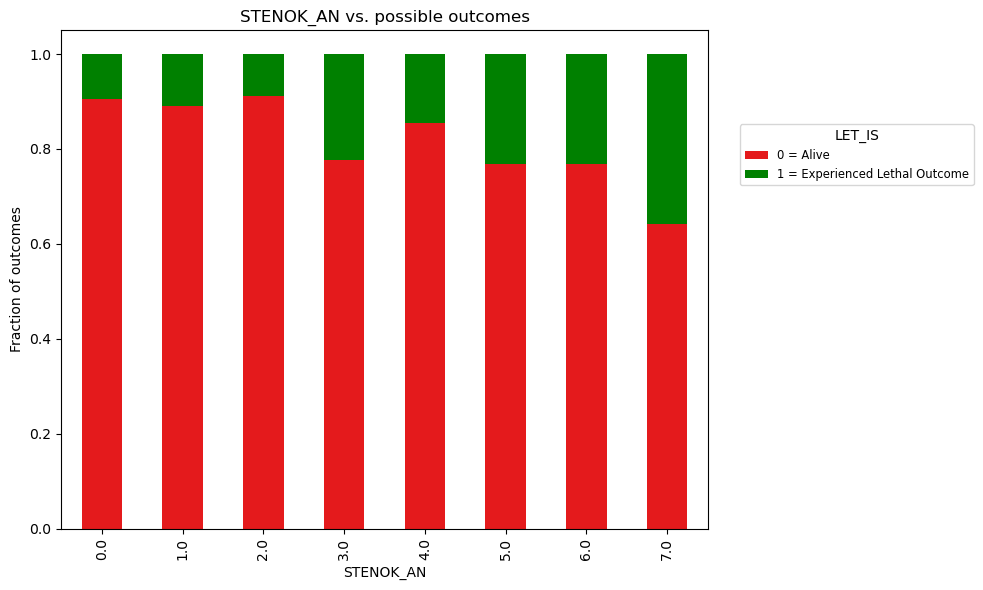

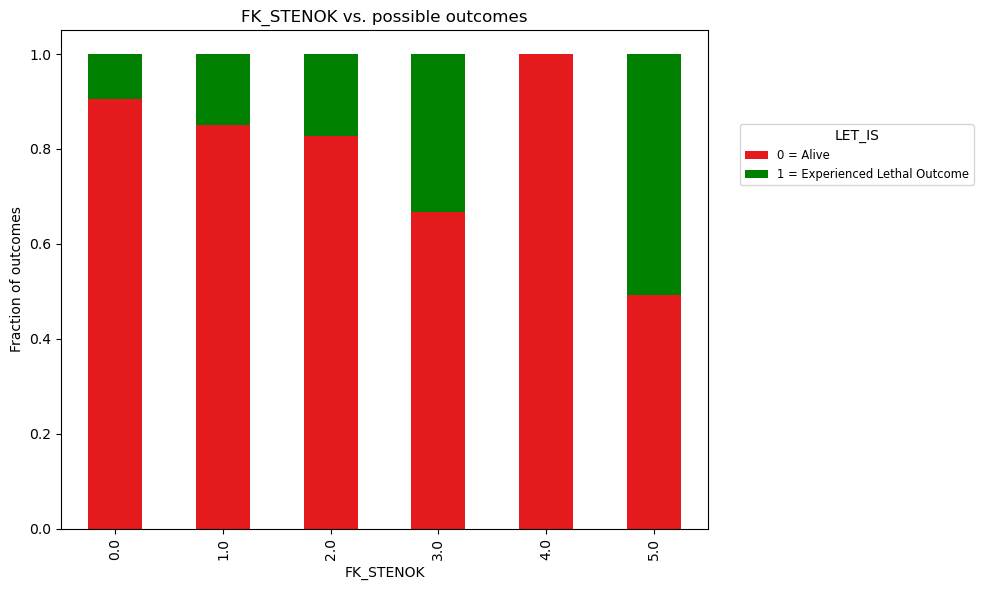

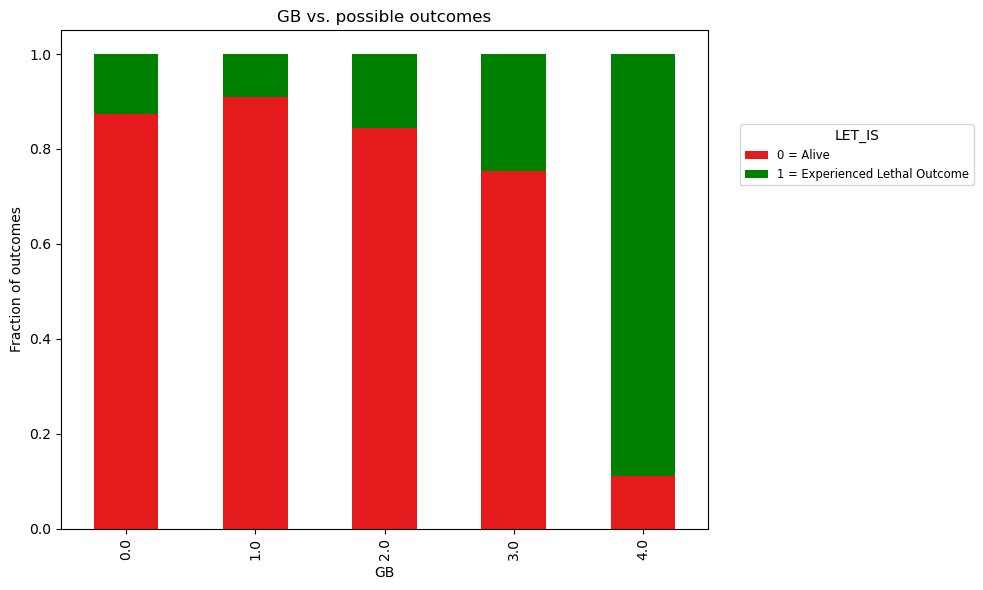

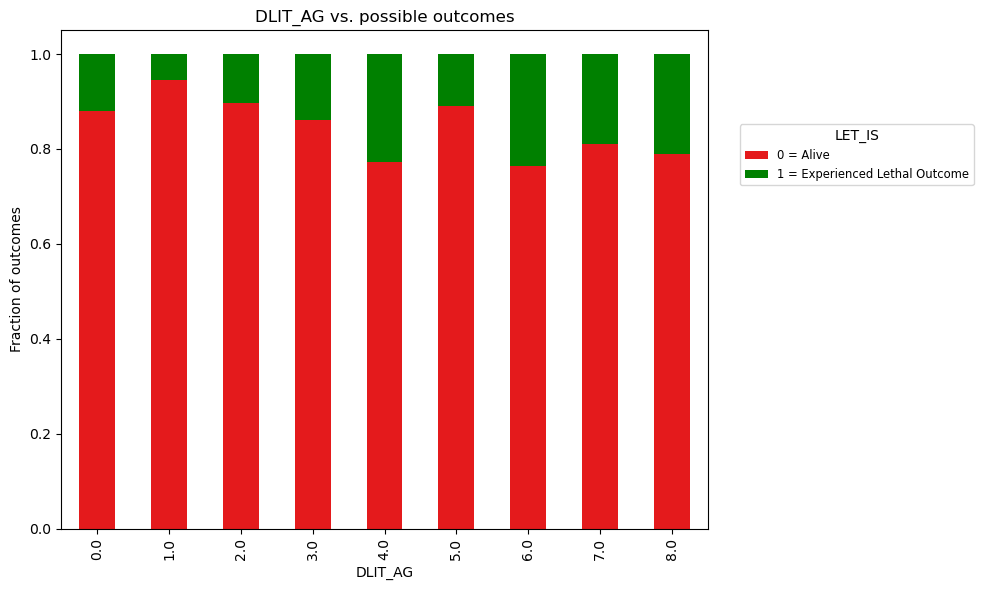

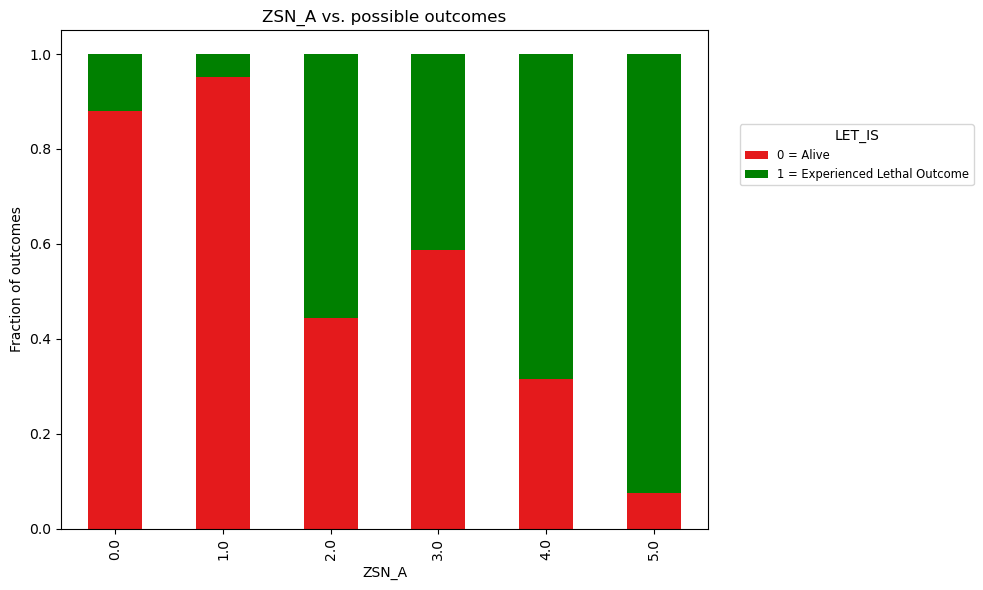

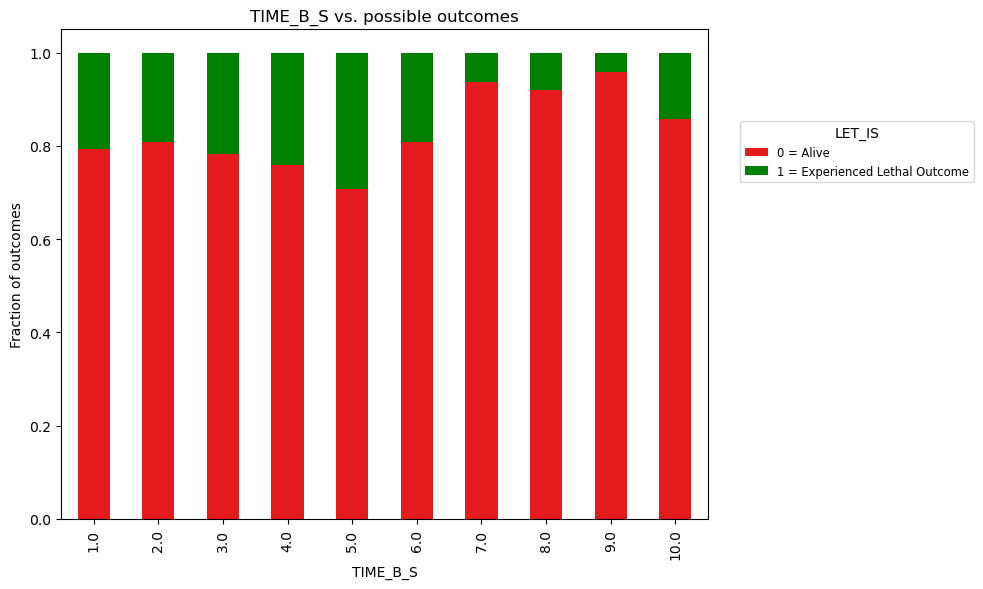

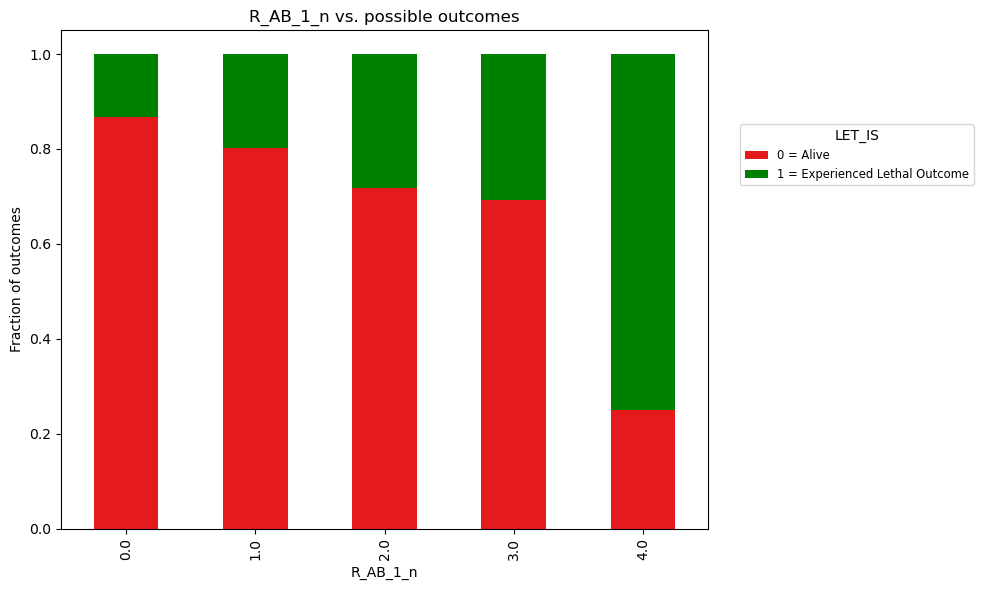

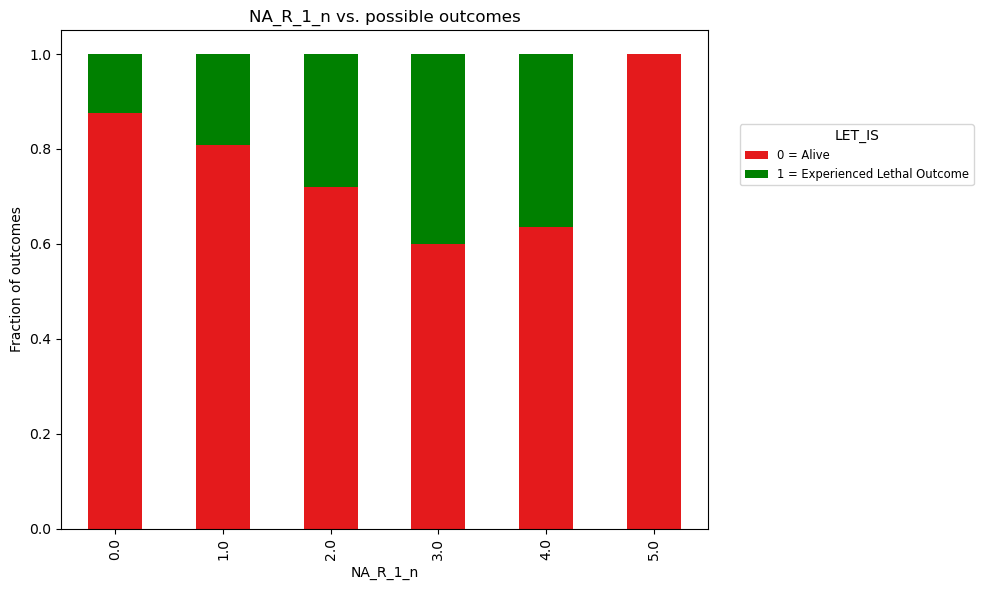

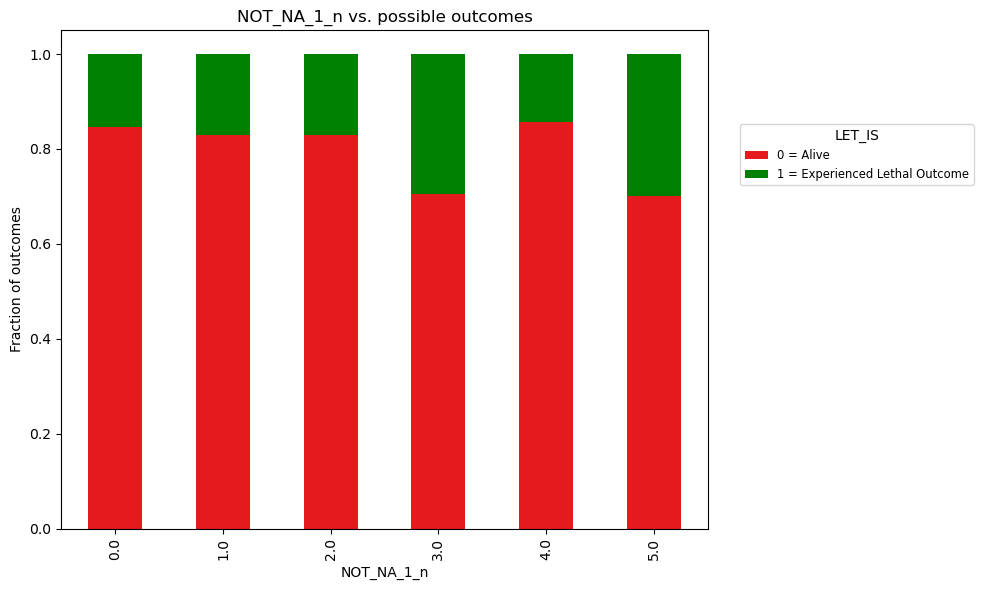

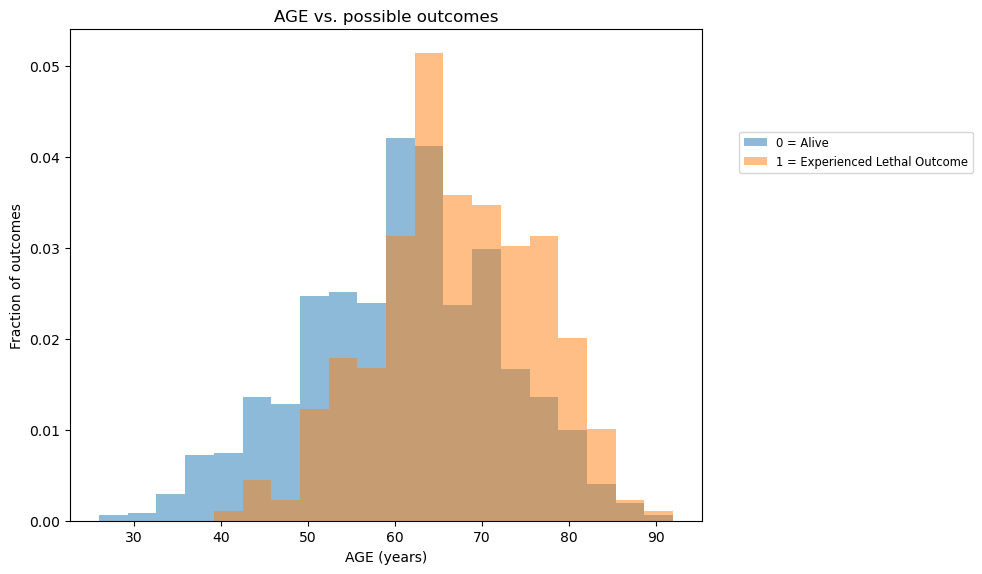

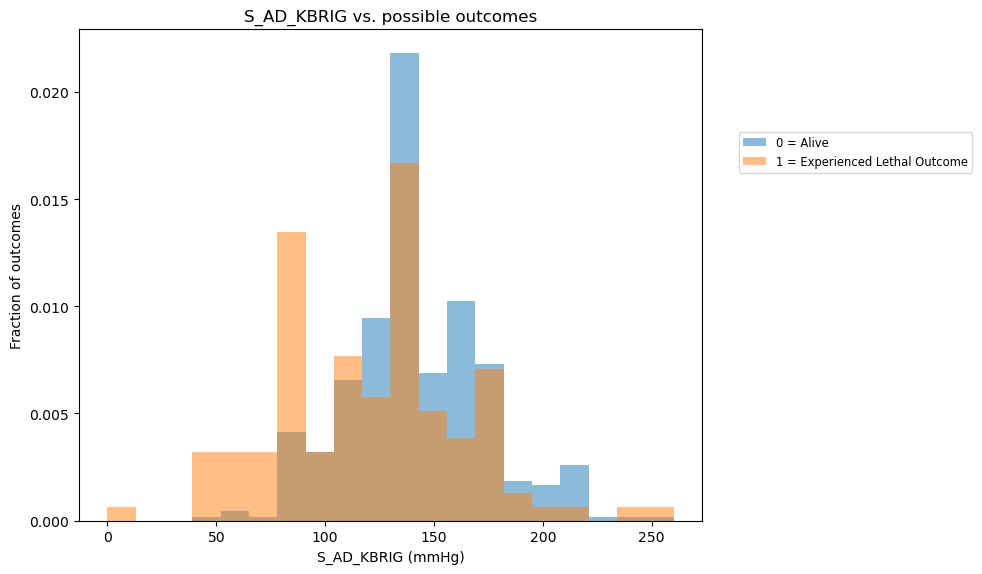

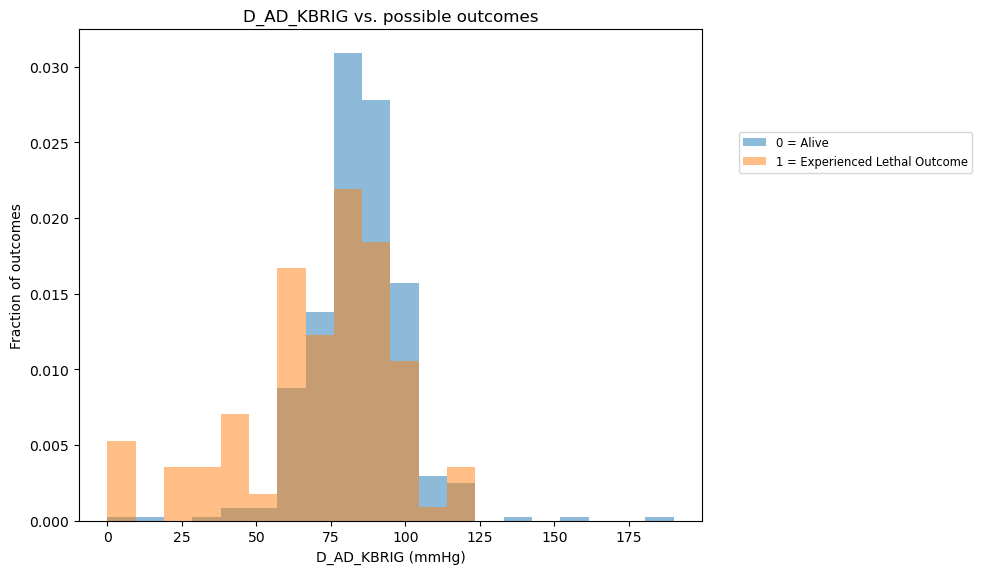

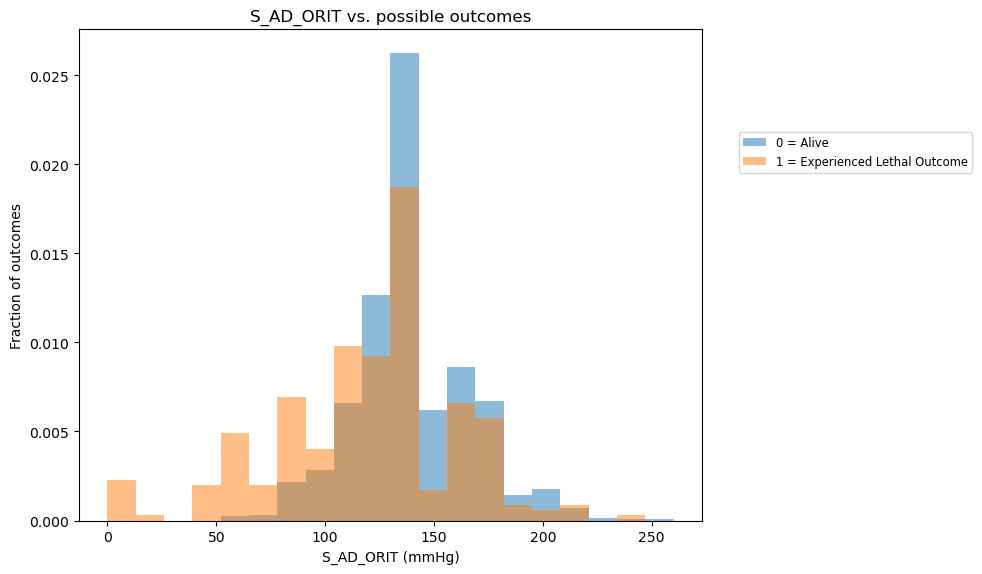

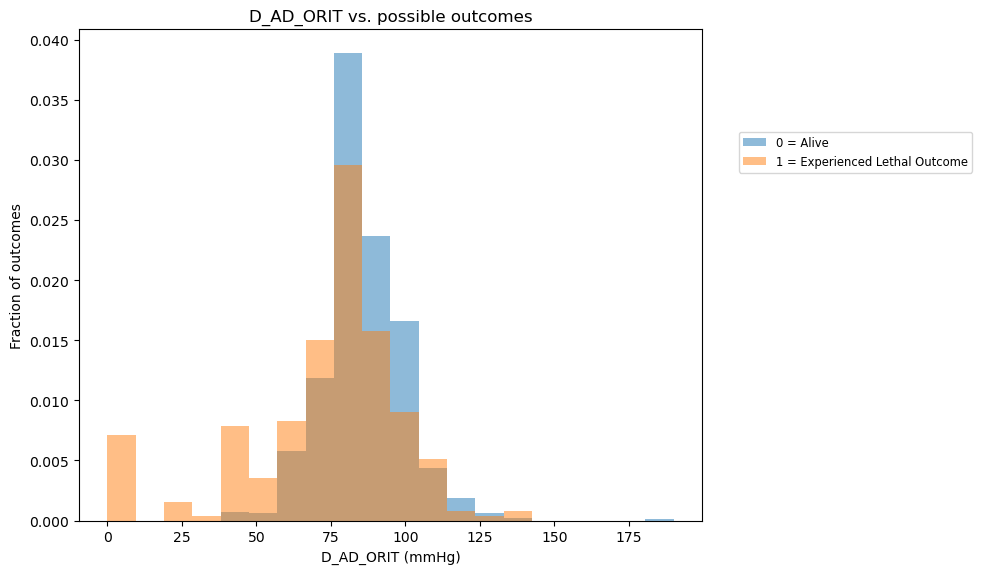

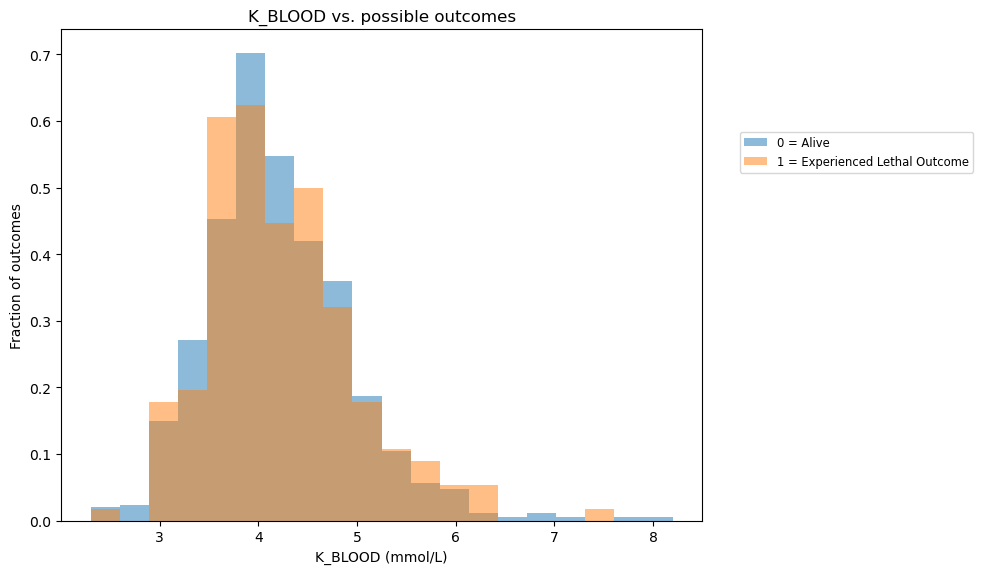

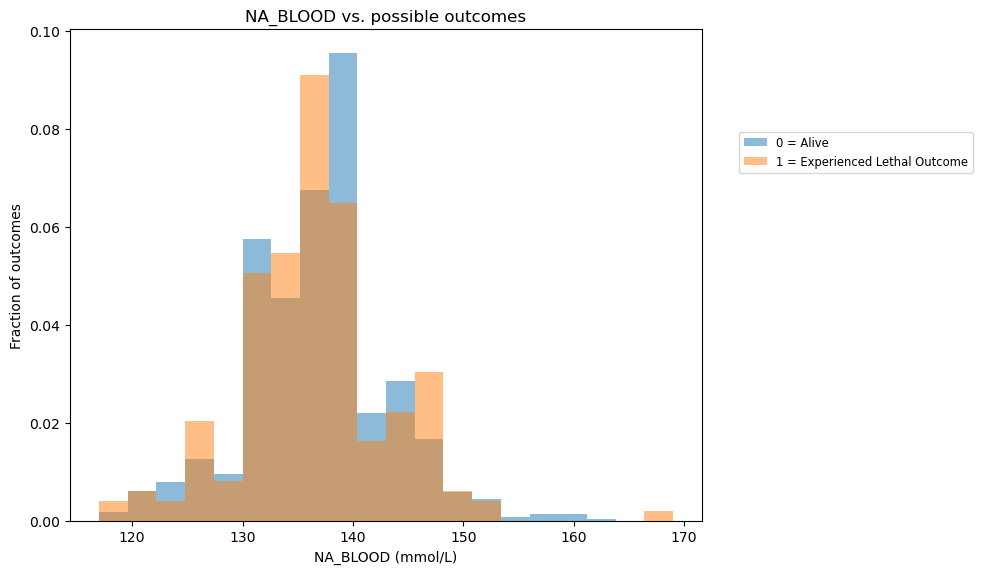

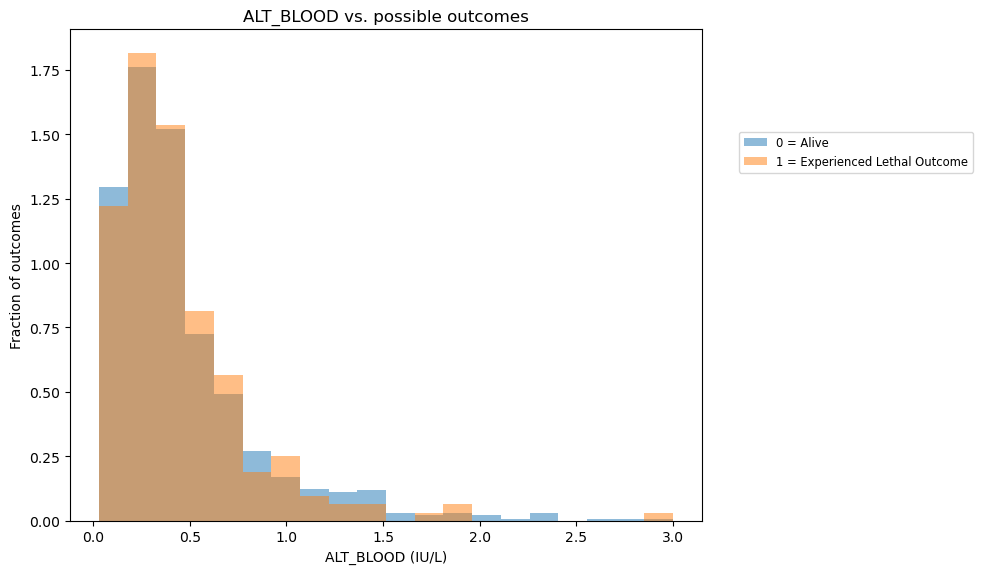

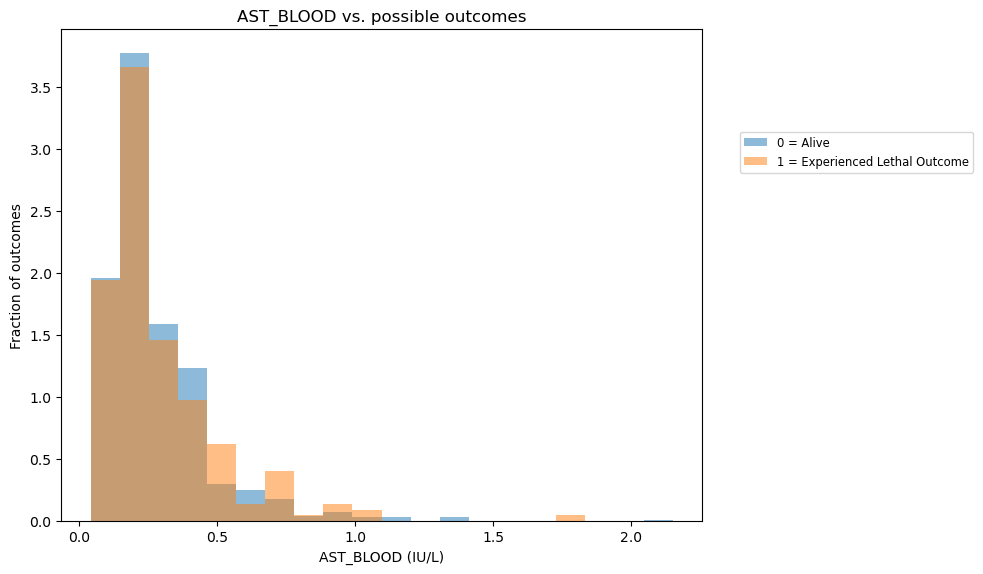

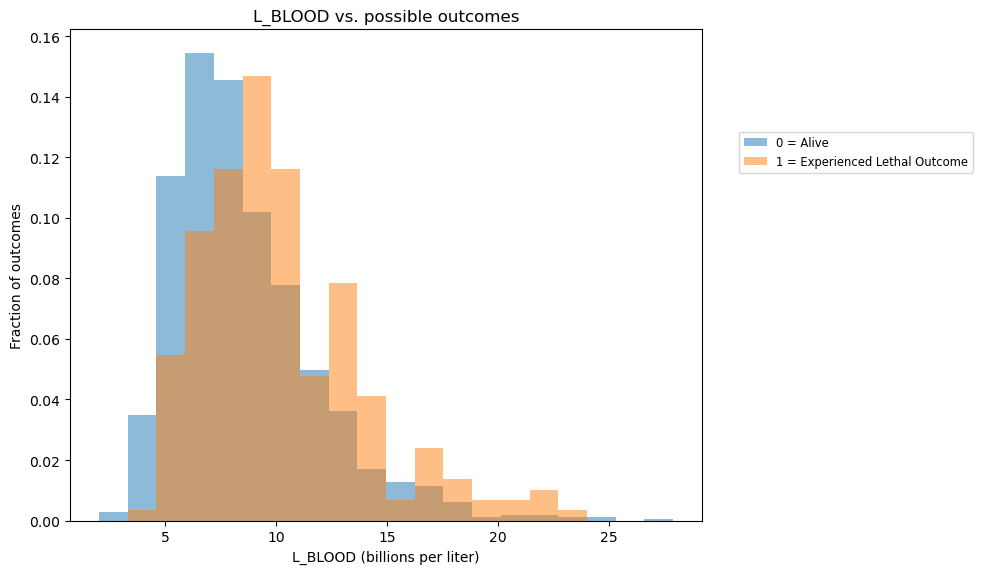

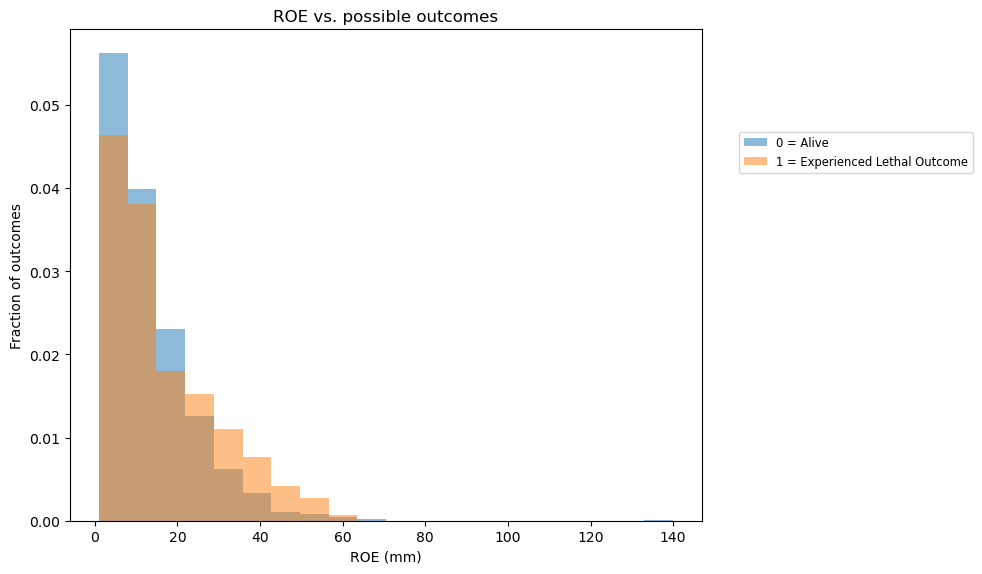

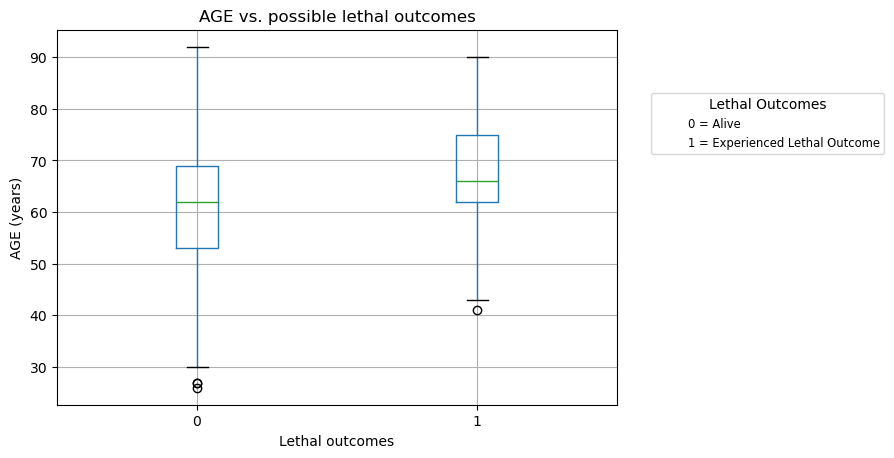

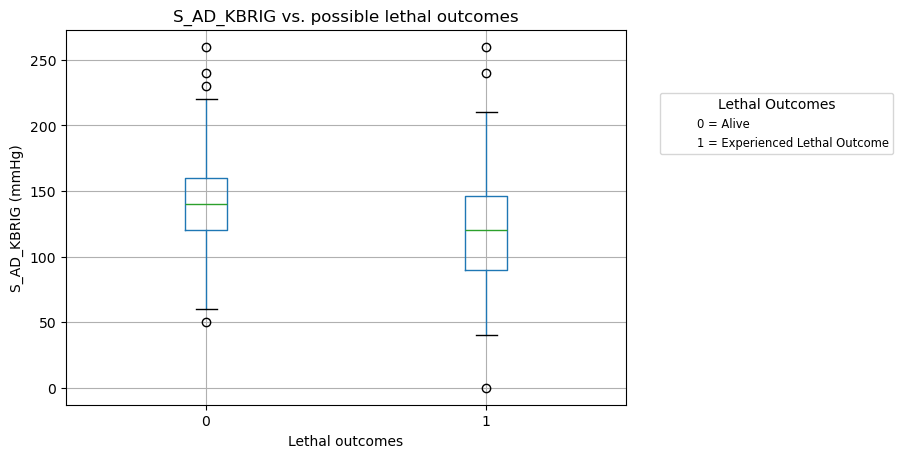

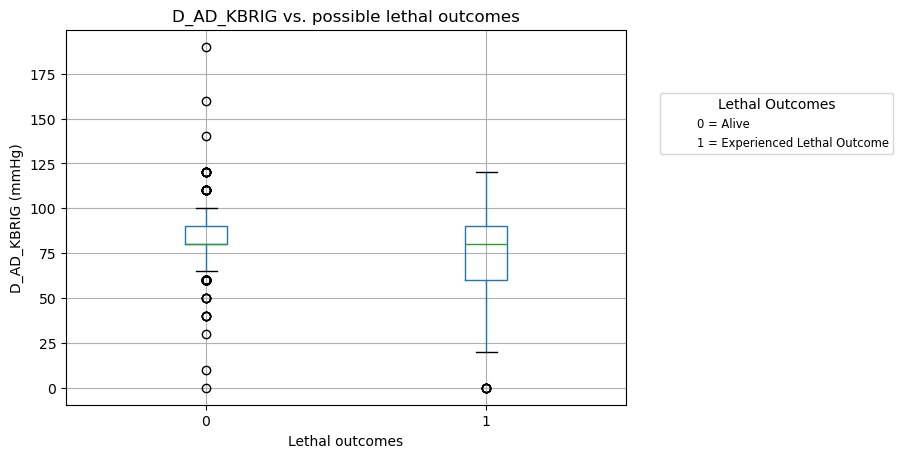

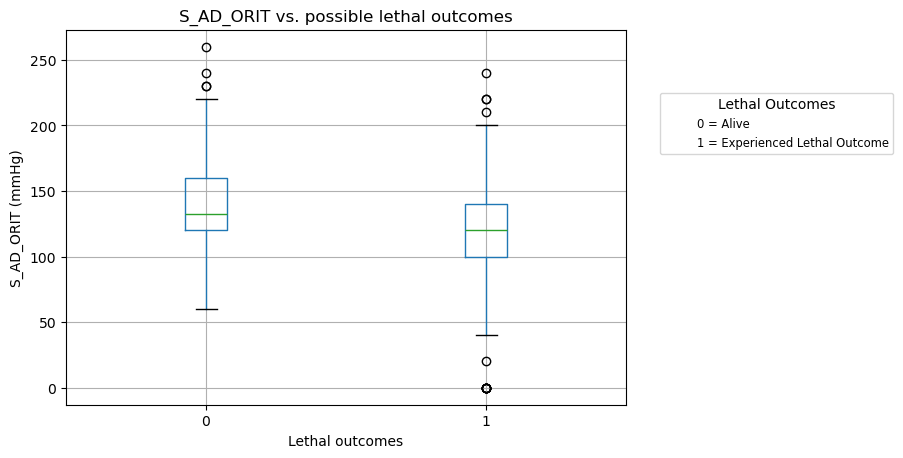

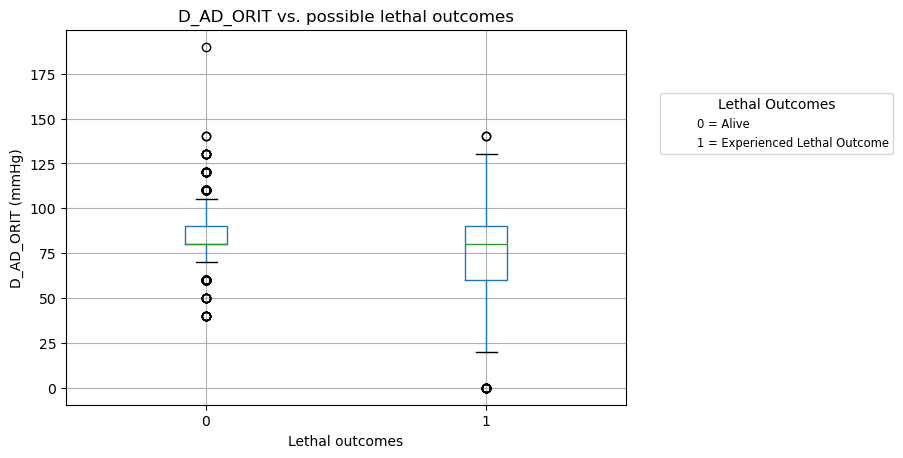

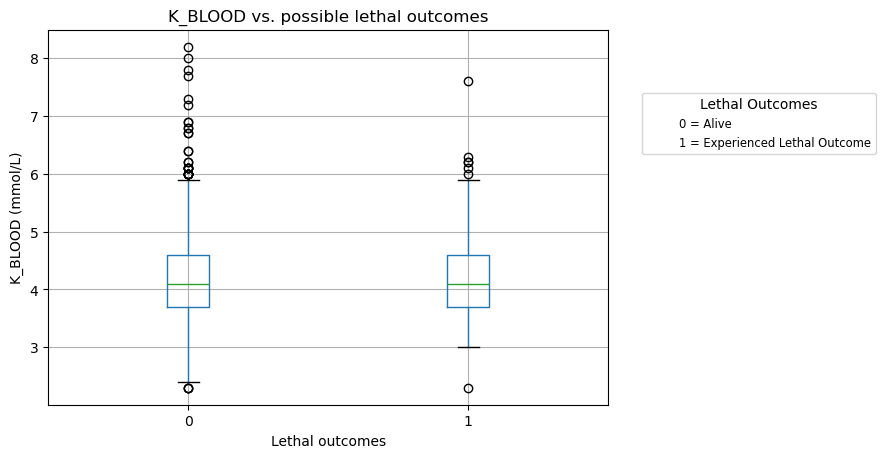

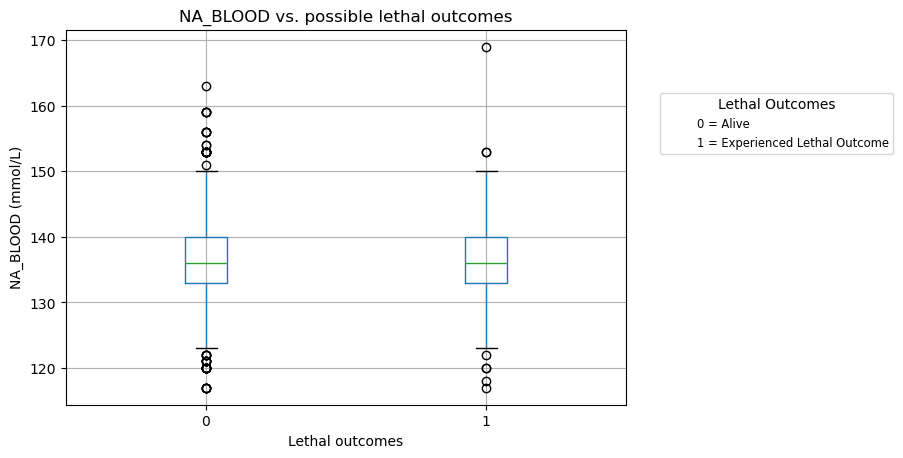

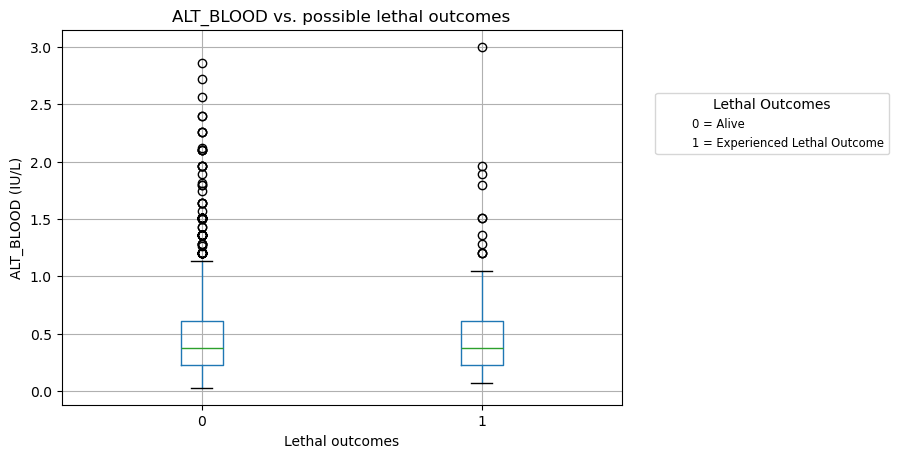

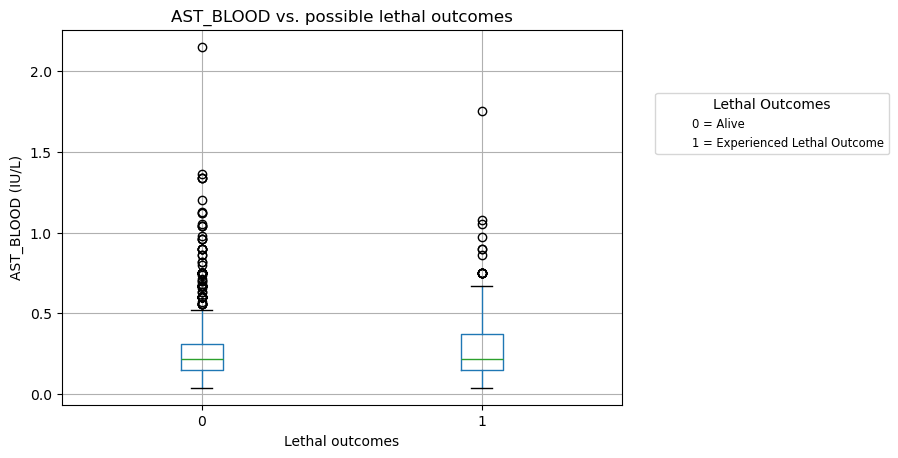

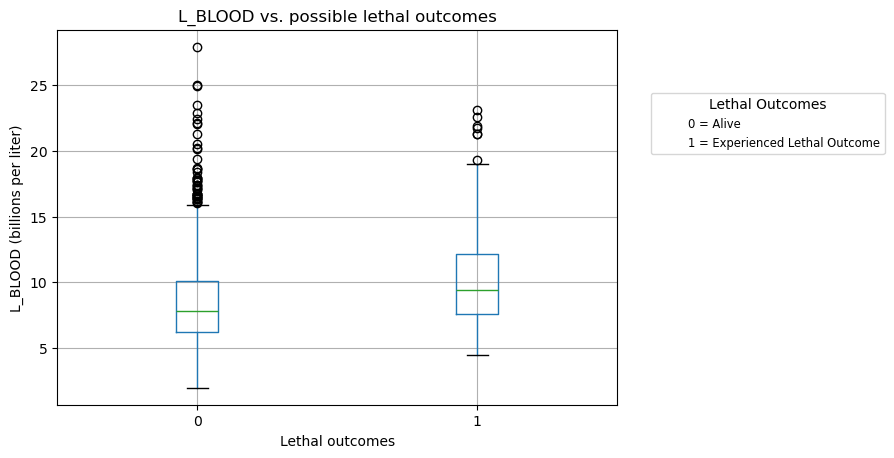

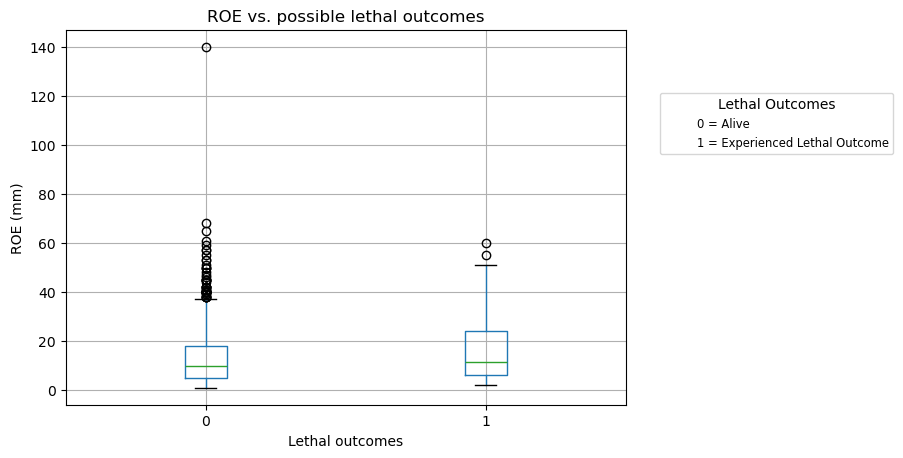

In [178]:
# Fill in with new "unknown" categories represented by an unused integer for the categorical data
add_2_as_unknown = [
    'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08',
    'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01',
    'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
    'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
    'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
    'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
    'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
    'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
    'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
    'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
    'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n',
    'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n',
    'TRENT_S_n'
]
add_3_as_unknown = ['IBS_POST']
add_4_as_unknown = ['INF_ANAM', 'GB', 'R_AB_1_n']
add_5_as_unknown = ['FK_STENOK', 'ZSN_A', 'NA_R_1_n', 'NOT_NA_1_n', 'ant_im', 'lat_im', 'inf_im', 'post_im']
add_7_as_unknown = ['STENOK_AN']
add_8_as_unknown = ['DLIT_AG']
add_10_as_unknown = ['TIME_B_S']

df[add_2_as_unknown] = df[add_2_as_unknown].fillna(2)
df[add_3_as_unknown] = df[add_3_as_unknown].fillna(3)
df[add_4_as_unknown] = df[add_4_as_unknown].fillna(4)
df[add_5_as_unknown] = df[add_5_as_unknown].fillna(5)
df[add_7_as_unknown] = df[add_7_as_unknown].fillna(7)
df[add_8_as_unknown] = df[add_8_as_unknown].fillna(8)
df[add_10_as_unknown] = df[add_10_as_unknown].fillna(10)

missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
# print("Missing values percentage per column:")
# print(missing_percentage_sorted)

# HANDLED ALL MISSING VALUES except continuous
df_whole = df.copy()
df_whole['LET_IS'] = y_binary
y = df_whole['LET_IS']
X = df_whole.drop(columns=['LET_IS'])
categories = y.unique()
print(X.shape)
all_features = X.columns.tolist()
continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']
ordinal_features = [
    'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 
    'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n'
]
units = ['years', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmol/L', 'mmol/L', 'IU/L', 'IU/L', 'billions per liter', 'mm']
print("\n")
categorical_features = list(set(all_features) - set(continuous_features) - set(ordinal_features))
# Define separate color palettes
categorical_colors = ['#1f77b4', '#ff7f0e']  # For categorical features
ordinal_colors = ['#e41a1c', '#008000']  # For ordinal features (updated)
labels = ['0 = Alive', '1 = Experienced Lethal Outcome']

print("CATEGORICAL FEATURES")
# plot categorical features against the target variable
# stacked bar plot: categorical vs lethal outcome (categorical)
for categorical_ftr in categorical_features:
    count_matrix = df_whole.groupby([categorical_ftr, 'LET_IS']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
    # Plot with colors for ordinal features
    count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=categorical_colors[:count_matrix.shape[1]])
    
    # Move the legend outside of the plot
    plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='LET_IS', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
    # Set the title and label
    plt.title(f'{categorical_ftr} vs. possible outcomes')
    plt.ylabel('Fraction of outcomes')
    
    # Adjust layout to ensure everything fits
    plt.savefig(f'figures/stacked bar plots/{categorical_ftr} vs. possible outcomes.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()  
    plt.show()
    
print("\n")
print("ORDINAL FEATURES")
# plot ordinal features against the target variable
for ordinal_ftr in ordinal_features:
    count_matrix = df_whole.groupby([ordinal_ftr, 'LET_IS']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
    # Plot with colors for ordinal features
    count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=ordinal_colors[:count_matrix.shape[1]])
    
    # Move the legend outside of the plot
    plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='LET_IS', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
    # Set the title and label
    plt.title(f'{ordinal_ftr} vs. possible outcomes')
    plt.ylabel('Fraction of outcomes')
    
    # Adjust layout to ensure everything fits
    plt.savefig(f'figures/stacked bar plots/{ordinal_ftr} vs. possible outcomes.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()  
    plt.show()

# plot continuous features against the target variable
# category specific histograms
for i, continuous_ftr in enumerate(continuous_features):
    plt.figure(figsize=(10,6))
    bin_range = (df_whole[continuous_ftr].min(), df_whole[continuous_ftr].max())
    for c in categories:
        plt.hist(df_whole[df_whole['LET_IS']==c][continuous_ftr], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
    plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), labels=labels, fontsize="small")
    plt.suptitle('') # that's what you're after
    plt.title(f'{continuous_ftr} vs. possible outcomes')
    plt.ylabel('Fraction of outcomes')
    plt.xlabel(f'{continuous_ftr} ({units[i]})')
    plt.savefig(f'figures/category-specific histograms/{continuous_ftr} vs. possible outcomes.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show() 
    
# box plot
for i, continuous_ftr in enumerate(continuous_features):
    df_whole[[continuous_ftr, 'LET_IS']].boxplot(by='LET_IS', figsize=(7,5))
    plt.suptitle('') # that's what you're after
    plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
    plt.xlabel('Lethal outcomes')
    plt.ylabel(f'{continuous_ftr} ({units[i]})')

    # Manually add a legend without colors (remove color parts)
    handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
    
    plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title="Lethal Outcomes", handles=handles, labels=labels, fontsize="small")
    plt.savefig(f'figures/box plots/{continuous_ftr} vs. possible lethal outcomes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
# violin plot 
# for continuous_ftr in continuous_features:
#     dataset=[df_whole[df_whole['LET_IS']==0][continuous_ftr].values,
#              df_whole[df_whole['LET_IS']==1][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==2][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==3][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==4][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==5][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==6][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==7][continuous_ftr].values]
#     plt.figure(figsize=(5,3))
#     plt.violinplot(dataset = dataset)
#     plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
#     plt.ylabel(continuous_ftr)
#     plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0', '1', '2', '3', '4', '5', '6', '7'])  # Custom labels
#     plt.xlabel('Lethal outcomes')
#     plt.show() 

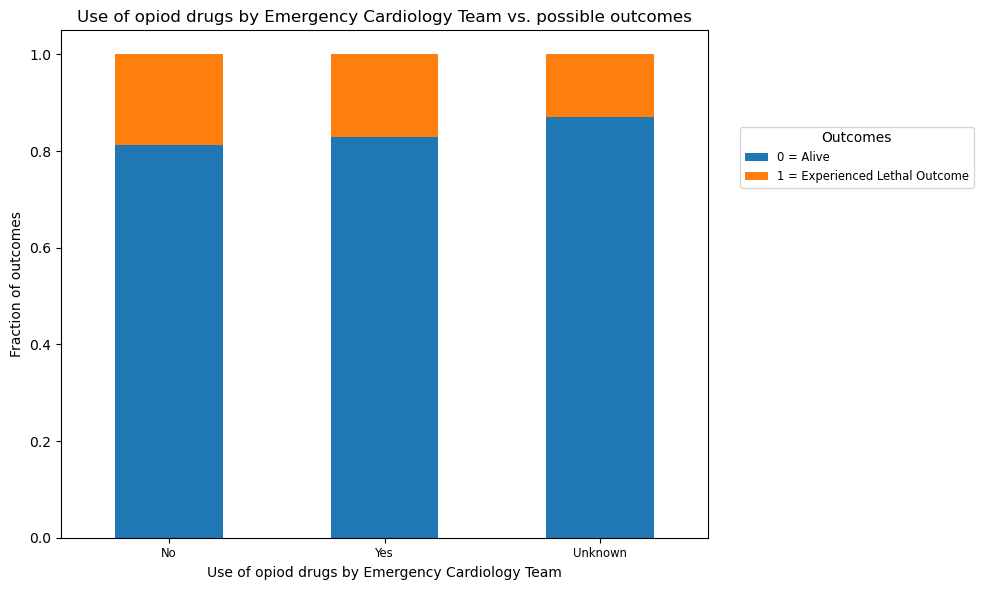

In [183]:
count_matrix = df_whole.groupby(['NA_KB', 'LET_IS']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
# Plot with colors for ordinal features
count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=categorical_colors[:count_matrix.shape[1]])
    
# Move the legend outside of the plot
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Outcomes', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
# Set the title and label
plt.title(f'Use of opiod drugs by Emergency Cardiology Team vs. possible outcomes')
plt.ylabel('Fraction of outcomes')
plt.xlabel('Use of opiod drugs by Emergency Cardiology Team')
plt.xticks(ticks=range(len(count_matrix_norm.index)), labels=["No", "Yes", "Unknown"], rotation=0, fontsize='small')
    
# Adjust layout to ensure everything fits
plt.savefig(f'figures/to use/NAKB vs. possible outcomes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  
plt.show()

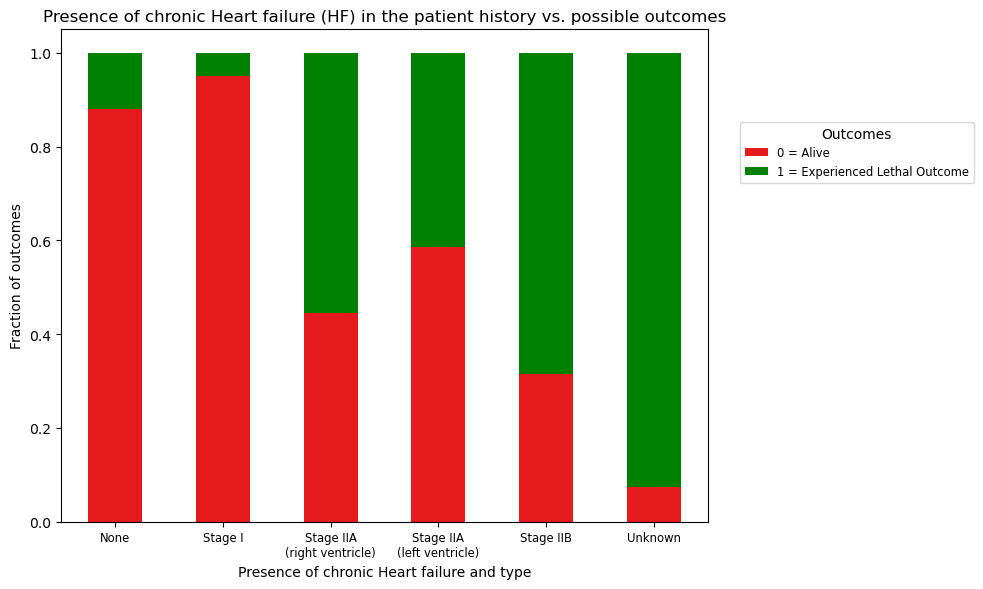

In [190]:
count_matrix = df_whole.groupby(['ZSN_A', 'LET_IS']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
# Plot with colors for ordinal features
count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=ordinal_colors[:count_matrix.shape[1]])
    
# Move the legend outside of the plot
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Outcomes', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
# Set the title and label
plt.title(f'Presence of chronic Heart failure (HF) in the patient history vs. possible outcomes')
plt.ylabel('Fraction of outcomes')
plt.xlabel('Presence of chronic Heart failure and type')
plt.xticks(ticks=range(len(count_matrix_norm.index)), labels=["None", "Stage I", "Stage IIA\n(right ventricle)", "Stage IIA\n(left ventricle)", "Stage IIB", "Unknown"], rotation=0, fontsize='small')
    
# Adjust layout to ensure everything fits
plt.savefig(f'figures/to use/ZSN_A vs. possible outcomes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  
plt.show()

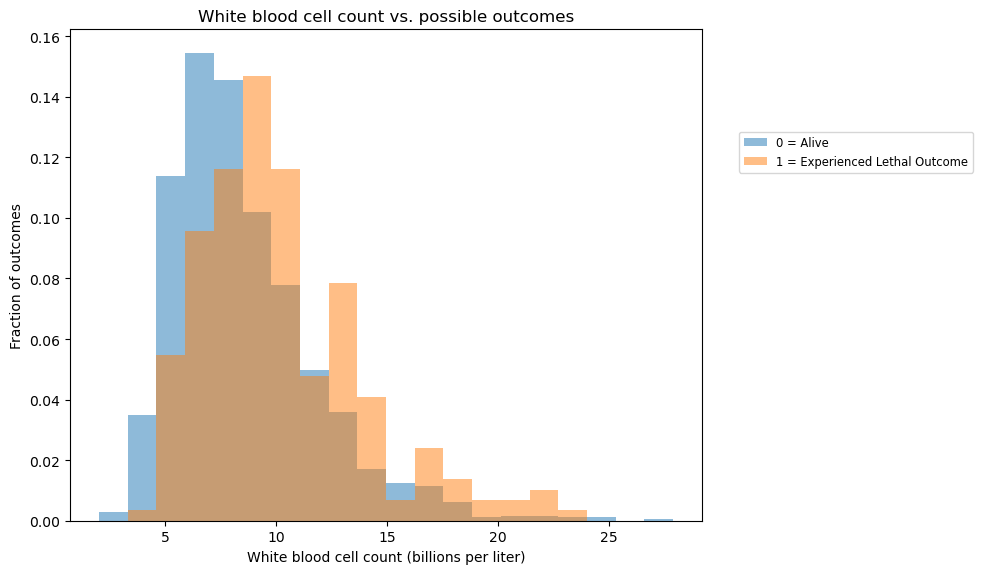

In [403]:
plt.figure(figsize=(10,6))
bin_range = (df_whole['L_BLOOD'].min(), df_whole['L_BLOOD'].max())
for c in categories:
    plt.hist(df_whole[df_whole['LET_IS']==c]['L_BLOOD'], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), labels=labels, fontsize="small")
plt.suptitle('') # that's what you're after
plt.title(f'White blood cell count vs. possible outcomes')
plt.ylabel('Fraction of outcomes')
plt.xlabel(f'White blood cell count (billions per liter)')
plt.savefig(f'figures/to use/White blood cell count vs. possible outcomes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show() 
    

Things to note: recall that the only columns with missing values are the continuous features. We don't run into any issues visualizing the categorical or ordinal features against the target variables, but we have some bumps visualizing the continuous features against the target variable. Violin plots are incapable of handling missing values directly, meaning that they are not a great tool for visualization at this point since we have yet to deal with the missing values of the continuous features. On the other hand, histograms and box plots directly handle missing values in these features by either excluding/ignoring NaN values automatically from the data being plotted. Thus, the missing values of the continuous features may yield inaccurate/incomplete visualiations. But this gives us good initial insight into the distribution of the data! 

**Q8** Observe feature relationships (correlation).

1. Calculate the Pearson correlation matrix of the features.
Features: nr_01 and nr_02 | Correlation: 0.88
Features: nr_01 and nr_07 | Correlation: 0.97
Features: nr_02 and nr_07 | Correlation: 0.90
Features: nr_04 and nr_07 | Correlation: 0.86
Features: nr_01 and nr_08 | Correlation: 0.95
Features: nr_02 and nr_08 | Correlation: 0.88
Features: nr_07 and nr_08 | Correlation: 0.97
Features: np_01 and nr_07 | Correlation: 0.86
Features: np_01 and np_04 | Correlation: 0.97
Features: np_01 and np_05 | Correlation: 0.92
Features: np_04 and np_05 | Correlation: 0.91
Features: np_07 and nr_07 | Correlation: 0.86
Features: np_01 and np_07 | Correlation: 0.98
Features: np_04 and np_07 | Correlation: 0.97
Features: np_05 and np_07 | Correlation: 0.92
Features: np_01 and np_08 | Correlation: 0.95
Features: np_04 and np_08 | Correlation: 0.94
Features: np_05 and np_08 | Correlation: 0.89
Features: np_07 and np_08 | Correlation: 0.95
Features: np_09 and nr_07 | Correlation: 0.86
Features: np_01 and

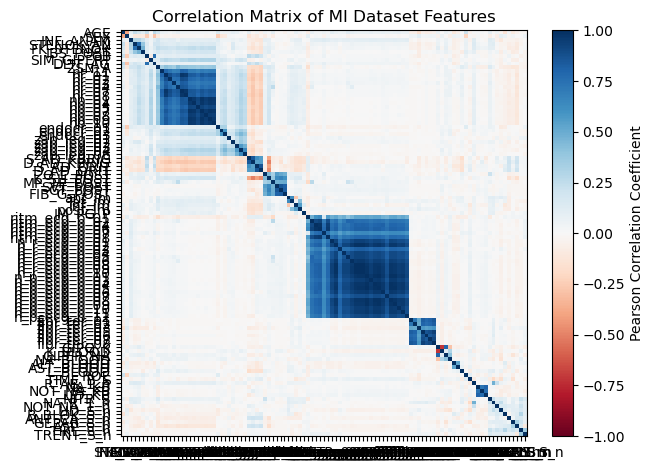

In [191]:
print("1. Calculate the Pearson correlation matrix of the features.")
pearson_corr = X.corr(method='pearson')

# Define a threshold
threshold = 0.85

# Create a list to store pairs and their correlation values
high_corr_pairs = []

# Iterate over the correlation matrix to extract feature pairs with correlations above the threshold
for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            # Sort the pair to avoid duplicates in different orders
            feature_pair = tuple(sorted([pearson_corr.columns[i], pearson_corr.columns[j]]))
            high_corr_pairs.append((feature_pair[0], feature_pair[1], pearson_corr.iloc[i, j]))

# Print out the pairs and their correlation values
for pair in high_corr_pairs:
    print(f'Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}')

print("2. Visualize the correlation matrix as a heatmap.")
plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

# add axes labels
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns)

# colorbar and labeling
plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Correlation Matrix of MI Dataset Features')

# Display the heatmap
plt.tight_layout()
plt.show()

Based on this information about feature correlation, we can see that many features are highly correlated with each other. This indicates that we can drop some features to reduce the complexity of the model (thus reduce the risk of overfitting), but we run into the problem of many features appear multiple times in a given correlation pair.  


In [192]:
over_85 = ['np_07', 'np_05', 'np_01', 'np_10', 'np_04', 'np_09', 'nr_08', 'nr_01', 'nr_07', 'ritm_ecg_p_06', 'ritm_ecg_p_04', 'n_r_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_10', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_02', 'n_r_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_r_ecg_p_06', 'fibr_ter_05', 'n_r_ecg_p_04', 'fibr_ter_08', 'D_AD_ORIT', 'GT_POST', 'ritm_ecg_p_02']
print(len(over_85))
X = X.drop(columns=over_85) # drop columns with over 80% missing values

32


2. Visualize the correlation matrix as a heatmap.


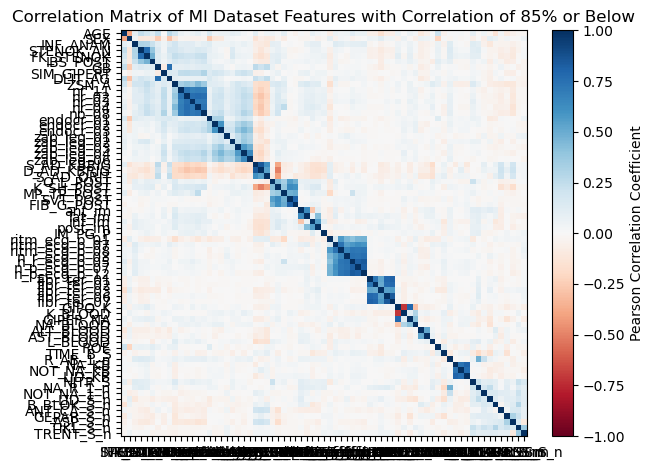

In [193]:
pearson_corr = X.corr(method='pearson')

# Define a threshold
threshold = 0.85

# Create a list to store pairs and their correlation values
high_corr_pairs = []

# Iterate over the correlation matrix to extract feature pairs with correlations above the threshold
for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            # Sort the pair to avoid duplicates in different orders
            feature_pair = tuple(sorted([pearson_corr.columns[i], pearson_corr.columns[j]]))
            high_corr_pairs.append((feature_pair[0], feature_pair[1], pearson_corr.iloc[i, j]))

# Print out the pairs and their correlation values
for pair in high_corr_pairs:
    print(f'Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}')

print("2. Visualize the correlation matrix as a heatmap.")
plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

# add axes labels
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns)

# colorbar and labeling
plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Correlation Matrix of MI Dataset Features with Correlation of 85% or Below')

# Display the heatmap
plt.tight_layout()
plt.show()

In [194]:
print(X.columns)
print(X.shape)

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_02', 'nr_03', 'nr_04',
       'np_08', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG',
       'D_AD_KBRIG', 'S_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
       'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_07', 'ritm_ecg_p_08',
       'n_r_ecg_p_03', 'n_r_ecg_p_05', 'n_p_ecg_p_07', 'n_p_ecg_p_12',
       'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_06',
       'fibr_ter_07', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD',
       'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'NA_KB',
       'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NOT_NA_1_n', 'LID_S_n',
       'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n',
       'TRENT_S_n'],
      dtype='object')
(170

By this point, I have removed these columns from the original dataset:
1. The "ID" column = 1
2. Advised by dataset authors: R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n = 6
3. Target variables (unused) = 11
4. Columns with over 80% missing: IBS_NASL, KFK_BLOOD = 2
5. Target variable (used, in y) = 1
6. Features that have over 85% correlation: Columns 'np_07', 'np_05', 'np_01', 'np_10', 'np_04', 'np_09', 'nr_08', 'nr_01', 'nr_07', 'ritm_ecg_p_06', 'ritm_ecg_p_04', 'n_r_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_10', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_02', 'n_r_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_r_ecg_p_06', 'fibr_ter_05', 'n_r_ecg_p_04', 'fibr_ter_08', 'D_AD_ORIT', 'GT_POST', 'ritm_ecg_p_02' = 32

In total, 53 columns are removed. So there are 124 - 53 = 71 columns left. I can revisit if some of these columns should be added back as I train my model. 

# Split the data into different sets
Splitting methods: 
1. iid data: basic split, K-fold Cross-Validation, stratified split, stratified K-fold
2. non-iid data: GroupKFold, GroupShuffleSplit, TimeSeriesSplit

**Q1** How would you split this data and why?

I am choosing to focus on the time point 24 hours after a patient is admitting to the hospital because this time point allows for assessment of the patient's response to initial treatment and interventions, prediction of early complications that may arise within the first day, and provide a snapshot of the patient's condition after stabilization efforts first begin. Thus, I can drop the non-applicable columns (as advised by the dataset authors themselves), which include columns 94, 95, 101, 102, 104, and 105. However, I do recognize that only focusing on this time point may mean that I cannot capture complications that develop later or may be influenced by further treatment interventions.  
We have ruled out that this data is iid, given that it has no group (patients only appear once in the dataset) nor a time series structure (there is not data taken at different time points given we have focused on a specific time point of patient data taken). Knowing this, I will choose to use **stratified KFold splitting** since the target variable I am dealing with is significantly imbalanced, this is a classification problem, and KFold enables a robust approach to evaluating how well my model will deal with different subsets of the dataset. 

**Q2** Split the dataset into training, validation, and test sets.

I will use this splitting method in a loop with various random states for cross validation!

In [195]:
# Prep for splitting: separate the feature matrix X, and the target variable Y
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# already loaded dataset and partitioned X and y

# SPLITTING
# Use KFold Cross-Valiation to split the data - unshuffled data can introduce errors while training the model
random_state = 0
test_size = 0.2
n_splits = 4
splits = []

# Split the dataset into cross validation, training, and test set
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state) # leaves train_size + val_size data behind
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=random_state)

print("X_train:")
display(X_train)
print("X_CV:")
display(X_CV)
print("X_test:")
display(X_test)

X_train:


AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
1542  60.0    1       2.0        6.0        2.0       2.0  0.0         0.0   
1185  78.0    1       0.0        0.0        0.0       0.0  0.0         0.0   
1608  62.0    1       0.0        4.0        2.0       2.0  2.0         0.0   
418   70.0    1       0.0        0.0        0.0       2.0  2.0         0.0   
1414  60.0    0       0.0        5.0        2.0       1.0  2.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
1555  68.0    1       0.0        7.0        5.0       3.0  4.0         2.0   
1235  80.0    0       0.0        0.0        0.0       2.0  2.0         0.0   
1271  57.0    1       0.0        0.0        0.0       2.0  0.0         0.0   
805   67.0    1       0.0        3.0        1.0       1.0  2.0         0.0   
921   60.0    0       0.0        0.0        0.0       2.0  2.0         0.0   

      DLIT_AG  ZSN_A  ...  NITR_S  NA_R_1_n  NOT_NA_1_n  LID_S_n  B_BLOK_S_n  \
1542      0.0    5.0  ...     1.0       0.0         0.0      0.0         0.0   
1185      0.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
1608      7.0    0.0  ...     0.0       0.0         0.0      1.0         0.0   
418       5.0    0.0  ...     0.0       2.0         2.0      1.0         0.0   
1414      6.0    0.0  ...     0.0       2.0         2.0      0.0         0.0   
...       ...    ...  ...     ...       ...         ...      ...         ...   
1555      8.0    5.0  ...     1.0       2.0         0.0      0.0         0.0   
1235      6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
1271      0.0    0.0  ...     0.0       0.0         1.0      0.0         0.0   
805       1.0    0.0  ...     0.0       0.0         0.0      1.0         1.0   
921       6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   

      ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
1542         0.0        1.0      1.0       0.0        0.0  
1185         1.0        0.0      1.0       0.0        0.0  
1608         0.0        1.0      1.0       0.0        0.0  
418          2.0        0.0      0.0       0.0        0.0  
1414         1.0        1.0      1.0       0.0        0.0  
...          ...        ...      ...       ...        ...  
1555         0.0        0.0      0.0       0.0        0.0  
1235         1.0        1.0      1.0       0.0        0.0  
1271         1.0        1.0      1.0       0.0        0.0  
805          0.0        1.0      0.0       0.0        1.0  
921          1.0        1.0      1.0       0.0        0.0  

[1020 rows x 71 columns]

X_CV:


AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
890   52.0    1       0.0        0.0        0.0       0.0  2.0         0.0   
630   71.0    1       2.0        6.0        2.0       1.0  0.0         0.0   
1557  73.0    0       0.0        6.0        2.0       1.0  2.0         0.0   
114   61.0    1       3.0        5.0        3.0       1.0  1.0         0.0   
459   40.0    1       0.0        0.0        0.0       0.0  0.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
918   74.0    1       3.0        2.0        2.0       1.0  2.0         0.0   
363   87.0    0       0.0        0.0        0.0       2.0  2.0         0.0   
316   51.0    1       0.0        1.0        2.0       2.0  2.0         0.0   
713   54.0    1       0.0        0.0        0.0       0.0  0.0         0.0   
953   65.0    0       0.0        0.0        0.0       0.0  2.0         0.0   

      DLIT_AG  ZSN_A  ...  NITR_S  NA_R_1_n  NOT_NA_1_n  LID_S_n  B_BLOK_S_n  \
890       8.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
630       0.0    0.0  ...     0.0       0.0         1.0      0.0         0.0   
1557      7.0    0.0  ...     1.0       1.0         0.0      1.0         0.0   
114       4.0    0.0  ...     0.0       2.0         0.0      1.0         0.0   
459       0.0    0.0  ...     0.0       2.0         1.0      1.0         0.0   
...       ...    ...  ...     ...       ...         ...      ...         ...   
918       8.0    0.0  ...     1.0       0.0         0.0      0.0         1.0   
363       7.0    1.0  ...     0.0       0.0         0.0      0.0         0.0   
316       2.0    1.0  ...     0.0       0.0         1.0      1.0         0.0   
713       0.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
953       6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   

      ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
890          1.0        1.0      1.0       0.0        0.0  
630          1.0        1.0      0.0       0.0        0.0  
1557         0.0        1.0      1.0       0.0        0.0  
114          1.0        1.0      0.0       0.0        1.0  
459          1.0        1.0      1.0       0.0        0.0  
...          ...        ...      ...       ...        ...  
918          0.0        1.0      1.0       0.0        0.0  
363          1.0        1.0      0.0       0.0        0.0  
316          1.0        1.0      1.0       0.0        0.0  
713          0.0        1.0      1.0       0.0        0.0  
953          1.0        1.0      1.0       0.0        0.0  

[340 rows x 71 columns]

X_test:


AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
169   80.0    1       0.0        0.0        0.0       2.0  0.0         0.0   
734   62.0    1       1.0        1.0        2.0       1.0  2.0         0.0   
1189  59.0    1       1.0        3.0        2.0       2.0  2.0         0.0   
894   80.0    0       0.0        2.0        3.0       1.0  3.0         0.0   
639   52.0    1       2.0        3.0        2.0       1.0  0.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
488   63.0    0       1.0        6.0        2.0       1.0  2.0         0.0   
868   35.0    1       0.0        0.0        0.0       2.0  2.0         0.0   
129   61.0    1       1.0        6.0        2.0       1.0  2.0         0.0   
730   62.0    0       0.0        0.0        0.0       0.0  3.0         0.0   
859   46.0    1       0.0        1.0        2.0       1.0  0.0         1.0   

      DLIT_AG  ZSN_A  ...  NITR_S  NA_R_1_n  NOT_NA_1_n  LID_S_n  B_BLOK_S_n  \
169       0.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
734       2.0    0.0  ...     0.0       0.0         0.0      1.0         0.0   
1189      8.0    0.0  ...     0.0       1.0         0.0      1.0         0.0   
894       7.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
639       0.0    0.0  ...     0.0       1.0         0.0      0.0         0.0   
...       ...    ...  ...     ...       ...         ...      ...         ...   
488       7.0    0.0  ...     0.0       0.0         0.0      1.0         1.0   
868       6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
129       6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
730       7.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   
859       6.0    0.0  ...     0.0       0.0         0.0      0.0         0.0   

      ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
169          1.0        0.0      0.0       0.0        0.0  
734          1.0        1.0      1.0       0.0        1.0  
1189         0.0        0.0      1.0       0.0        0.0  
894          1.0        0.0      0.0       0.0        0.0  
639          1.0        1.0      1.0       0.0        0.0  
...          ...        ...      ...       ...        ...  
488          1.0        0.0      1.0       0.0        0.0  
868          1.0        0.0      0.0       0.0        1.0  
129          1.0        1.0      1.0       0.0        0.0  
730          1.0        1.0      1.0       0.0        0.0  
859          1.0        1.0      1.0       0.0        0.0  

[340 rows x 71 columns]

**Q3** Is your splitting method reproducible? How do you know? 

It is reproducible because my sets remain the same no matter how many times I rerun the cell. I've fixed the sets by setting the random_state to a constant. 

# Preprocess the data
Preprocessing methods: 
1. OneHotEncoder - converts unordered categorical features into dummy arrays
2. OrdinalEncoder - converts ordinal features into an integer array
3. MinMaxScaler - scales continuous variables to be between 0 and 1
4. StandardScaler - standardies continuous features by removing the mean and scaling to unit variance

**Q1** What preprocessors will you use and why?

- categorical features -> onehotencoder: Creates binary columns for each category. Useful for nominal data where categories don’t have an intrinsic order. Helps avoid misleading interpretations from label encoding.
- continuous features -> minmaxscaler or standardscaler (default to standard scaler because you don't have to know what the range is), the continuous features (e.g., age, blood test results) have different ranges or units so scaling helps normalize them such that the model treats all features equally
    - for deciding between minmax and standard, I determined by looking at the distribution of data from my EDA visualizations and decide which features appear to have significant outliers (which I would use Standard Scaler for) and which do not (which I would use MinMax for).

I will most likely apply StandardScaler to all of the features after preprocessing, since it's good practice to scale all features (even the one-hot encoded and ordinal features) to have a 0 mean and 1 standard deviation according to the professor. 

**Q2** Preprocess your data.

In [204]:
# PREPROCESSING
from sklearn.compose import ColumnTransformer

# already labeled continuous, categorical, and ordinal features
# don't need to use ordinalencoder bc ordinal features are already numeric and represent a meaningful order 
# split continuous features into those scaled by minmax or standard

all_ftrs = X.columns.tolist()
ordinal_ftrs = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']
minmax_ftrs = ["AGE", "S_AD_KBRIG", "S_AD_ORIT"] # minmax features: outliers are not as prominent and there is a defined range
standard_ftrs = ["D_AD_KBRIG", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"] #standard features: outliers are significant and range is muddy
onehot_ftrs = list(set(all_ftrs) - set(minmax_ftrs) - set(standard_ftrs) - set(ordinal_ftrs))


# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_ftrs),  # Scale continuous features
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs)
    ])

# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
    
# collect feature names
feature_names = preprocessor.get_feature_names_out()
    
df_train = pd.DataFrame(data=X_prep, columns=feature_names)
    
# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV, columns = feature_names)
    
# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)

print("Preprocessed X_train (df_train):")
display(df_train)
print("Preprocessed X_CV (df_CV):")
display(df_CV)
print("Preprocessed X_test (df_test):")
display(df_test)

Preprocessed X_train (df_train):


standard__D_AD_KBRIG  standard__K_BLOOD  standard__NA_BLOOD  \
0                      NaN          -0.626689            0.562040   
1                      NaN           0.050927            0.715062   
2                      NaN           0.321973            0.409018   
3                      NaN           0.321973            2.551326   
4                      NaN          -0.084596           -0.968181   
...                    ...                ...                 ...   
1015             -0.001195          -0.626689            0.255996   
1016             -0.932921          -0.355643            0.562040   
1017                   NaN           0.050927           -0.509115   
1018                   NaN          -0.491166            0.255996   
1019              0.930532           0.050927           -0.050049   

      standard__ALT_BLOOD  standard__AST_BLOOD  standard__L_BLOOD  \
0                0.332016            -0.566602          -0.520797   
1               -0.463088            -0.566602          -0.178428   
2               -0.078360             1.332546          -0.321082   
3                0.101179             0.767934          -0.264020   
4                     NaN                  NaN           0.563373   
...                   ...                  ...                ...   
1015            -0.257900             0.203323          -0.549328   
1016            -0.257900            -0.207304           0.392188   
1017             0.332016            -0.566602          -0.549328   
1018            -0.847816            -0.771915          -0.606390   
1019            -0.847816            -0.977228          -0.749044   

      standard__ROE  minmax__AGE  minmax__S_AD_KBRIG  minmax__S_AD_ORIT  ...  \
0          2.698906     0.515152                 NaN           0.375000  ...   
1          1.660992     0.787879                 NaN           0.541667  ...   
2         -1.020286     0.545455                 NaN           0.541667  ...   
3         -0.328343     0.666667                 NaN           0.500000  ...   
4         -0.414836     0.515152                 NaN           0.791667  ...   
...             ...          ...                 ...                ...  ...   
1015      -0.155358     0.636364            0.500000           0.541667  ...   
1016       0.623078     0.818182            0.346154           0.416667  ...   
1017      -0.933793     0.469697                 NaN           0.583333  ...   
1018      -0.847300     0.621212                 NaN           0.541667  ...   
1019      -0.155358     0.515152            0.692308           0.541667  ...   

      onehot__zab_leg_04_2.0  onehot__zab_leg_01_0.0  onehot__zab_leg_01_1.0  \
0                        0.0                     1.0                     0.0   
1                        0.0                     1.0                     0.0   
2                        0.0                     1.0                     0.0   
3                        0.0                     1.0                     0.0   
4                        0.0                     1.0                     0.0   
...                      ...                     ...                     ...   
1015                     0.0                     1.0                     0.0   
1016                     0.0                     1.0                     0.0   
1017                     0.0                     1.0                     0.0   
1018                     0.0                     1.0                     0.0   
1019                     0.0                     0.0                     1.0   

      onehot__zab_leg_01_2.0  onehot__FIB_G_POST_0.0  onehot__FIB_G_POST_1.0  \
0                        0.0                     1.0                     0.0   
1                        0.0                     1.0                     0.0   
2                        0.0                     1.0                     0.0   
3                        0.0                     1.0                     0.0   
4                        0

Preprocessed X_CV (df_CV):


standard__D_AD_KBRIG  standard__K_BLOOD  standard__NA_BLOOD  \
0               -0.001195           0.728543           -0.050049   
1                     NaN                NaN           -0.050049   
2                     NaN           2.083776            1.021106   
3                     NaN                NaN                 NaN   
4                     NaN          -0.491166           -0.968181   
..                    ...                ...                 ...   
335                   NaN                NaN                 NaN   
336                   NaN                NaN                 NaN   
337                   NaN          -1.033259           -0.968181   
338              0.464669           0.050927           -0.050049   
339                   NaN          -0.762213            1.480172   

     standard__ALT_BLOOD  standard__AST_BLOOD  standard__L_BLOOD  \
0                    NaN                  NaN          -0.549328   
1              -0.257900             0.973248          -0.064304   
2              -0.540033             0.203323           1.333705   
3              -0.642627            -0.977228          -0.235489   
4               0.332016             0.973248          -0.149897   
..                   ...                  ...                ...   
335            -0.847816            -0.977228           0.420719   
336                  NaN                  NaN                NaN   
337            -0.078360            -0.566602          -0.977290   
338            -0.078360            -0.001990          -0.606390   
339            -0.847816            -0.566602          -1.319660   

     standard__ROE  minmax__AGE  minmax__S_AD_KBRIG  minmax__S_AD_ORIT  ...  \
0        -0.414836     0.393939            0.538462                NaN  ...   
1         2.006963     0.681818                 NaN           0.541667  ...   
2        -0.241851     0.712121                 NaN           0.458333  ...   
3         0.104121     0.530303                 NaN                NaN  ...   
4        -0.760808     0.212121                 NaN           0.500000  ...   
..             ...          ...                 ...                ...  ...   
335            NaN     0.727273                 NaN           0.500000  ...   
336            NaN     0.924242                 NaN                NaN  ...   
337       0.104121     0.378788                 NaN           0.500000  ...   
338       1.747485     0.424242            0.538462           0.583333  ...   
339      -0.155358     0.590909                 NaN           0.708333  ...   

     onehot__zab_leg_04_2.0  onehot__zab_leg_01_0.0  onehot__zab_leg_01_1.0  \
0                       0.0                     1.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     1.0                     0.0   
4                       0.0                     1.0                     0.0   
..                      ...                     ...                     ...   
335                     0.0                     0.0                     1.0   
336                     0.0                     1.0                     0.0   
337                     0.0                     1.0                     0.0   
338                     0.0                     1.0                     0.0   
339                     0.0                     1.0                     0.0   

     onehot__zab_leg_01_2.0  onehot__FIB_G_POST_0.0  onehot__FIB_G_POST_1.0  \
0                       0.0                     1.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     1.0                     0.0   

Preprocessed X_test (df_test):


standard__D_AD_KBRIG  standard__K_BLOOD  standard__NA_BLOOD  \
0               -0.001195           0.457497            3.010392   
1                0.464669          -0.897736           -0.050049   
2                     NaN                NaN                 NaN   
3               -1.398785           0.186450           -2.039335   
4                0.464669          -0.762213           -1.121203   
..                    ...                ...                 ...   
335             -0.001195                NaN                 NaN   
336                   NaN           0.321973            0.562040   
337                   NaN           0.728543           -0.356093   
338                   NaN          -1.033259            0.255996   
339                   NaN                NaN                 NaN   

     standard__ALT_BLOOD  standard__AST_BLOOD  standard__L_BLOOD  \
0               4.204940             0.203323                NaN   
1              -0.078360             0.203323          -0.891698   
2                    NaN                  NaN           0.249534   
3               0.332016             0.203323          -0.264020   
4              -0.642627            -0.771915          -0.691982   
..                   ...                  ...                ...   
335                  NaN                  NaN          -0.663451   
336            -0.847816            -0.566602           1.989913   
337            -0.847816            -0.977228          -0.948759   
338            -0.463088             2.102470          -1.234067   
339            -0.463088            -0.001990          -0.264020   

     standard__ROE  minmax__AGE  minmax__S_AD_KBRIG  minmax__S_AD_ORIT  ...  \
0              NaN     0.818182            0.538462           0.541667  ...   
1        -1.020286     0.545455            0.538462                NaN  ...   
2         0.969049     0.500000                 NaN           0.666667  ...   
3         0.450092     0.818182            0.384615           0.250000  ...   
4        -0.760808     0.393939            0.500000           0.500000  ...   
..             ...          ...                 ...                ...  ...   
335      -0.587822     0.560606            0.461538           0.750000  ...   
336      -0.933793     0.136364                 NaN           0.708333  ...   
337      -0.760808     0.530303                 NaN                NaN  ...   
338      -0.328343     0.545455                 NaN           0.666667  ...   
339      -0.328343     0.303030                 NaN           0.625000  ...   

     onehot__zab_leg_04_2.0  onehot__zab_leg_01_0.0  onehot__zab_leg_01_1.0  \
0                       0.0                     1.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     0.0                     1.0   
4                       0.0                     1.0                     0.0   
..                      ...                     ...                     ...   
335                     0.0                     1.0                     0.0   
336                     0.0                     1.0                     0.0   
337                     0.0                     1.0                     0.0   
338                     0.0                     1.0                     0.0   
339                     0.0                     1.0                     0.0   

     onehot__zab_leg_01_2.0  onehot__FIB_G_POST_0.0  onehot__FIB_G_POST_1.0  \
0                       0.0                     1.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     1.0                     0.0   
4                       0.0                     1.0                     0.0   

**Q3** How many features and data points do you have before and after preprocessing?

I have the same number of data points (1020 + 340 + 340 = 1700), but the features increased from 71 to 175 because of the OneHot encoding that took place. 

# Choose an evaluation metric
This depends on the priorities of the stakeholders, requires some thinking and ethical considerations. This is a classifcation problem, meaning our options for evaluation metrics include:
1. Accuracy - Proportion of correctly predicted outcomes across all classes (misleading if data is imbalanced)
2. Recall - proportion of lethal outcomes correctly identitifed out of all actual lethal outcomes (ensures fewer critical cases are overlooked)
3. Precision - proportion of correctly predicted lethal outcomes out of all cases predicted as lethal (ensures actionable predictions are reliable)
4. Specificity - proportion of true negatives correctly identified (over-predicting lethal outcomes can lead to unnecessary interventions)
5. FBeta Score - harmonic mean of precision and recall (provides balance when cost of false positives and false negatives is comparable)
6. ROC - measures trade-offs between tpr and fpr for each class (gives insight into how well the model distinguishes between classes)
7. Logloss - measures uncertainty of model's predictions by comparing predicted probabilities against true class (penalizes predictions that are confident but incorrect)

## Stakeholder and ethical considerations
### Class importance
Some classes (anything defined as a lethal outcome) will have a higher priority than others. Methods like weighted- or micro-averaging may be key here, since the goal from our model predictions would most likely be to find courses of action against lethal outcomes. Metrics such as recall, precision, and fbeta may be most helpful here. 
### Imbalanced data
As depicted in our visualization of the target variable distribution, lethal outcomes make up a small proportion (around 20%). Thus, metrics that do not rely on true negatives (like accuracy) are best. More specifically, fbeta and averaging methods of fbeta would be best suited since they directly account for class imbalance.
## Stakeholder priorities
Considering this would be used as a medical diagnostic tool, it appears that recall would be the metric slightly prioritized here because false negatives (failing to identify a lethal outcome) tend to have far more serious consequences than false positives (incorrectly flagging a healthy patient with a lethal outcome). This does bring up some considerations:
- if the patient is incorrectly diagnosed and has to undergo unnecessary stress, costs, or invasive procedures, what outcome will that yield?
- How involved is the medical team in taking precaution towards the predictive strength of the model (i.e. will they double check before jumping straight into treating the condition the model predicts for the patient)?
Considering these facts, we recognize precision is also very essential to the model. We want to ensure that we are minimizing harm while also trying to capture as many actual postive cases as we can. Thus, we should strive for a balance in the two metrics, which fbeta does. 

## Evaluation metric workflow
I will use fbeta and log loss in my evaluation process:
- fbeta gives me an idea of how well my model balances precision and recall with imbalanced data

Proposed workflow:
1. Use weighted F_beta score for initial evaluation where beta = 1 for initial evaluation (precision and recall are prioritized equally)
2. After model training, generate and analyze confusion matrix to identify critical misclassification patterns (accuracy, precision, recall)
4. Tweak any parameters as necessary

# Choose one or more ML techniques
Try at least four different ML algorithms we covered in class on your dataset and at least two of those models should be non-linear.
We are working with a classification problem in which our dataset has missing values in our continuous feature variables, meaning our options are:
1. Reduced feature SVM rbf classification (nonlinear) - good for small to medium-sized datasets
2. Reduced feature random forest classification (nonlinear) - robust to overfitting with enough trees, good interpretability
3. Reduced feature logistic regression (linear) -  easy to interpret and computationally efficient
4. Reduced feature KNN (nonlinear) - works well for small datasets, easy to implement

## ML model workflow
### Preliminary
1. Split dataset into training and test set (stratified basic)
2. Choose a given model and understand how it works with reduced features and multiclass prediction
3. For each model, set a number of random states to iterate over multiple different set random states to evaluate model's generalization ability (more robust insight)
4. Save the model from each random state and corresponding test scores
5. Calculate the mean and standard deviation of the test scores 

### Cross validation
1. Split dataset into training, CV, test set (stratified kfold)
2. Choose a given model and understand how it works with reduced features and multiclass prediction
3. For each model, set a number of random states to iterate over multiple different set random states to evaluate model's generalization ability (more robust insight)
4. For each set of parameters to try out, find the set that yields the best model
5. Save the best model from each random state and corresponding test scores
6. Calculate the mean and standard deviation of the test scores 

## Preliminary model training

## LOGREG

In [298]:
from sklearn.metrics import log_loss, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def log_reg_l1(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "C": 1 / np.logspace(-2, 2, 10),  # Convert alpha to C (C = 1/alpha)
        "solver": ["saga"],  # Saga solver supports L1 regularization
        "penalty": ["l1"],  # L1 regularization
        "max_iter": [10000],  # Ensure convergence
        "tol": [1e-4]
    }

    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

    model = LogisticRegression(random_state=random_state)
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg l1:")
    print(grid_search.best_params_)

    return grid_search

def log_reg_l2(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "C": 1 / np.logspace(-2, 2, 10),  # Convert alpha to C (C = 1/alpha)
        "solver": ["saga"],  # Saga solver supports L1 regularization
        "penalty": ["l2"],  # L1 regularization
        "max_iter": [10000],  # Ensure convergence
        "tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

    # initialize model for ovr
    model = LogisticRegression(random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg l2:")
    print(grid_search.best_params_)

    return grid_search

## Random Forest Classification

In [299]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "max_depth": [1, 3, 10, 30, 100],
        "max_features": [0.5, 0.75, 1.0]
    }

    # Define a custom scorer for weighted F-beta
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

    # initialize model for 
    model = RandomForestClassifier(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for random forest classification:")
    print(grid_search.best_params_)

    return grid_search

## KNN classification

In [358]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "n_neighbors": [1, 3, 10, 30, 100],
        "weights": ["uniform", "distance"]
    }

    # Define a custom scorer for weighted F-beta
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

    # initialize model for 
    model = KNeighborsClassifier()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for knn classification:")
    print(grid_search.best_params_)

    return grid_search

## SVM classification

In [301]:
from sklearn.svm import SVC
def svc(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "gamma": [1e-3, 1e-1, 1e1, 1e3, 1e5],
        "C": [1e-2, 1e-1, 1e0, 1e1, 1e2]
    }

    # Define a custom scorer for weighted F-beta
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='weighted')
    
    # initialize model for 
    model = SVC(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,  # Multiple metrics
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for SVM Classification:")
    print(grid_search.best_params_)

    return grid_search

## ML Pipeline Framework

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import log_loss, fbeta_score

n_folds = 3

def ML_pipeline(algo, X, y, random_state):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

    # create train and cv sets
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 
    
    # create the pipeline: preprocessor + supervised ML method
    all_ftrs = X.columns.tolist()
    ordinal_ftrs = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']
    minmax_ftrs = ["AGE", "S_AD_KBRIG", "S_AD_ORIT"] # minmax features: outliers are not as prominent and there is a defined range
    standard_ftrs = ["D_AD_KBRIG", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"] #standard features: outliers are significant and range is muddy
    onehot_ftrs = list(set(all_ftrs) - set(minmax_ftrs) - set(standard_ftrs) - set(ordinal_ftrs))

    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('standard', StandardScaler(), standard_ftrs),  # Scale continuous features
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs)
        ])

    # scale all features 
    final_scaler = StandardScaler()

    # PREPROCESS: manual
    # fit_transform the training set
    X_other_prep = preprocessor.fit_transform(X_other)
    X_other_scaled = final_scaler.fit_transform(X_other_prep)

    feature_names = preprocessor.get_feature_names_out()
    df_X_other = pd.DataFrame(data=X_other_scaled,columns=feature_names)
    
    # transform the test
    X_test_prep = preprocessor.transform(X_test)
    X_test_scaled = final_scaler.transform(X_test_prep)
    df_X_test = pd.DataFrame(data=X_test_scaled, columns = feature_names)
    
    # ensure all inputs are dataframes
    # inputs: df_X_other, y_other, df_X_test, y_test

    # find all unique patterns of missing value in test set
    mask = df_X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    
    print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    # Store models and predictions for each unique missing value pattern
    i_grids = [] # ex: if 33 unique misisng patter,s have 33 diff models
    i_f2_scores = []
    for i in range(len(unique_rows)):
        print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test, df_X_test.iloc[[j]]])# append the according X_test row j to the subset
                if not y_test.iloc[[j]].empty:
                    sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])

        sub_X_test = sub_X_test[df_X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_other = pd.DataFrame()
        sub_y_other = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_other = df_X_other[df_X_other.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_other = sub_X_other.dropna()
        # 3.cut the sub_y_train and sub_y_CV accordingly
        sub_y_other = y_other.iloc[sub_X_other.index]

        if sub_X_other.empty or sub_y_other.empty:
            continue # Skip this unique pattern

        # find best model
        print(sub_X_test.shape)
        print(sub_X_other.shape)
        print(sub_y_other.shape)
        grid = algo(sub_X_other, sub_y_other, kf, random_state)
        best_model = grid.best_estimator_

        # Make predictions on the test set (sub_X_test) using the best model
        sub_y_test_pred = best_model.predict(sub_X_test)

        # Collect the predicted labels for comparison
        sub_y_test_pred_df = pd.Series(sub_y_test_pred)
        all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred_df])

        # Track the grids and associated scores
        i_grids.append(grid)
        i_f2_scores.append(fbeta_score(sub_y_test, sub_y_test_pred, beta=2, average='weighted'))
        
    # at this point i have i best_models and their f2 scores
    best_grid_index = np.argmax(i_f2_scores)
    best_grid_overall = i_grids[best_grid_index]

    # Rank the final predicted probabilities according to the original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    X_test = X_test.sort_index()
    
    # Get scores
    total_f2 = fbeta_score(y_test, all_y_test_pred, beta=2, average='weighted')
    return grid, total_f2, y_test, all_y_test_pred, df_X_test, feature_names

# # u should avg the scores bc its over random states
# # Find the index of the best F-beta and Log Loss scores
# best_fbeta_index = np.argmax(fbetas)  # Highest F-beta score (argmax)
# best_logloss_index = np.argmin(loglosses)  # Lowest Log Loss score (argmin)

# # best fbeta and log loss scores
# best_fbeta_score = fbetas[best_fbeta_index]
# best_logloss_score = loglosses[best_logloss_index]

# # Return the models with the best F-beta and Log Loss
# print(f"best F-beta score ({best_fbeta_score}):")

# print(f"best Log Loss ({best_logloss_score}):")

In [355]:
import pickle
random_states = [0, 42, 100, 81, 9] # diff random states

log_reg_l1_f2 = []
log_reg_l2_f2 = []
random_forest_f2 = []
knn_f2 = []
svc_f2 = []

# put in loop w multiple random states

for random_state in random_states:
    # **_data = grid, total_f2, y_test, all_y_test_pred, X_test (0, 1, 2, 3, 4)
    print(f'RANDOM STATE{random_state}')
    print("="*80)
    log_reg_l1_data = ML_pipeline(log_reg_l1, X, y, random_state)
    log_reg_l2_data = ML_pipeline(log_reg_l2, X, y, random_state)
    random_forest_data = ML_pipeline(random_forest, X, y, random_state)
    knn_data = ML_pipeline(knn, X, y, random_state)
    svc_data = ML_pipeline(svc, X, y, random_state)
    
    log_reg_l1_f2.append(log_reg_l1_data[1])
    log_reg_l2_f2.append(log_reg_l2_data[1])
    random_forest_f2.append(random_forest_data[1])
    knn_f2.append(knn_data[1])
    svc_f2.append(svc_data[1])

    # Save intermediate results to a file
    with open(f'results/results_random_state_{random_state}.save', 'wb') as file:
        pickle.dump({
            'random_state': random_state,
            'log_reg_l1_f2': log_reg_l1_data,
            'log_reg_l2_f2': log_reg_l2_data,
            'random_forest_f2': random_forest_data,
            'knn_f2': knn_data,
            'svc_f2': svc_data
        }, file)

log_reg_l1_f2_mean = np.mean(log_reg_l1_f2)
log_reg_l2_f2_mean = np.mean(log_reg_l2_f2)
random_forest_f2_mean = np.mean(random_forest_f2)
knn_f2_mean = np.mean(knn_f2)
svc_f2_mean = np.mean(svc_f2)

log_reg_l1_f2_std = np.std(log_reg_l1_f2)
log_reg_l2_f2_std = np.std(log_reg_l2_f2)
random_forest_f2_std = np.std(random_forest_f2)
knn_f2_std = np.std(knn_f2)
svc_f2_std = np.std(svc_f2)

# Save the final aggregated results to a file
with open('results/final_results.save', 'wb') as file:
    pickle.dump({"algorithm": ["Logistic Regression (l1)", "Logistic Regression (l2)", "Random Forest", "KNN", "SVC"],
                 "mean": [log_reg_l1_f2_mean, log_reg_l2_f2_mean, random_forest_f2_mean, knn_f2_mean, svc_f2_mean],
                 "std": [log_reg_l1_f2_std, log_reg_l2_f2_std, random_forest_f2_std, knn_f2_std, svc_f2_std]}, 
                file)

RANDOM STATE0
there are 33 unique missing value patterns.
working on unique pattern 0
(63, 175)
(315, 175)
(315,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


KeyboardInterrupt: 

# Tune the hyperparameters of your ML models (aka cross-validation)
Based on professor advice:
1. Reduced feature SVM rbf classification (nonlinear) - tune C, gamma. figure out scale
2. Reduced feature random forest classification (nonlinear) - tune max_features, max_depth. figure out scale
4. Reduced feature logistic regression (linear) - tune l1 and/or l2 reg. figure out scale
5. Reduced feature KNN (nonlinear) - tune n_neighbors, weight. figure out scale

# Interpret your model

In [309]:
from sklearn.metrics import precision_score

def calculate_baseline(p, beta):
    beta_squared = beta**2
    return (((1+beta_squared) * p) / ((beta_squared * p) + 1))

n = len(y)
n1 = (y == 1).sum()
p = n1/n

baseline_f2 = calculate_baseline(p, 2)

print("baseline f2: ", baseline_f2)

baseline f2:  0.48670977011494254


In [310]:
# Load the saved results
with open('results/final_results.save', 'rb') as file:
    final_results = pickle.load(file)
    
# Create a DataFrame from the loaded results
test_scores_df = pd.DataFrame({
    "Algorithm": final_results["algorithm"],
    "Mean F2 Score": final_results["mean"],
    "Standard Deviation": final_results["std"]
})

display(test_scores_df)

Algorithm  Mean F2 Score  Standard Deviation
0  Logistic Regression (l1)       0.772751            0.012234
1  Logistic Regression (l2)       0.777639            0.006872
2             Random Forest       0.784521            0.003695
3                       KNN       0.790111            0.007235
4                       SVC       0.771332            0.003477

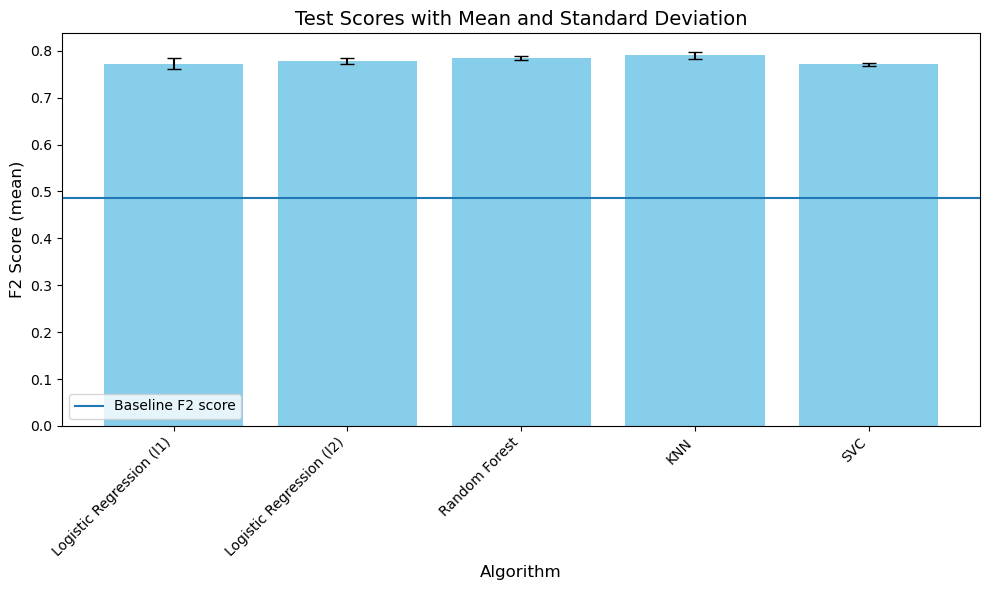

In [313]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot means with error bars representing the standard deviation
plt.bar(test_scores_df['Algorithm'], test_scores_df['Mean F2 Score'], yerr=test_scores_df['Standard Deviation'], capsize=5, color='skyblue')

# Set labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('F2 Score (mean)', fontsize=12)
plt.title('Test Scores with Mean and Standard Deviation', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(baseline_f2,label='Baseline F2 score')
plt.legend(loc='lower left')

# Display the plot
plt.savefig(f'figures/to use/test_scores.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

from this graph pick best model. we now inspect the best model by looking at confusion matrices and feature importance

## Confusion matrices

<Figure size 600x400 with 0 Axes>

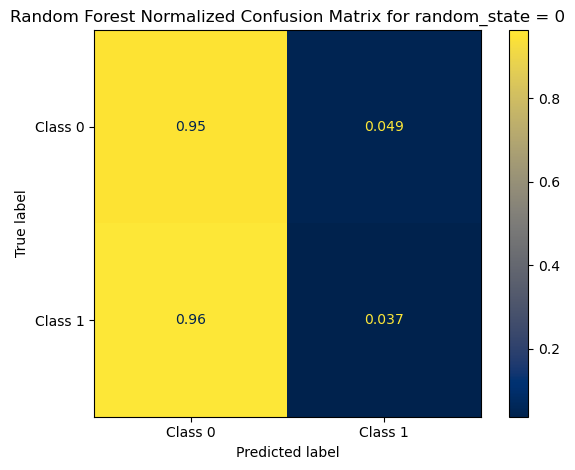

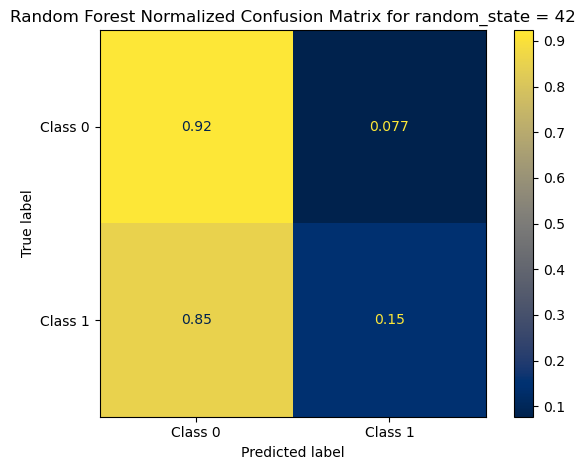

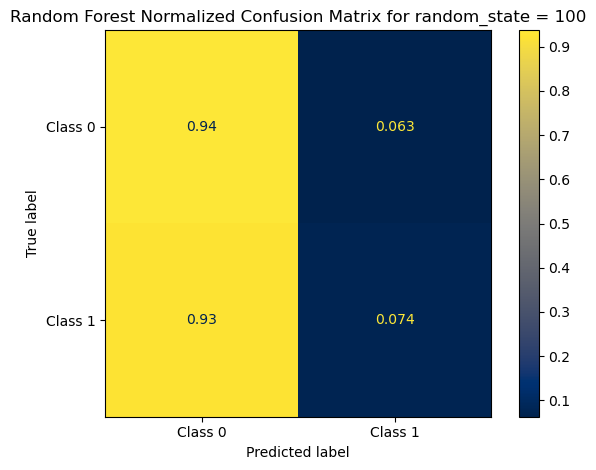

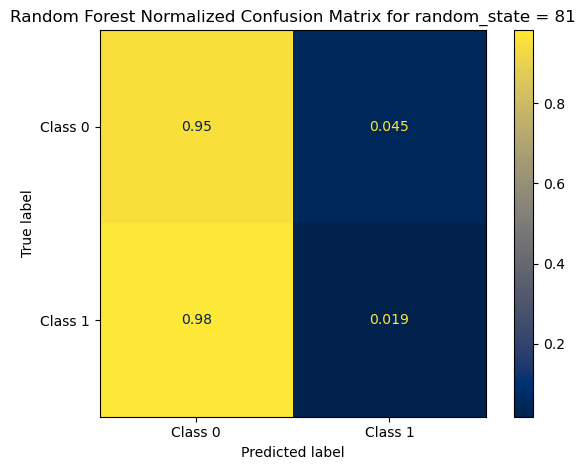

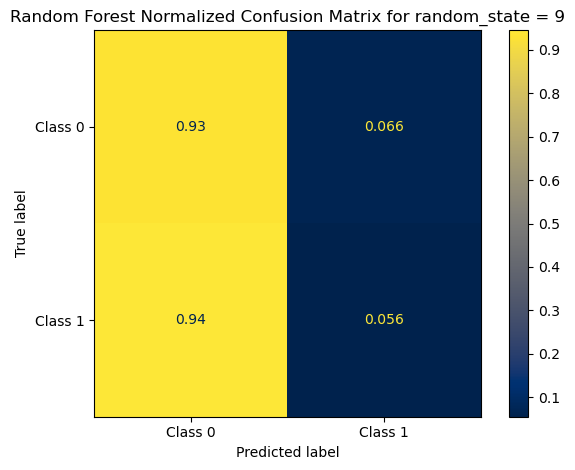

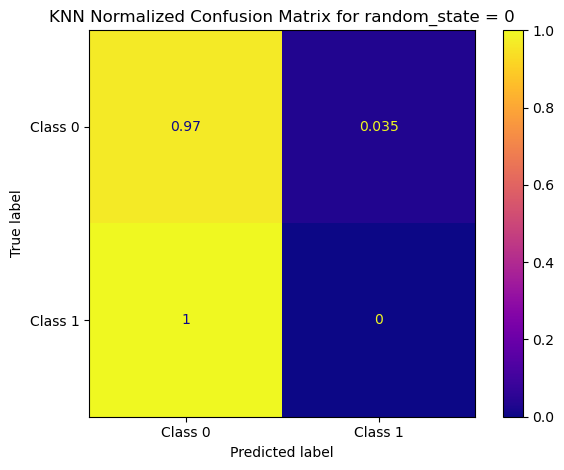

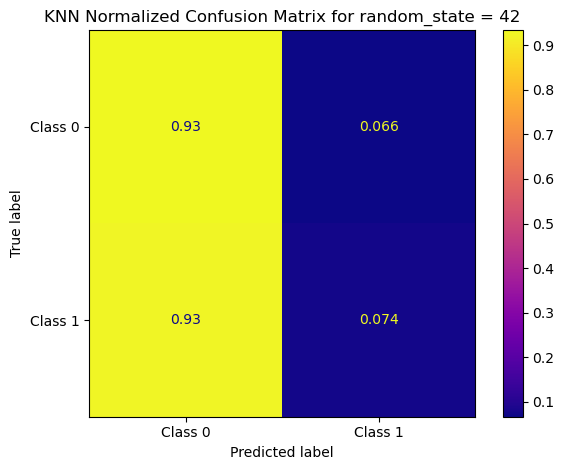

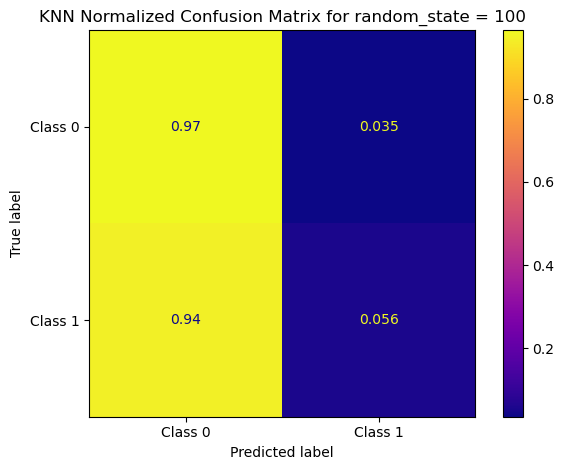

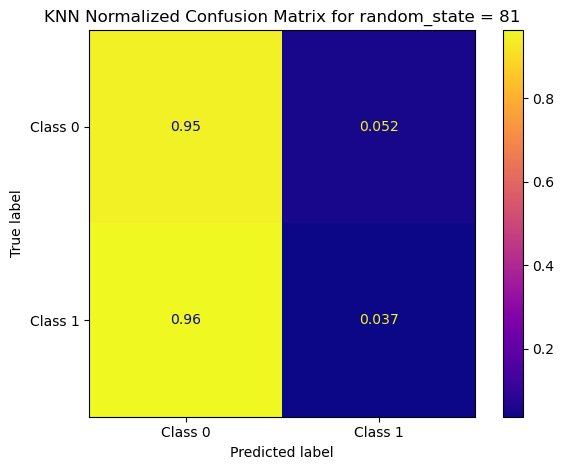

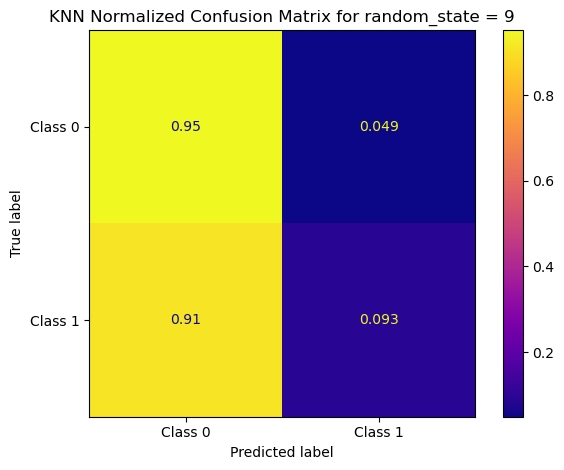

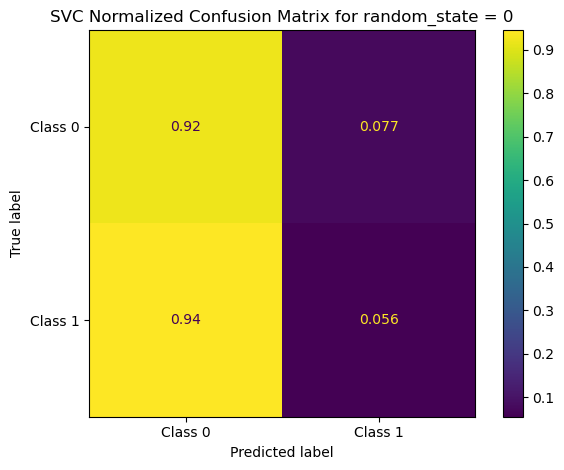

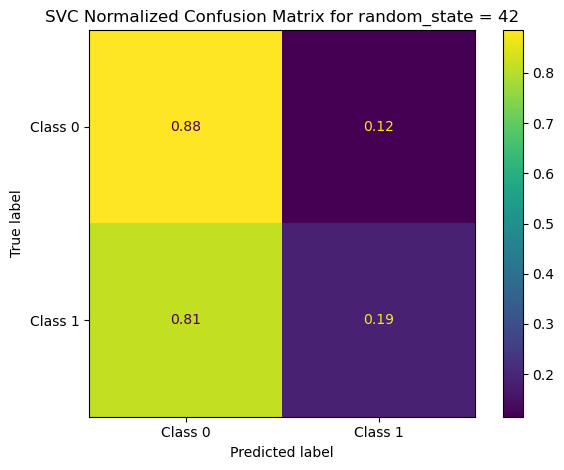

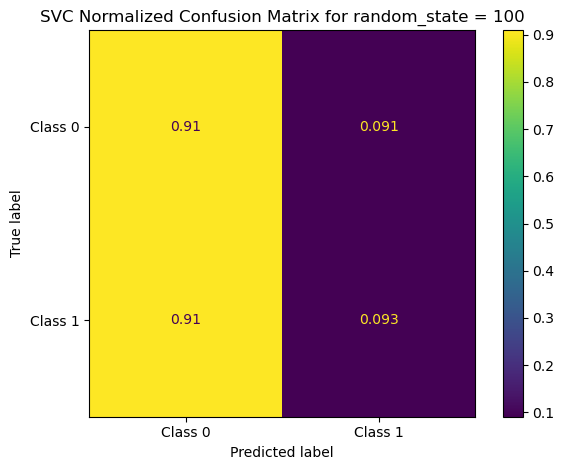

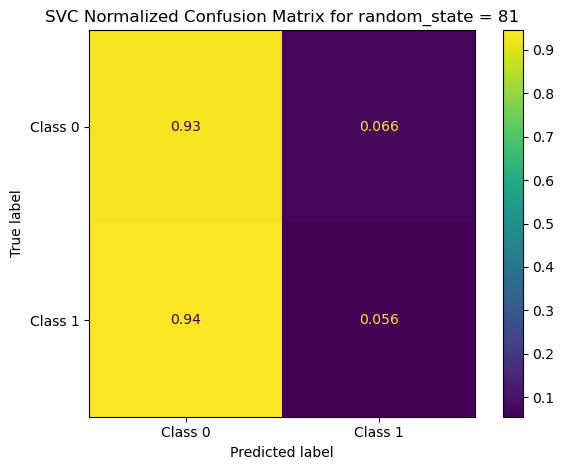

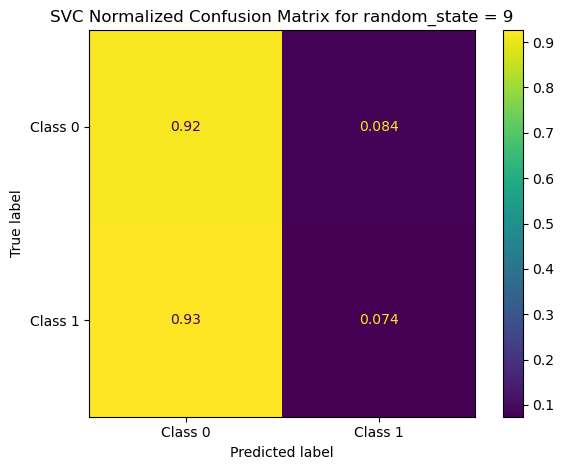

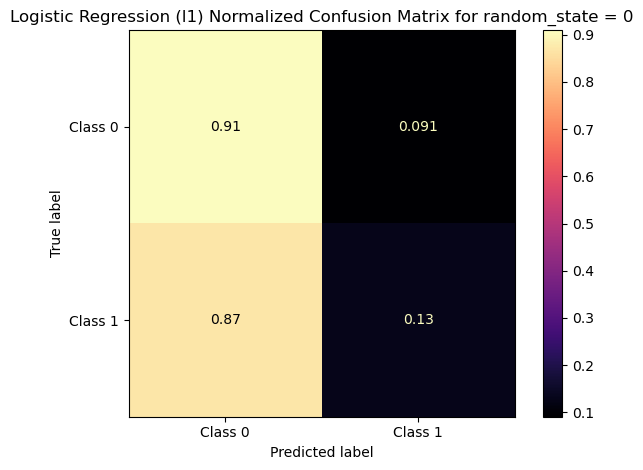

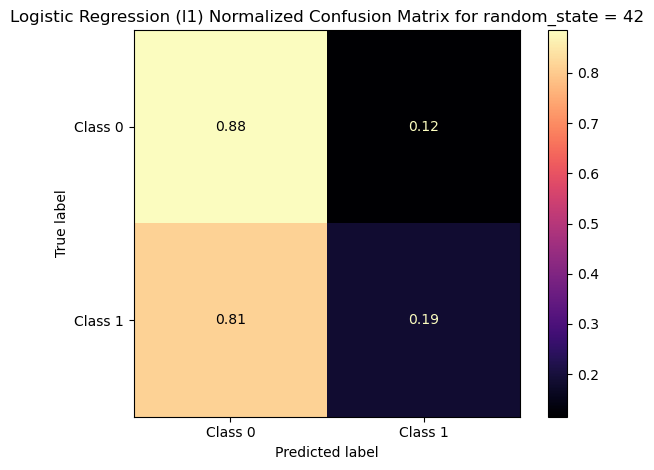

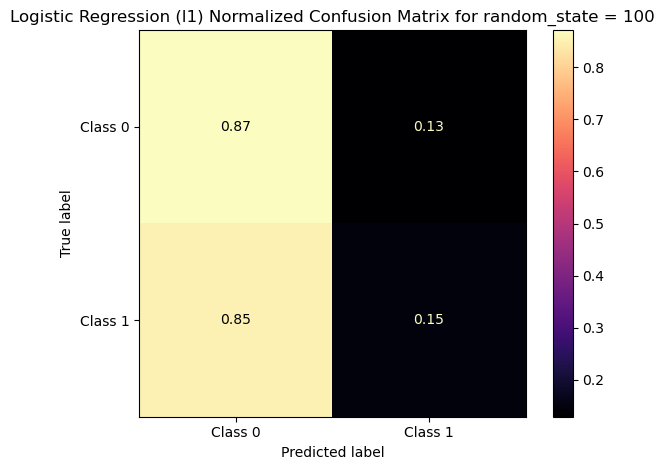

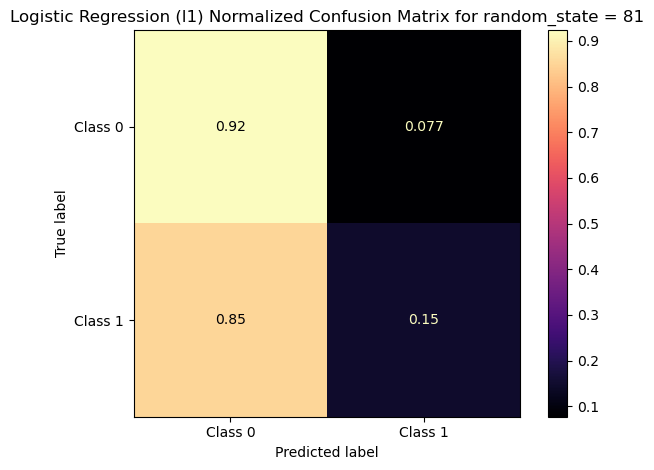

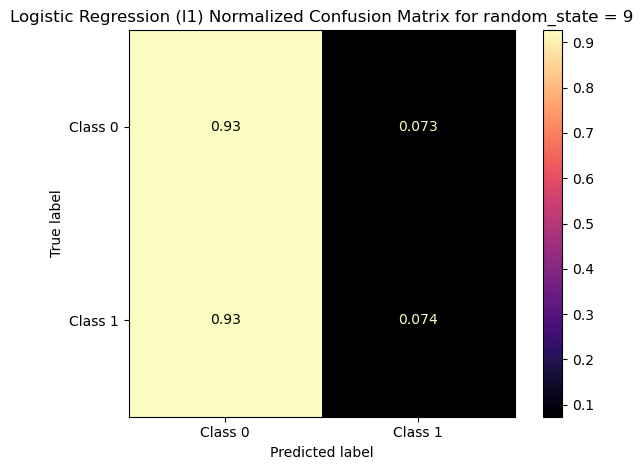

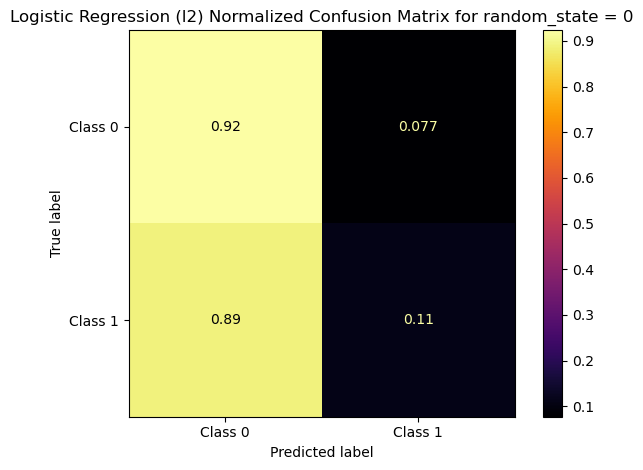

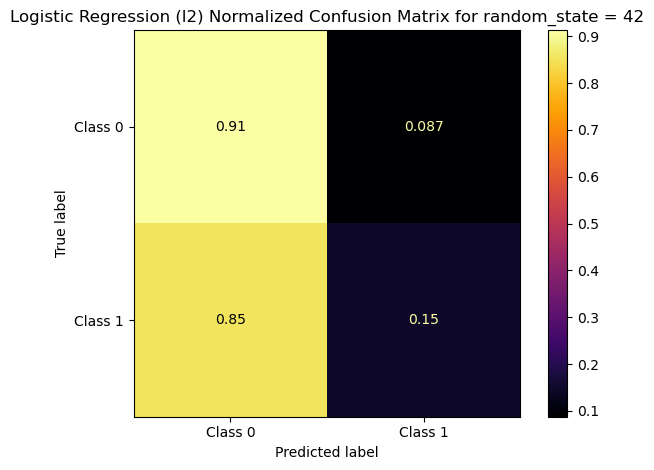

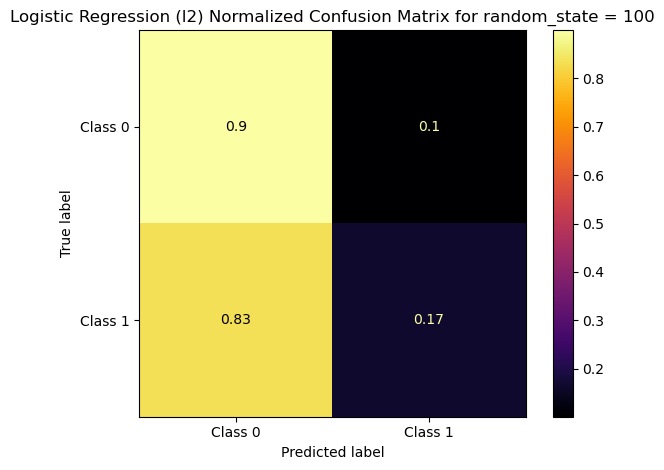

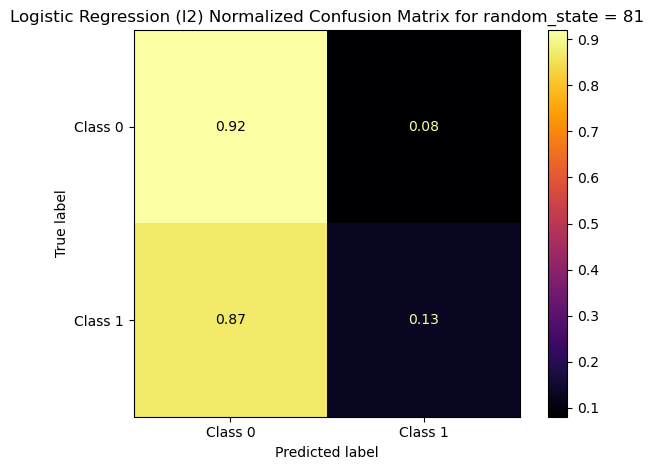

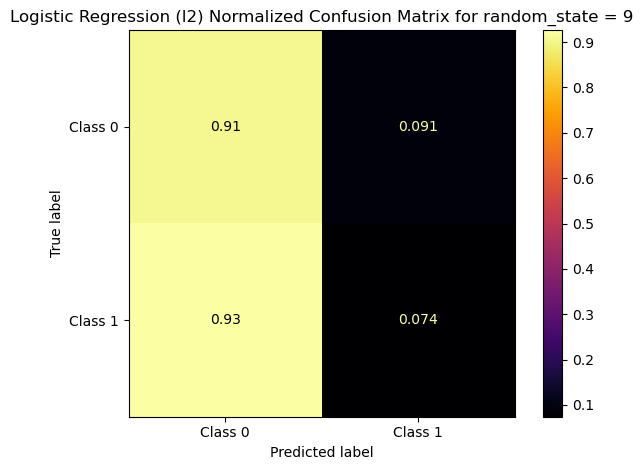

In [322]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# by this point we have identified which model is best from the plot
plt.figure(figsize=(6, 4))

# grid, total_f2, y_test, all_y_test_pred, X_test
    
for random_state in random_states:
    with open(f'results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['random_forest_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a plot for each confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='cividis')
    plt.title(f'Random Forest Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'figures/to use/Random Forest Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)

    grid, total_f2, y_true, y_pred, X_test, feature_names = data['knn_f2']
    cm = confusion_matrix(y_true, y_pred)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a plot for each confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='plasma')
    plt.title(f'KNN Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'figures/to use/KNN Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['svc_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a plot for each confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='viridis')
    plt.title(f'SVC Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'figures/to use/SVC Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['log_reg_l1_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a plot for each confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='magma')
    plt.title(f'Logistic Regression (l1) Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'figures/to use/Logistic Regression (l1) for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


for random_state in random_states:
    with open(f'results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['log_reg_l2_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a plot for each confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='inferno')
    plt.title(f'Logistic Regression (l2) Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'figures/to use/Logistic Regression (l2) Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

## Feature Importance

In [397]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
grid, total_f2, y_true, y_pred, X_test, feature_names = ML_pipeline(random_forest, X, y, 0)
explainer = shap.TreeExplainer(grid.best_estimator_)
# transform the test set
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test)
print(np.shape(shap_values))

there are 33 unique missing value patterns.
working on unique pattern 0
(63, 175)
(315, 175)
(315,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.75}
working on unique pattern 1
(3, 174)
(339, 174)
(339,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.5}
working on unique pattern 2
(4, 174)
(330, 174)
(330,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.5}
working on unique pattern 3
(2, 173)
(338, 173)
(338,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 4
(8, 173)
(349, 173)
(349,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 1.0}
working on unique pattern 5
(1, 171)
(374, 171)
(374,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 6
(11, 173)
(375, 173)
(375,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 7
(3, 172)
(401, 172)
(401,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 3, 'max_features': 0.5}
working on unique pattern 8
(1, 172)
(394, 172)
(394,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 9
(1, 170)
(434, 170)
(434,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 10
(9, 171)
(427, 171)
(427,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 1.0}
working on unique pattern 11
(1, 170)
(455, 170)
(455,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 12
(4, 169)
(478, 169)
(478,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.5}
working on unique pattern 13
(113, 173)
(731, 173)
(731,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 14
(37, 172)
(858, 172)
(858,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 15
(1, 172)
(732, 172)
(732,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 16
(1, 172)
(779, 172)
(779,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 17
(1, 171)
(912, 171)
(912,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 18
(3, 171)
(803, 171)
(803,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 1.0}
working on unique pattern 19
(4, 170)
(944, 170)
(944,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 20
(14, 171)
(814, 171)
(814,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 21
(3, 170)
(955, 170)
(955,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 1.0}
working on unique pattern 22
(1, 170)
(868, 170)
(868,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 23
(2, 169)
(898, 169)
(898,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 1.0}
working on unique pattern 24
(1, 172)
(733, 172)
(733,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 25
(19, 171)
(877, 171)
(877,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
working on unique pattern 26
(7, 170)
(1027, 170)
(1027,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 1.0}
working on unique pattern 27
(1, 170)
(934, 170)
(934,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 28
(1, 169)
(965, 169)
(965,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 1.0}
working on unique pattern 29
(11, 169)
(1005, 169)
(1005,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.75}
working on unique pattern 30
(2, 168)
(1180, 168)
(1180,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.5}
working on unique pattern 31
(5, 167)
(1152, 167)
(1152,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 10, 'max_features': 0.75}
working on unique pattern 32
(2, 166)
(1353, 166)
(1353,)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/2959187337.py:76: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


Best parameters for random forest classification:
{'max_depth': 30, 'max_features': 0.5}
(340, 175, 2)


In [398]:
shap.summary_plot(shap_values[:,:,1], X_test, feature_names=feature_names, show=False)
plt.savefig('figures/to use/summary_plot.png', dpi=300)
plt.close()  # Close the plot to free up memory

In [400]:
index = 1
print("average prediction:", explainer.expected_value[1]) 
shap.force_plot(explainer.expected_value[1], shap_values[index,:,1], features=X_test.iloc[index], feature_names=feature_names, show=False)
plt.savefig('figures/to use/index 1 force plot.png', dpi=300)
plt.close()  # Close the plot to free up memory

average prediction: 0.16048780487804884


In [401]:
shap.waterfall_plot(shap.Explanation(
        values=shap_values[index,:,1],
        base_values=explainer.expected_value[1],
        data=X_test.iloc[index],
        feature_names=feature_names
    ), max_display=11, show=False)
plt.savefig('figures/to use/index 1 waterfall plot.png', dpi=300)
plt.close()  # Close the plot to free up memory

Calculate baseline scores of evaluation metric. 
Recall from PSET5 how to calculate baseline fbeta score:  
fbeta = (1+beta^2)p / (beta^2)p + 1

In [265]:
from sklearn.metrics import precision_score

def calculate_baseline(p, beta):
    beta_squared = beta**2
    return (((1+beta_squared) * p) / ((beta_squared * p) + 1))

n = len(y)
n1 = (y == 1).sum()
p = n1/n

baseline_f2 = calculate_baseline(p, 2)

print("baseline f2: ", baseline_f2)

baseline f2:  0.48670977011494254


The closer the baseline F1 score is to 1.0, the better the precision (minority class proportion) relative to the recall (which is always 1.0).
If the minority class is a small proportion of the dataset, precision will be low, and thus the F1-score will be lower as well.  
The baseline F1-score will be lower if precision is low, but recall will always be high because all minority class points are predicted correctly.


In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

    
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the baseline model using DummyClassifier
# strategy='most_frequent' means the model will always predict the most frequent class
baseline_model = DummyClassifier(strategy='constant', constant=1, random_state=42)

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate performance: Accuracy score
f2 = fbeta_score(y_test, y_pred_baseline, 2)

print(f"Baseline Model f2 {f2:.4f}")


## Baseline model